## ONLINE STORE SEGMENTATION

<div style="border-bottom: 15px dashed darkorange; width: 100%;"></div>  

It is expected from us that predict customer lifetime value. The management wants to see expected purchases in 1 to 3 months. They also want to see the top ten purchasers in 3 months. We are going to use BG/NBD Model and GammaGamma Model to predict future purchases.

Data

This Online Retail II data set contains all the transactions occurring for a UK-based and registered, non-store online retail between 01/12/2009 and 09/12/2011.The company mainly sells unique all-occasion gift-ware. Many customers of the company are wholesalers.

**Content**

Attribute Information:
- *InvoiceNo* : Invoice number. Nominal. A 6-digit integral number uniquely assigned to each transaction. If this code starts with the letter 'c', it indicates a cancellation.
- *StockCode* : Product (item) code. Nominal. A 5-digit integral number uniquely assigned to each distinct product.
- *Description* : Product (item) name. Nominal.
- *Quantity* : The quantities of each product (item) per transaction. Numeric.
- *InvoiceDate* : Invice date and time. Numeric. The day and time when a transaction was generated.
- *UnitPrice* : Unit price. Numeric. Product price per unit in sterling (£).
- *CustomerID* : Customer number. Nominal. A 5-digit integral number uniquely assigned to each customer.
- *Country* : Country name. Nominal. The name of the country where a customer resides.

<div style="border-bottom: 15px dashed darkorange; width: 100%;"></div>  

* [Importing The Libraries.](#Importing-libraries)
* [Loading and Reading Dataset from the Archives](#Loading-and-Reading-Datasets)
* [Investigating the Dataset Information](#Investigating-the-Dataset-Information)
* [Data Transformation](#Data-Transformation)
* [Refined Data Representation and Feature Enhancement](#Refined-Data-Representation-and-Feature-Enhancement)

<div style="border-bottom: 15px dashed darkorange; width: 100%;"></div>  

<h2 id="Importing-libraries" style="text-align: center;">Importing libraries</h2>

In [36]:
import pandas as pd

import numpy as np

import zipfile

import matplotlib.pyplot as plt
%matplotlib inline

import plotly.express as px

import seaborn as sns

<div style="border-bottom: 15px dashed darkorange; width: 100%;"></div>  

<h2 id="Loading-and-Reading-Datasets" style="text-align: center;">Loading and Reading Dataset from the Archives</h2>

In [37]:
archive_path = 'archive.zip'
with zipfile.ZipFile(archive_path, 'r') as zip_file:
    # Get the list of CSV files inside the archive
    csv_files = [name for name in zip_file.namelist() if name.endswith('.csv')]
    
    # Create a dictionary to store DataFrames
    dataframes_in_zip = {}
    
    for csv_file in csv_files:
        # Extract the filename without the ".csv" extension
        filename = csv_file.replace('.csv', '')
        
        # Read the CSV file and create a DataFrame
        with zip_file.open(csv_file) as file:
            df = pd.read_csv(file)
        
        # Store the DataFrame in the dictionary using the filename as the key
        dataframes_in_zip[filename] = df
dataframes_in_zip 

{'online_retail':        InvoiceNo StockCode                          Description  Quantity  \
 0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
 1         536365     71053                  WHITE METAL LANTERN         6   
 2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
 3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
 4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
 ...          ...       ...                                  ...       ...   
 541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
 541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
 541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
 541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
 541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   
 
                 InvoiceDate  UnitPrice  Cust

In [38]:
df_online_retail = dataframes_in_zip['online_retail']
origin_df = df_online_retail.copy()
df_online_retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


<div style="border-bottom: 15px dashed darkorange; width: 100%;"></div>  


<h2 id="Investigating-the-Dataset-Information" style="text-align: center;">Investigating the Dataset Information</h2>

In [39]:
def overview(df):
    print(" DATA INFO ".center(125,'-'))
    print(df.info())
    
    print(" SHAPE OF DATASET ".center(125,'-'))
    print('Rows:{}'.format(df.shape[0]))
    print('Columns:{}'.format(df.shape[1]))
    
    print(" DATA TYPES ".center(125,'-'))
    print(df.dtypes)
    
    print(" STATISTICS OF DATA ".center(125,'-'))
    print(df.describe(include="all"))
    
    print(" MISSING VALUES ".center(125,'-'))
    print(df.isnull().sum()[df.isnull().sum()>0].sort_values(ascending = False))
    
    print(" DUPLICATED VALUES ".center(125,'-'))
    print(df.duplicated().sum())

overview(df_online_retail)

--------------------------------------------------------- DATA INFO ---------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB
None
------------------------------------------------------ SHAPE OF DATASET -----------------------------------------------------
Rows:541909
Columns:8
--------------------------------------------------------- DATA TYPES -------------------------------------------------

<div style="border-bottom: 15px dashed darkorange; width: 100%;"></div>  

<h2 id="Data-Transformation" style="text-align: center;">Data Transformation</h2>

In [40]:
df_online_retail

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [41]:
#  Removing NaN's in Customer ID
print("Shape of data before removing NaN's CustomerID",df_online_retail.shape)
df_online_retail.dropna(subset="CustomerID",axis=0,inplace=True)
print("Shape of data after removing NaN's CustomerID",df_online_retail.shape)

Shape of data before removing NaN's CustomerID (541909, 8)
Shape of data after removing NaN's CustomerID (406829, 8)


In [42]:
print("Missing values in each column after cleaning customerID :\n",df_online_retail.isnull().sum())

Missing values in each column after cleaning customerID :
 InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64


In [43]:
# Removing duplicates (Values in all columns are identical)
print("Number of duplicates before cleaning:",df_online_retail.duplicated().sum())
df_online_retail = df_online_retail.drop_duplicates(keep="first")
print("Number of duplicates after cleaning:",df_online_retail.duplicated().sum())

Number of duplicates before cleaning: 5225
Number of duplicates after cleaning: 0


In [44]:
# Cheking for negative values
print("Negative value in Quantity before cleaning:",(df_online_retail.Quantity<0).sum())
print("Negative value in UnitPrice before cleaning:",(df_online_retail.UnitPrice<0).sum())
# Create a boolean mask for the rows you want to modify
mask = df_online_retail['Quantity'] < 0
# Use .loc to modify the Quantity column based on the mask
# df_online_retail.loc[mask, 'Quantity'] = df_online_retail.loc[mask, 'Quantity'].abs()
print("Negative value in Quantity after cleaning:",(df_online_retail.Quantity<0).sum())

Negative value in Quantity before cleaning: 8872
Negative value in UnitPrice before cleaning: 0
Negative value in Quantity after cleaning: 8872


In [45]:
#defining function for removing outliers according to its threshold values
def replace_with_threshold(dataframe, variable):
    df_copy = dataframe.copy()
    quartile1 = df_copy[variable].quantile(0.01)
    quartile3 = df_copy[variable].quantile(0.99)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    df_copy.loc[(df_copy[variable] > up_limit), variable] = up_limit
    df_copy.loc[(df_copy[variable] < low_limit), variable] = low_limit
    return df_copy

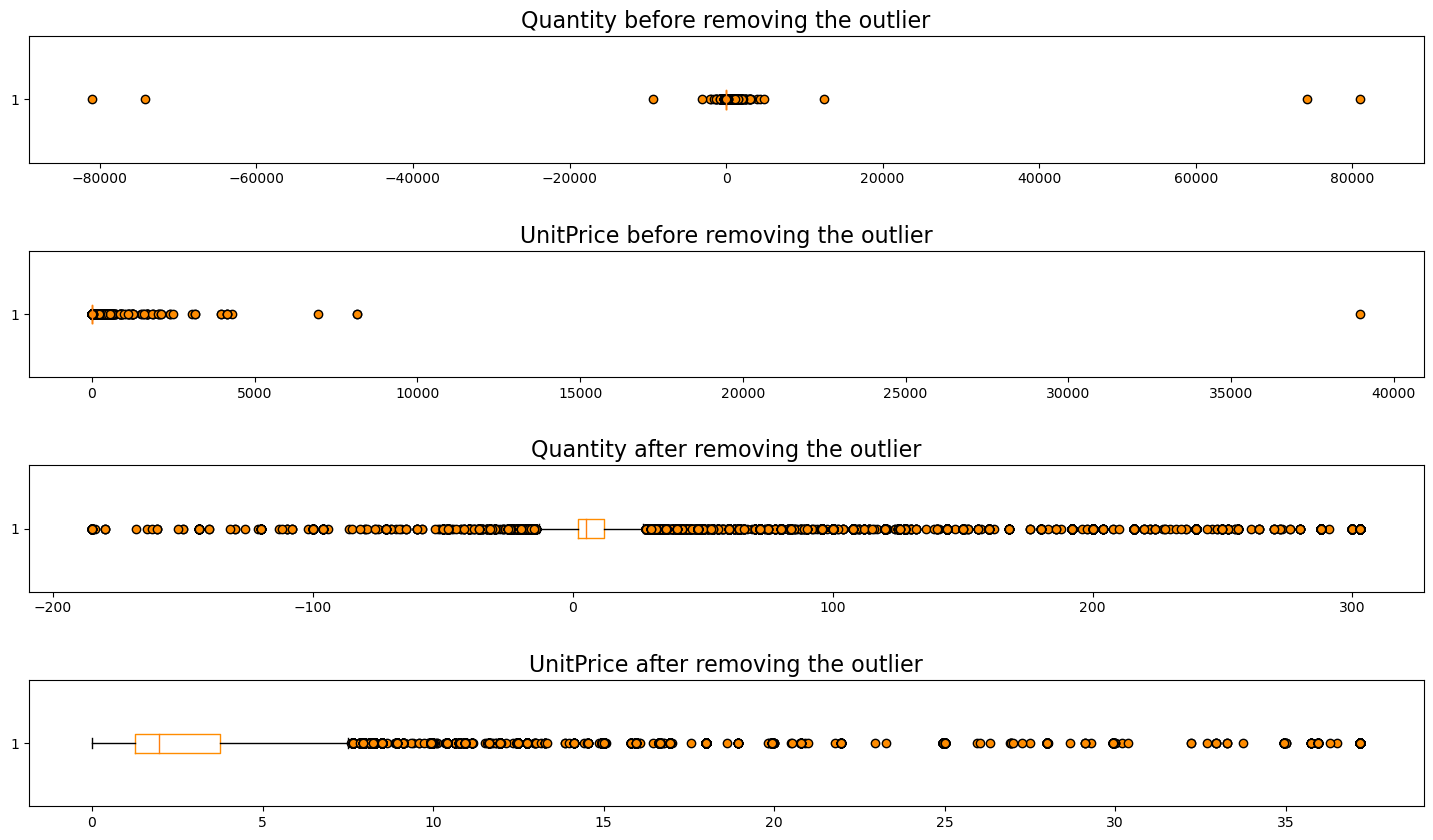

In [46]:
# Observing them before removing outliers.
f, ax = plt.subplots(nrows=4, ncols=1, figsize = (18,10))
# Adjust the vertical spacing between subplots
f.subplots_adjust(hspace=0.7)
col_list = ["Quantity","UnitPrice"]
# Plotting before and after removing outliers
for i, col in enumerate(col_list):
    
    # Plot before removing outliers
    ax[i].boxplot(df_online_retail[col], 
                  sym='o', 
                  vert=False, 
                  showfliers=True, 
                  boxprops=dict(color='#FF8C00'), 
                  flierprops=dict(markerfacecolor='#FF8C00'))
    ax[i].set_title(f'{col} before removing the outlier', fontsize=16)
    
    # Remove outliers and plot after removing outliers
    df_online_retail = replace_with_threshold(df_online_retail, col)
    ax[i + 2].boxplot(df_online_retail[col], 
                      sym='o', 
                      vert=False, 
                      showfliers=True, 
                      boxprops=dict(color='#FF8C00'), 
                      flierprops=dict(markerfacecolor='#FF8C00'))
    ax[i + 2].set_title(f'{col} after removing the outlier', fontsize=16)

# Show the plot
plt.show()

<div style="border-bottom: 15px dashed darkorange; width: 100%;"></div>  



<h2 id="Refined-Data-Representation-and-Feature-Enhancement" style="text-align: center;">Refined Data Representation and Feature Enhancement</h2>

In [47]:
# Calculate the total order amount for each row (UnitPrice * Quantity)
df_online_retail['TotalPrice'] = df_online_retail['UnitPrice'] * df_online_retail['Quantity']
# Determining order cancellation
df_online_retail['Cancellation'] = df_online_retail['InvoiceNo'].str.contains('C', na=False)
# InvoiceDate to date type
df_online_retail['InvoiceDate'] = pd.to_datetime(df_online_retail['InvoiceDate'])
df_online_retail.dtypes

InvoiceNo               object
StockCode               object
Description             object
Quantity                 int64
InvoiceDate     datetime64[ns]
UnitPrice              float64
CustomerID             float64
Country                 object
TotalPrice             float64
Cancellation              bool
dtype: object

In [48]:
df_online_retail

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,Cancellation
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,False
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,False
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,False
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,False
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,False
...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20,False
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60,False
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,False
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,False


In [49]:
df_with_cancellation = df_online_retail.query('Cancellation == True')
df_non_cancelled = df_online_retail.query('Cancellation == False')

In [50]:
df_with_cancellation

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,Cancellation
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.500,14527.0,United Kingdom,-27.500,True
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.650,15311.0,United Kingdom,-4.650,True
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.650,17548.0,United Kingdom,-19.800,True
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.290,17548.0,United Kingdom,-6.960,True
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.290,17548.0,United Kingdom,-6.960,True
...,...,...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.830,14397.0,United Kingdom,-9.130,True
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,37.185,15498.0,United Kingdom,-37.185,True
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.950,15311.0,United Kingdom,-54.750,True
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.250,17315.0,United Kingdom,-1.250,True


In [51]:
df_with_cancellation

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,Cancellation
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.500,14527.0,United Kingdom,-27.500,True
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.650,15311.0,United Kingdom,-4.650,True
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.650,17548.0,United Kingdom,-19.800,True
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.290,17548.0,United Kingdom,-6.960,True
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.290,17548.0,United Kingdom,-6.960,True
...,...,...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.830,14397.0,United Kingdom,-9.130,True
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,37.185,15498.0,United Kingdom,-37.185,True
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.950,15311.0,United Kingdom,-54.750,True
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.250,17315.0,United Kingdom,-1.250,True


In [52]:
df_non_cancelled

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,Cancellation
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,False
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,False
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,False
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,False
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,False
...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20,False
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60,False
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,False
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,False


In [62]:
# Объединяем два DataFrame по условиям 'Description', 'CustomerID' и 'Quantity'
merged_df = df_non_cancelled.merge(df_with_cancellation, on=['Description', 'CustomerID', 'StockCode'], suffixes=('_non_cancelled', '_cancelled'))

# Фильтруем строки, где df_with_cancellation.Quantity меньше или равно df_non_cancelled.Quantity
filtered_df = merged_df[merged_df['Quantity_cancelled'] <= merged_df['Quantity_non_cancelled']]

# Выбираем первую строку, которая удовлетворяет условиям
result_df = filtered_df.groupby(['Description', 'CustomerID']).first().reset_index()
result_df['Diff_Quantity'] = result_df['Quantity_non_cancelled'] + result_df['Quantity_cancelled']
result_df['Diff_TotalPrice'] = result_df['TotalPrice_non_cancelled'] + result_df['TotalPrice_cancelled']
result_df


,Description,CustomerID,InvoiceNo_non_cancelled,StockCode,Quantity_non_cancelled,InvoiceDate_non_cancelled,UnitPrice_non_cancelled,Country_non_cancelled,TotalPrice_non_cancelled,Cancellation_non_cancelled,InvoiceNo_cancelled,Quantity_cancelled,InvoiceDate_cancelled,UnitPrice_cancelled,Country_cancelled,TotalPrice_cancelled,Cancellation_cancelled,Diff_Quantity,Diff_TotalPrice
0,50'S CHRISTMAS GIFT BAG LARGE,13136.0,571224,23437,12,2011-10-14 13:41:00,1.25,United Kingdom,15.00,False,C572111,-2,2011-10-20 19:13:00,1.25,United Kingdom,-2.50,True,10,12.50
1,DOLLY GIRL BEAKER,13418.0,562592,23345,12,2011-08-07 15:43:00,1.25,United Kingdom,15.00,False,C567543,-6,2011-09-21 10:19:00,1.25,United Kingdom,-7.50,True,6,7.50
2,OVAL WALL MIRROR DIAMANTE,15005.0,543020,22167,1,2011-02-02 14:29:00,9.95,United Kingdom,9.95,False,C556888,-1,2011-06-15 12:37:00,9.95,United Kingdom,-9.95,True,0,0.00
3,OVAL WALL MIRROR DIAMANTE,15532.0,539294,22167,3,2010-12-16 16:45:00,9.95,United Kingdom,29.85,False,C558097,-2,2011-06-26 13:29:00,9.95,United Kingdom,-19.90,True,1,9.95
4,OVAL WALL MIRROR DIAMANTE,17612.0,552353,22167,1,2011-05-09 12:14:00,9.95,United Kingdom,9.95,False,C553533,-1,2011-05-17 15:13:00,9.95,United Kingdom,-9.95,True,0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6941,ZINC T-LIGHT HOLDER STARS SMALL,14397.0,552575,23144,12,2011-05-10 12:25:00,0.83,United Kingdom,9.96,False,C581490,-11,2011-12-09 09:57:00,0.83,United Kingdom,-9.13,True,1,0.83
6942,ZINC T-LIGHT HOLDER STARS SMALL,16859.0,560366,23144,12,2011-07-18 12:19:00,0.83,United Kingdom,9.96,False,C564488,-9,2011-08-25 14:12:00,0.83,United Kingdom,-7.47,True,3,2.49
6943,ZINC T-LIGHT HOLDER STARS SMALL,17504.0,552057,23144,24,2011-05-06 10:34:00,0.83,United Kingdom,19.92,False,C552556,-24,2011-05-10 11:21:00,0.83,United Kingdom,-19.92,True,0,0.00
6944,ZINC TOP 2 DOOR WOODEN SHELF,14217.0,537809,21275,1,2010-12-08 13:28:00,16.95,United Kingdom,16.95,False,C538114,-1,2010-12-09 15:29:00,16.95,United Kingdom,-16.95,True,0,0.00


In [ ]:

# Group the data by month and count the number of orders in each month
cancelled_orders_by_month = df_with_cancellation \
    .groupby(df_with_cancellation['InvoiceDate'] \
    .dt.to_period('M'))['InvoiceNo'].count() \
    .reset_index() \
    .rename(columns={'InvoiceNo': 'MonthScore'})
non_cancelled_by_month = df_non_cancelled \
    .groupby(df_non_cancelled['InvoiceDate'] \
    .dt.to_period('M'))['InvoiceNo'].count() \
    .reset_index() \
    .rename(columns={'InvoiceNo': 'MonthScore'})


<div style="border-bottom: 15px dashed darkorange; width: 100%;"></div>  

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

### Orders by Month

In [ ]:
# Размеры графиков на одной фигуре
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.bar(cancelled_orders_by_month['InvoiceDate'].astype(str), 
        cancelled_orders_by_month['MonthScore'])
plt.xlabel('Month Date')
plt.ylabel('Amount orders')
plt.title('Cancelled orders')
plt.xticks(rotation=90)

plt.subplot(1, 3, 2)
plt.bar(non_cancelled_by_month['InvoiceDate'].astype(str), 
        non_cancelled_by_month['MonthScore'])
plt.xlabel('Month Date')
plt.ylabel('Amount orders')
plt.title('Non Cancelled orders')
plt.xticks(rotation=90)

plt.subplot(1, 3, 3)
plt.bar(non_cancelled_by_month['InvoiceDate'].astype(str), 
        cancelled_orders_by_month['MonthScore']/non_cancelled_by_month['MonthScore'])
plt.xlabel('Month Date')
plt.ylabel('Ratio')
plt.title('Cancelled orders / All Orders')
plt.xticks(rotation=90)

plt.show()

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

### Corellation matrix

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(df_online_retail[['Quantity','UnitPrice','CustomerID', 'TotalPrice', 'Cancellation']].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation matrix')
plt.show()

In [ ]:
# Размеры графика
plt.figure(figsize=(19, 6))
plt.subplot(1, 3, 1)
# Строим диаграмму рассеяния
plt.scatter(df_online_retail['Quantity'], df_online_retail['TotalPrice'], alpha=0.5)  # Параметр alpha задает прозрачность точек
# Добавляем подписи осей и заголовок
plt.xlabel('Number of Products')
plt.ylabel('Total Price')
plt.title('All Products')


plt.subplot(1, 3, 2)
# Строим диаграмму рассеяния
plt.scatter(df_with_cancellation['Quantity'], df_with_cancellation['TotalPrice'], alpha=0.5)  # Параметр alpha задает прозрачность точек
# Добавляем подписи осей и заголовок
plt.xlabel('Number of Products')
plt.ylabel('Total Price')
plt.title('Cancelled Products')


plt.subplot(1, 3, 3)
# Строим диаграмму рассеяния
plt.scatter(df_non_cancelled['Quantity'], df_non_cancelled['TotalPrice'], alpha=0.5)  # Параметр alpha задает прозрачность точек
# Добавляем подписи осей и заголовок
plt.xlabel('Number of Products')
plt.ylabel('Total Price')
plt.title('Non Cancelled Products')


# Показываем график
plt.show()




~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

### Linear regression model

In [ ]:
import statsmodels.api as sm
X = df_non_cancelled['Quantity']  # Независимая переменная (предиктор)
y = df_non_cancelled['TotalPrice']  # Зависимая переменная (целевая переменная)

# Добавляем константу для модели (y = b0 + b1*X)
X = sm.add_constant(X)

# Создаем и обучаем модель линейной регрессии
model = sm.OLS(y, X).fit()

# Получаем результаты регрессионного анализа
print(model.summary())

In [ ]:
plt.scatter(df_non_cancelled['Quantity'], df_non_cancelled['TotalPrice'], alpha=0.5)
plt.plot(df_non_cancelled['Quantity'], model.predict(X), color='red')
plt.xlabel('Количество товаров')
plt.ylabel('Общая стоимость')
plt.title('Линейная регрессия: Количество товаров vs Общая стоимость')
plt.show()


R-квадрат (R-squared): Значение R-квадрат (R-squared) равно 0.416, что означает, что около 41.6% дисперсии зависимой переменной (TotalPrice) объясняется независимой переменной (Quantity). Это показывает относительную силу связи между этими переменными. Оставшиеся 58.4% дисперсии объясняются другими факторами, которые не учтены в данной модели.

Коэффициенты: В уравнении регрессии приведены значения коэффициентов. Константа (const) имеет значение 5.2066, что означает ожидаемое значение зависимой переменной при Quantity = 0 (хотя в данной задаче значение Quantity не может быть равно нулю). Коэффициент Quantity равен 1.3078, что говорит о том, что с увеличением Quantity на единицу, TotalPrice ожидается увеличиться на 1.3078 единиц.

P-значения (P>|t|): P-значения для коэффициентов показывают статистическую значимость связи между каждым из коэффициентов и зависимой переменной. Оба коэффициента имеют P-значение равное нулю, что говорит о том, что связь статистически значима.

F-статистика и Prob (F-statistic): F-статистика равна 2.801e+05, а Prob (F-statistic) равно нулю, что указывает на общую статистическую значимость модели регрессии в целом.

Omnibus, Durbin-Watson, Jarque-Bera и Kurtosis: Это статистические показатели, которые помогают оценить адекватность модели. Высокое значение Kurtosis может указывать на аномалии в данных.

Cond. No.: Значение Cond. No. отражает мультиколлинеарность (наличие корреляции между независимыми переменными). Здесь значение Cond. No. равно 31.5, что обычно не является проблемой.

Общий вывод: В данном анализе мы построили линейную регрессию для объяснения зависимой переменной TotalPrice на основе независимой переменной Quantity. Модель имеет статистически значимую связь, но R-квадрат показывает, что модель объясняет только часть дисперсии. Для повышения объяснительной способности модели можно попробовать добавить дополнительные независимые переменные или использовать другую функциональную форму регрессии, если это соответствует характеру данных. Также стоит проверить предпосылки линейной регрессии, такие как нормальность остатков и гомоскедастичность.

### Conclusion of Linear Regression Model
1. R-squared: The value of R-squared is 0.416, which means that about 41.6% of the variance of the dependent variable (TotalPrice) is explained by the independent variable (Quantity). This shows the relative strength of the relationship between these variables. The remaining 58.4% of the variance is explained by other factors that are not accounted for in this model.

2. Coefficients: The regression equation shows the values of the coefficients. The constant (const) has a value of 5.2066, which means the expected value of the dependent variable when Quantity = 0 (although Quantity cannot be zero in this problem). The Quantity coefficient is 1.3078, indicating that as Quantity increases by one unit, TotalPrice is expected to increase by 1.3078 units.

3. P-values (P>|t|): P-values for the coefficients show the statistical significance of the relationship between each of the coefficients and the dependent variable. Both coefficients have P-values equal to zero, indicating that the relationship is statistically significant.

4. F-statistic and Prob (F-statistic): F-statistic is equal to 2.801e+05 and Prob (F-statistic) is equal to zero, indicating the overall statistical significance of the regression model as a whole.

5. Omnibus, Durbin-Watson, Jarque-Bera and Kurtosis: These are statistical measures that help to assess the adequacy of the model. A high value of Kurtosis may indicate anomalies in the data.

6. Cond. No.: The value of Cond. No. reflects multicollinearity (presence of correlation between independent variables). Here, the value of Cond. No. is 31.5, which is usually not a problem.

7. Overall conclusion: In this analysis, we have constructed a linear regression to explain the dependent variable TotalPrice based on the independent variable Quantity. The model has a statistically significant relationship, but the R-square shows that the model explains only a portion of the variance. To increase the explanatory power of the model, you could try adding additional independent variables or using a different functional form of regression if it fits the nature of the data. It is also worth checking the assumptions of linear regression, such as normality of residuals and homoscedasticity.

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

In [ ]:
df_online_retail

In [ ]:
df_online_retail.groupby(["CustomerID", "InvoiceNo"]).agg({'Quantity': 'sum', 'InvoiceDate': 'count'})

In [ ]:
df_online_retail.query("InvoiceNo == 'C541433'")

In [ ]:
df_online_retail.query("InvoiceNo == '541431'")

In [ ]:
c_12347 = df_online_retail.query("CustomerID == 12347.0")
c_12347[c_12347.InvoiceNo.str.contains('C', na=False)]

In [ ]:
df_online_retail.que

<div style="border-bottom: 15px dashed darkorange; width: 100%;"></div>  

In [297]:
df_with_cancellation = df_online_retail[df_online_retail.InvoiceNo.str.contains('C', na=False)]
df_with_cancellation['Cancelled'] = 1
df_with_cancellation

C:\Users\gpapu\AppData\Local\Temp\ipykernel_11040\3599027369.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_with_cancellation['Cancelled'] = 1


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,Cancellation,Cancelled
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.500,14527.0,United Kingdom,-27.500,True,1
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.650,15311.0,United Kingdom,-4.650,True,1
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.650,17548.0,United Kingdom,-19.800,True,1
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.290,17548.0,United Kingdom,-6.960,True,1
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.290,17548.0,United Kingdom,-6.960,True,1
...,...,...,...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.830,14397.0,United Kingdom,-9.130,True,1
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,37.185,15498.0,United Kingdom,-37.185,True,1
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.950,15311.0,United Kingdom,-54.750,True,1
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.250,17315.0,United Kingdom,-1.250,True,1


In [298]:
df_non_cancelled = df_online_retail[~df_online_retail.InvoiceNo.str.contains('C', na=False)]
df_non_cancelled['Cancelled'] = 0
df_non_cancelled

C:\Users\gpapu\AppData\Local\Temp\ipykernel_11040\1407255106.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_non_cancelled['Cancelled'] = 0


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,Cancellation,Cancelled
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,False,0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,False,0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,False,0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,False,0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,False,0
...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20,False,0
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60,False,0
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,False,0
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,False,0


In [ ]:
# Объедините два датасета в один для анализа
combined_df = pd.concat([df_with_cancellation, df_non_cancelled], ignore_index=True)
combined_df

In [ ]:
df_corr = combined_df[['Quantity','UnitPrice','TotalPrice', 'Cancelled', 'Country']].corr()
sns.heatmap(df_corr, annot = True, cmap = 'coolwarm')

In [ ]:
# Цикл для каждой строки в df_with_cancellation
for index, row in df_with_cancellation.iterrows():
    # Находим соответствующую строку в df_non_cancelled по Description и CustomerID
    mask = (df_non_cancelled['Description'] == row['Description']) & (df_non_cancelled['CustomerID'] == row['CustomerID'])
    matched_row = df_non_cancelled[mask]
    

Empty DataFrame
Columns: [InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, Country, TotalPrice, Cancellation, Cancelled]
Index: []
      InvoiceNo StockCode                      Description  Quantity  \
9200     537195    35004C  SET OF 3 COLOURED  FLYING DUCKS        12   
28630    538651    35004C  SET OF 3 COLOURED  FLYING DUCKS        12   
44157    540157    35004C  SET OF 3 COLOURED  FLYING DUCKS        12   
59542    541293    35004C  SET OF 3 COLOURED  FLYING DUCKS        12   

              InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  \
9200  2010-12-05 13:55:00       4.65     15311.0  United Kingdom        55.8   
28630 2010-12-13 15:07:00       4.65     15311.0  United Kingdom        55.8   
44157 2011-01-05 11:41:00       4.65     15311.0  United Kingdom        55.8   
59542 2011-01-17 13:39:00       4.65     15311.0  United Kingdom        55.8   

       Cancellation  Cancelled  
9200          False          0  
28630    

     InvoiceNo StockCode               Description  Quantity  \
9431    537201     22631  CIRCUS PARADE LUNCH BOX         12   

             InvoiceDate  UnitPrice  CustomerID  Country  TotalPrice  \
9431 2010-12-05 14:19:00       1.95     12472.0  Germany        23.4   

      Cancellation  Cancelled  
9431         False          0  
      InvoiceNo StockCode                    Description  Quantity  \
71802    542215     22168  ORGANISER WOOD ANTIQUE WHITE          2   

              InvoiceDate  UnitPrice  CustomerID  Country  TotalPrice  \
71802 2011-01-26 12:27:00        8.5     12472.0  Germany        17.0   

       Cancellation  Cancelled  
71802         False          0  
Empty DataFrame
Columns: [InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, Country, TotalPrice, Cancellation, Cancelled]
Index: []
Empty DataFrame
Columns: [InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, Country, TotalPrice, Cancellation, Can

Empty DataFrame
Columns: [InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, Country, TotalPrice, Cancellation, Cancelled]
Index: []
Empty DataFrame
Columns: [InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, Country, TotalPrice, Cancellation, Cancelled]
Index: []
Empty DataFrame
Columns: [InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, Country, TotalPrice, Cancellation, Cancelled]
Index: []
Empty DataFrame
Columns: [InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, Country, TotalPrice, Cancellation, Cancelled]
Index: []
Empty DataFrame
Columns: [InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, Country, TotalPrice, Cancellation, Cancelled]
Index: []
Empty DataFrame
Columns: [InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, Country, TotalPrice, Cancellation, Cancelled]
Index: []
Empty DataFrame
Column

       InvoiceNo StockCode                  Description  Quantity  \
7733      537051     22854  CREAM SWEETHEART EGG HOLDER         2   
276416    561043     22854  CREAM SWEETHEART EGG HOLDER         2   

               InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  \
7733   2010-12-05 11:12:00       4.95     15708.0  United Kingdom         9.9   
276416 2011-07-24 12:20:00       4.95     15708.0  United Kingdom         9.9   

        Cancellation  Cancelled  
7733           False          0  
276416         False          0  
     InvoiceNo StockCode           Description  Quantity         InvoiceDate  \
7703    537051     20936  FORKED CACTUS CANDLE         6 2010-12-05 11:12:00   

      UnitPrice  CustomerID         Country  TotalPrice  Cancellation  \
7703       2.95     15708.0  United Kingdom        17.7         False   

      Cancelled  
7703          0  
       InvoiceNo StockCode            Description  Quantity  \
7729      537051     85175  CACTI T-LIG

      InvoiceNo StockCode            Description  Quantity  \
9769     537216     47580  TEA TIME DES TEA COSY         6   
13013    537407     47580  TEA TIME DES TEA COSY         6   

              InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  \
9769  2010-12-05 15:40:00       2.55     15502.0  United Kingdom        15.3   
13013 2010-12-06 14:55:00       2.55     15502.0  United Kingdom        15.3   

       Cancellation  Cancelled  
9769          False          0  
13013         False          0  
       InvoiceNo StockCode                   Description  Quantity  \
9771      537216     22196  SMALL HEART MEASURING SPOONS        12   
13018     537407     22196  SMALL HEART MEASURING SPOONS        12   
114972    546096     22196  SMALL HEART MEASURING SPOONS        12   

               InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  \
9771   2010-12-05 15:40:00       0.85     15502.0  United Kingdom        10.2   
13018  2010-12-06 14:55:00    

Empty DataFrame
Columns: [InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, Country, TotalPrice, Cancellation, Cancelled]
Index: []
       InvoiceNo StockCode              Description  Quantity  \
234       536390    85099B  JUMBO BAG RED RETROSPOT       100   
44450     540176    85099B  JUMBO BAG RED RETROSPOT       100   
77827     542789    85099B  JUMBO BAG RED RETROSPOT       100   
98071     544667    85099B  JUMBO BAG RED RETROSPOT       100   
134344    547832    85099B  JUMBO BAG RED RETROSPOT       300   
227394    556845    85099B  JUMBO BAG RED RETROSPOT       100   
250467    559032    85099B  JUMBO BAG RED RETROSPOT       100   
290093    562348    85099B  JUMBO BAG RED RETROSPOT       100   
303192    563532    85099B  JUMBO BAG RED RETROSPOT       100   
328895    565836    85099B  JUMBO BAG RED RETROSPOT        10   
350030    567610    85099B  JUMBO BAG RED RETROSPOT       100   
377965    569573    85099B  JUMBO BAG RED RETROSPOT      

       InvoiceNo StockCode                       Description  Quantity  \
44431     540176     22169  FAMILY ALBUM WHITE PICTURE FRAME         8   
121145    546739     22169  FAMILY ALBUM WHITE PICTURE FRAME         8   
153963    549835     22169  FAMILY ALBUM WHITE PICTURE FRAME         8   
227374    556845     22169  FAMILY ALBUM WHITE PICTURE FRAME        16   
290069    562348     22169  FAMILY ALBUM WHITE PICTURE FRAME        16   
419367    572772     22169  FAMILY ALBUM WHITE PICTURE FRAME         8   
533222    581020     22169  FAMILY ALBUM WHITE PICTURE FRAME        16   

               InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  \
44431  2011-01-05 12:40:00       7.65     17511.0  United Kingdom        61.2   
121145 2011-03-16 12:12:00       7.65     17511.0  United Kingdom        61.2   
153963 2011-04-12 13:24:00       7.65     17511.0  United Kingdom        61.2   
227374 2011-06-15 11:30:00       7.65     17511.0  United Kingdom       122.4   
29

       InvoiceNo StockCode               Description  Quantity  \
18214     537806     22423  REGENCY CAKESTAND 3 TIER        16   
54414     540951     22423  REGENCY CAKESTAND 3 TIER        16   
82448     543232     22423  REGENCY CAKESTAND 3 TIER        16   
127194    547201     22423  REGENCY CAKESTAND 3 TIER        16   

               InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  \
18214  2010-12-08 13:21:00      10.95     13113.0  United Kingdom       175.2   
54414  2011-01-12 13:10:00      10.95     13113.0  United Kingdom       175.2   
82448  2011-02-04 13:28:00      10.95     13113.0  United Kingdom       175.2   
127194 2011-03-21 13:35:00      10.95     13113.0  United Kingdom       175.2   

        Cancellation  Cancelled  
18214          False          0  
54414          False          0  
82448          False          0  
127194         False          0  
       InvoiceNo StockCode            Description  Quantity  \
72057     542228     22469  HE

Empty DataFrame
Columns: [InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, Country, TotalPrice, Cancellation, Cancelled]
Index: []
Empty DataFrame
Columns: [InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, Country, TotalPrice, Cancellation, Cancelled]
Index: []
Empty DataFrame
Columns: [InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, Country, TotalPrice, Cancellation, Cancelled]
Index: []
      InvoiceNo StockCode                Description  Quantity  \
10213    537236     22073  RED RETROSPOT STORAGE JAR        16   
10219    537236     22073  RED RETROSPOT STORAGE JAR         8   

              InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  \
10213 2010-12-06 09:52:00       3.39     16858.0  United Kingdom       54.24   
10219 2010-12-06 09:52:00       3.75     16858.0  United Kingdom       30.00   

       Cancellation  Cancelled  
10213         False          0  
10219

Empty DataFrame
Columns: [InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, Country, TotalPrice, Cancellation, Cancelled]
Index: []
Empty DataFrame
Columns: [InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, Country, TotalPrice, Cancellation, Cancelled]
Index: []
Empty DataFrame
Columns: [InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, Country, TotalPrice, Cancellation, Cancelled]
Index: []
Empty DataFrame
Columns: [InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, Country, TotalPrice, Cancellation, Cancelled]
Index: []
Empty DataFrame
Columns: [InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, Country, TotalPrice, Cancellation, Cancelled]
Index: []
Empty DataFrame
Columns: [InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, Country, TotalPrice, Cancellation, Cancelled]
Index: []
Empty DataFrame
Column

      InvoiceNo StockCode                    Description  Quantity  \
50762    540552     21314  SMALL GLASS HEART TRINKET POT         8   

              InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  \
50762 2011-01-10 09:44:00        2.1     16350.0  United Kingdom        16.8   

       Cancellation  Cancelled  
50762         False          0  
Empty DataFrame
Columns: [InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, Country, TotalPrice, Cancellation, Cancelled]
Index: []
       InvoiceNo StockCode                          Description  Quantity  \
136014    547921    84625C  BLUE NEW BAROQUE CANDLESTICK CANDLE        24   
182585    552558    84625C  BLUE NEW BAROQUE CANDLESTICK CANDLE        24   

               InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  \
136014 2011-03-28 13:28:00       0.85     14766.0  United Kingdom        20.4   
182585 2011-05-10 11:33:00       0.85     14766.0  United Kingdom        20

     InvoiceNo StockCode                    Description  Quantity  \
2266    536571     22444  GROW YOUR OWN PLANT IN A CAN         24   

             InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  \
2266 2010-12-01 15:37:00       1.25     14696.0  United Kingdom        30.0   

      Cancellation  Cancelled  
2266         False          0  
Empty DataFrame
Columns: [InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, Country, TotalPrice, Cancellation, Cancelled]
Index: []
Empty DataFrame
Columns: [InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, Country, TotalPrice, Cancellation, Cancelled]
Index: []
Empty DataFrame
Columns: [InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, Country, TotalPrice, Cancellation, Cancelled]
Index: []
Empty DataFrame
Columns: [InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, Country, TotalPrice, Cancellation, Cancell

       InvoiceNo StockCode                Description  Quantity  \
24108     538313     22728  ALARM CLOCK BAKELIKE PINK         1   
24115     538313     22728  ALARM CLOCK BAKELIKE PINK         3   
24143     538327     22728  ALARM CLOCK BAKELIKE PINK         4   
442193    574667     22728  ALARM CLOCK BAKELIKE PINK         3   

               InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  \
24108  2010-12-10 13:50:00       3.75     15514.0  United Kingdom        3.75   
24115  2010-12-10 13:50:00       3.75     15514.0  United Kingdom       11.25   
24143  2010-12-10 13:58:00       3.75     15514.0  United Kingdom       15.00   
442193 2011-11-06 12:12:00       3.75     15514.0  United Kingdom       11.25   

        Cancellation  Cancelled  
24108          False          0  
24115          False          0  
24143          False          0  
442193         False          0  
       InvoiceNo StockCode                Description  Quantity  \
24110     538313     

      InvoiceNo StockCode                        Description  Quantity  \
24126    538313     22243  5 HOOK HANGER RED MAGIC TOADSTOOL         6   
24149    538327     22243  5 HOOK HANGER RED MAGIC TOADSTOOL         6   

              InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  \
24126 2010-12-10 13:50:00       1.65     15514.0  United Kingdom         9.9   
24149 2010-12-10 13:58:00       1.65     15514.0  United Kingdom         9.9   

       Cancellation  Cancelled  
24126         False          0  
24149         False          0  
      InvoiceNo StockCode                       Description  Quantity  \
24104    538313     22131  FOOD CONTAINER SET 3 LOVE HEART          1   
24150    538327     22131  FOOD CONTAINER SET 3 LOVE HEART          1   

              InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  \
24104 2010-12-10 13:50:00       1.95     15514.0  United Kingdom        1.95   
24150 2010-12-10 13:58:00       1.95     15514.0  United 

       InvoiceNo StockCode              Description  Quantity  \
117050    546326     20727  LUNCH BAG  BLACK SKULL.       100   
173902    551725     20727  LUNCH BAG  BLACK SKULL.       100   
233431    557470     20727  LUNCH BAG  BLACK SKULL.       100   

               InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  \
117050 2011-03-11 10:15:00       1.45     13798.0  United Kingdom       145.0   
173902 2011-05-04 08:15:00       1.45     13798.0  United Kingdom       145.0   
233431 2011-06-20 13:21:00       1.45     13798.0  United Kingdom       145.0   

        Cancellation  Cancelled  
117050         False          0  
173902         False          0  
233431         False          0  
      InvoiceNo StockCode                     Description  Quantity  \
25102    538353     21928  JUMBO BAG SCANDINAVIAN PAISLEY       100   
95054    544439     21928  JUMBO BAG SCANDINAVIAN PAISLEY       100   

              InvoiceDate  UnitPrice  CustomerID         Country

      InvoiceNo StockCode                        Description  Quantity  \
25112    538353     37447  CERAMIC CAKE DESIGN SPOTTED PLATE        48   

              InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  \
25112 2010-12-10 15:31:00       1.25     13798.0  United Kingdom        60.0   

       Cancellation  Cancelled  
25112         False          0  
       InvoiceNo StockCode             Description  Quantity  \
68368     541864     82551  LAUNDRY 15C METAL SIGN        96   
241859    558248     82551  LAUNDRY 15C METAL SIGN        96   

               InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  \
68368  2011-01-23 16:17:00       1.25     13798.0  United Kingdom       120.0   
241859 2011-06-27 16:48:00       1.25     13798.0  United Kingdom       120.0   

        Cancellation  Cancelled  
68368          False          0  
241859         False          0  
       InvoiceNo StockCode                    Description  Quantity  \
25105     5383

       InvoiceNo StockCode           Description  Quantity  \
17256     537692     22630  DOLLY GIRL LUNCH BOX        36   
68753     541872     22630  DOLLY GIRL LUNCH BOX         4   
87377     543653     22630  DOLLY GIRL LUNCH BOX         4   
133244    547730     22630  DOLLY GIRL LUNCH BOX         4   
157270    550196     22630  DOLLY GIRL LUNCH BOX         1   
177258    552051     22630  DOLLY GIRL LUNCH BOX         3   
233681    557484     22630  DOLLY GIRL LUNCH BOX         3   
258790    559672     22630  DOLLY GIRL LUNCH BOX         4   
277809    561195     22630  DOLLY GIRL LUNCH BOX         4   
311327    564256     22630  DOLLY GIRL LUNCH BOX         4   
327603    565682     22630  DOLLY GIRL LUNCH BOX         2   
397427    571183     22630  DOLLY GIRL LUNCH BOX         4   
476928    577038     22630  DOLLY GIRL LUNCH BOX         4   
539012    581425     22630  DOLLY GIRL LUNCH BOX         2   

               InvoiceDate  UnitPrice  CustomerID         Country  To

Empty DataFrame
Columns: [InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, Country, TotalPrice, Cancellation, Cancelled]
Index: []
       InvoiceNo StockCode               Description  Quantity  \
138967    548257     22423  REGENCY CAKESTAND 3 TIER        16   

               InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  \
138967 2011-03-30 10:54:00      10.95     13802.0  United Kingdom       175.2   

        Cancellation  Cancelled  
138967         False          0  
      InvoiceNo StockCode                          Description  Quantity  \
14324    537523     22645  CERAMIC HEART FAIRY CAKE MONEY BANK        12   

              InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  \
14324 2010-12-07 11:45:00       1.45     14176.0  United Kingdom        17.4   

       Cancellation  Cancelled  
14324         False          0  
       InvoiceNo StockCode                  Description  Quantity  \
17100     537680     228

Empty DataFrame
Columns: [InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, Country, TotalPrice, Cancellation, Cancelled]
Index: []
      InvoiceNo StockCode                   Description  Quantity  \
10153    537227     22941  CHRISTMAS LIGHTS 10 REINDEER         2   

              InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  \
10153 2010-12-06 08:42:00        8.5     17677.0  United Kingdom        17.0   

       Cancellation  Cancelled  
10153         False          0  
Empty DataFrame
Columns: [InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, Country, TotalPrice, Cancellation, Cancelled]
Index: []
       InvoiceNo StockCode              Description  Quantity  \
119486    546544     22179  SET 10 LIGHTS NIGHT OWL         6   

               InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  \
119486 2011-03-14 15:41:00       6.75     16570.0  United Kingdom        40.5   

        Cancel

       InvoiceNo StockCode    Description  Quantity         InvoiceDate  \
14176     537464     21876  POTTERING MUG        12 2010-12-07 10:14:00   
531399    580939     21876  POTTERING MUG        12 2011-12-06 14:14:00   

        UnitPrice  CustomerID         Country  TotalPrice  Cancellation  \
14176        1.25     14907.0  United Kingdom        15.0         False   
531399       1.65     14907.0  United Kingdom        19.8         False   

        Cancelled  
14176           0  
531399          0  
      InvoiceNo StockCode                        Description  Quantity  \
29422    538796     22114  HOT WATER BOTTLE TEA AND SYMPATHY         4   

              InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  \
29422 2010-12-14 11:43:00       3.95     17041.0  United Kingdom        15.8   

       Cancellation  Cancelled  
29422         False          0  
       InvoiceNo StockCode               Description  Quantity  \
3303      536619     22960  JAM MAKING SET WIT

       InvoiceNo StockCode                 Description  Quantity  \
127448    547223     22244  3 HOOK HANGER MAGIC GARDEN        12   

               InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  \
127448 2011-03-21 15:10:00       1.95     12867.0  United Kingdom        23.4   

        Cancellation  Cancelled  
127448         False          0  
      InvoiceNo StockCode                    Description  Quantity  \
89892    543978     22230  JIGSAW TREE WITH WATERING CAN        10   

              InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  \
89892 2011-02-14 15:37:00       0.85     12867.0  United Kingdom         8.5   

       Cancellation  Cancelled  
89892         False          0  
       InvoiceNo StockCode                  Description  Quantity  \
463396    576062    82494L  WOODEN FRAME ANTIQUE WHITE          6   

               InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  \
463396 2011-11-13 15:30:00       2.95     12

Empty DataFrame
Columns: [InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, Country, TotalPrice, Cancellation, Cancelled]
Index: []
       InvoiceNo StockCode              Description  Quantity  \
231908    557291     21906  PHARMACIE FIRST AID TIN         6   

               InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  \
231908 2011-06-19 13:01:00       6.75     18230.0  United Kingdom        40.5   

        Cancellation  Cancelled  
231908         False          0  
Empty DataFrame
Columns: [InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, Country, TotalPrice, Cancellation, Cancelled]
Index: []
      InvoiceNo StockCode                        Description  Quantity  \
29028    538688     22722  SET OF 6 SPICE TINS PANTRY DESIGN         8   

              InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  \
29028 2010-12-14 09:50:00       3.95     14829.0  United Kingdom        31.6   

  

       InvoiceNo StockCode                     Description  Quantity  \
357500    568095    90185C  BLACK DIAMANTE EXPANDABLE RING         6   

               InvoiceDate  UnitPrice  CustomerID Country  TotalPrice  \
357500 2011-09-23 14:49:00       4.25     14911.0    EIRE        25.5   

        Cancellation  Cancelled  
357500         False          0  
       InvoiceNo StockCode                    Description  Quantity  \
6735      536975     22592  CARDHOLDER HOLLY WREATH METAL         4   
314770    564654     22592  CARDHOLDER HOLLY WREATH METAL         4   

               InvoiceDate  UnitPrice  CustomerID Country  TotalPrice  \
6735   2010-12-03 14:04:00       3.75     14911.0    EIRE        15.0   
314770 2011-08-26 14:29:00       3.75     14911.0    EIRE        15.0   

        Cancellation  Cancelled  
6735           False          0  
314770         False          0  
       InvoiceNo StockCode                   Description  Quantity  \
6724      536975     22941  CHRIST

      InvoiceNo StockCode                 Description  Quantity  \
18276    537817     22617  BAKING SET SPACEBOY DESIGN         6   

              InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  \
18276 2010-12-08 13:53:00       4.95     18269.0  United Kingdom        29.7   

       Cancellation  Cancelled  
18276         False          0  
      InvoiceNo StockCode                    Description  Quantity  \
29415    538795     22168  ORGANISER WOOD ANTIQUE WHITE          2   

              InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  \
29415 2010-12-14 11:42:00        8.5     13267.0  United Kingdom        17.0   

       Cancellation  Cancelled  
29415         False          0  
      InvoiceNo StockCode             Description  Quantity  \
4692     536797     22865  HAND WARMER OWL DESIGN        12   
33669    539282     22865  HAND WARMER OWL DESIGN        12   

              InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  \


       InvoiceNo StockCode                         Description  Quantity  \
37493     539468     82483  WOOD 2 DRAWER CABINET WHITE FINISH        10   
41306     539826     82483  WOOD 2 DRAWER CABINET WHITE FINISH         8   
41327     539828     82483  WOOD 2 DRAWER CABINET WHITE FINISH         4   
93694     544305     82483  WOOD 2 DRAWER CABINET WHITE FINISH         2   
279514    561329     82483  WOOD 2 DRAWER CABINET WHITE FINISH         2   
358452    568147     82483  WOOD 2 DRAWER CABINET WHITE FINISH         6   
376816    569535     82483  WOOD 2 DRAWER CABINET WHITE FINISH         2   
429251    573551     82483  WOOD 2 DRAWER CABINET WHITE FINISH         2   

               InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  \
37493  2010-12-19 13:31:00       5.95     15044.0  United Kingdom        59.5   
41306  2010-12-22 12:39:00       5.95     15044.0  United Kingdom        47.6   
41327  2010-12-22 12:44:00       5.95     15044.0  United Kingdom       

      InvoiceNo StockCode              Description  Quantity  \
32456    539077     21363  HOME SMALL WOOD LETTERS         9   

              InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  \
32456 2010-12-16 08:05:00       4.95     13089.0  United Kingdom       44.55   

       Cancellation  Cancelled  
32456         False          0  
       InvoiceNo StockCode                         Description  Quantity  \
34120     539320    85123A  WHITE HANGING HEART T-LIGHT HOLDER        24   
40062     539722    85123A  WHITE HANGING HEART T-LIGHT HOLDER        24   
69713     541979    85123A  WHITE HANGING HEART T-LIGHT HOLDER         6   
77665     542777    85123A  WHITE HANGING HEART T-LIGHT HOLDER         6   
92978     544210    85123A  WHITE HANGING HEART T-LIGHT HOLDER         6   
109647    545657    85123A  WHITE HANGING HEART T-LIGHT HOLDER         6   
119776    546580    85123A  WHITE HANGING HEART T-LIGHT HOLDER        18   
152616    549667    85123A  WHITE HA

       InvoiceNo StockCode              Description  Quantity  \
34115     539320     22897  OVEN MITT APPLES DESIGN        10   
175300    551950     22897  OVEN MITT APPLES DESIGN        10   
462932    576051     22897  OVEN MITT APPLES DESIGN        20   

               InvoiceDate  UnitPrice  CustomerID Country  TotalPrice  \
34115  2010-12-16 19:16:00       1.45     14911.0    EIRE        14.5   
175300 2011-05-05 11:38:00       1.45     14911.0    EIRE        14.5   
462932 2011-11-13 14:45:00       1.45     14911.0    EIRE        29.0   

        Cancellation  Cancelled  
34115          False          0  
175300         False          0  
462932         False          0  
       InvoiceNo StockCode            Description  Quantity  \
34117     539320     22896  PEG BAG APPLES DESIGN        12   
123851    546917     22896  PEG BAG APPLES DESIGN         6   

               InvoiceDate  UnitPrice  CustomerID Country  TotalPrice  \
34117  2010-12-16 19:16:00       2.55     14911

Empty DataFrame
Columns: [InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, Country, TotalPrice, Cancellation, Cancelled]
Index: []
      InvoiceNo StockCode                   Description  Quantity  \
33902    539307     20801  LARGE PINK GLASS SUNDAE DISH        32   
55835    540999     20801  LARGE PINK GLASS SUNDAE DISH        96   

              InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  \
33902 2010-12-16 17:43:00       0.75     13694.0  United Kingdom        24.0   
55835 2011-01-13 10:08:00       0.75     13694.0  United Kingdom        72.0   

       Cancellation  Cancelled  
33902         False          0  
55835         False          0  
      InvoiceNo StockCode               Description  Quantity  \
19822    537895     21843  RED RETROSPOT CAKE STAND        24   
45949    540345     21843  RED RETROSPOT CAKE STAND         8   

              InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  \
19822 2010-12

      InvoiceNo StockCode                  Description  Quantity  \
25121    538354     85066  CREAM SWEETHEART MINI CHEST         6   

              InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  \
25121 2010-12-10 15:45:00      12.75     16873.0  United Kingdom        76.5   

       Cancellation  Cancelled  
25121         False          0  
      InvoiceNo StockCode                     Description  Quantity  \
25129    538354     22487  WHITE WOOD GARDEN PLANT LADDER         4   

              InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  \
25129 2010-12-10 15:45:00        8.5     16873.0  United Kingdom        34.0   

       Cancellation  Cancelled  
25129         False          0  
      InvoiceNo StockCode                 Description  Quantity  \
31381    538945     21166  COOK WITH WINE METAL SIGN         48   
39322    539633     21166  COOK WITH WINE METAL SIGN         12   

              InvoiceDate  UnitPrice  CustomerID         Country

       InvoiceNo StockCode                         Description  Quantity  \
22551     538174     22646  CERAMIC STRAWBERRY CAKE MONEY BANK        36   
144498    548745     22646  CERAMIC STRAWBERRY CAKE MONEY BANK        12   

               InvoiceDate  UnitPrice  CustomerID  Country  TotalPrice  \
22551  2010-12-10 09:35:00       1.45     12471.0  Germany        52.2   
144498 2011-04-04 12:10:00       1.45     12471.0  Germany        17.4   

        Cancellation  Cancelled  
22551          False          0  
144498         False          0  
       InvoiceNo StockCode                     Description  Quantity  \
22542     538174     21232  STRAWBERRY CERAMIC TRINKET BOX        36   
80727     543056     21232  STRAWBERRY CERAMIC TRINKET BOX        24   
123881    546920     21232  STRAWBERRY CERAMIC TRINKET BOX        24   
254183    559298     21232  STRAWBERRY CERAMIC TRINKET BOX        24   
312651    564360     21232  STRAWBERRY CERAMIC TRINKET BOX        12   
378276    5696

       InvoiceNo StockCode                      Description  Quantity  \
22577     538174     21577  SAVE THE PLANET COTTON TOTE BAG        18   
34481     539395     21577  SAVE THE PLANET COTTON TOTE BAG        12   
123878    546920     21577  SAVE THE PLANET COTTON TOTE BAG         6   
144493    548745     21577  SAVE THE PLANET COTTON TOTE BAG         6   

               InvoiceDate  UnitPrice  CustomerID  Country  TotalPrice  \
22577  2010-12-10 09:35:00       2.25     12471.0  Germany        40.5   
34481  2010-12-17 11:52:00       2.25     12471.0  Germany        27.0   
123878 2011-03-18 09:55:00       2.25     12471.0  Germany        13.5   
144493 2011-04-04 12:10:00       2.25     12471.0  Germany        13.5   

        Cancellation  Cancelled  
22577          False          0  
34481          False          0  
123878         False          0  
144493         False          0  
       InvoiceNo StockCode                Description  Quantity  \
22546     538174     22472

Empty DataFrame
Columns: [InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, Country, TotalPrice, Cancellation, Cancelled]
Index: []
Empty DataFrame
Columns: [InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, Country, TotalPrice, Cancellation, Cancelled]
Index: []
Empty DataFrame
Columns: [InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, Country, TotalPrice, Cancellation, Cancelled]
Index: []
       InvoiceNo StockCode            Description  Quantity  \
283048    561687     22784  LANTERN CREAM GAZEBO          3   

               InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  \
283048 2011-07-29 08:30:00       4.95     13148.0  United Kingdom       14.85   

        Cancellation  Cancelled  
283048         False          0  
       InvoiceNo StockCode                         Description  Quantity  \
33729     539293     22890  NOVELTY BISCUITS CAKE STAND 3 TIER         6   
1

      InvoiceNo StockCode            Description  Quantity  \
31582    538995     22198  LARGE POPCORN HOLDER         24   
45604    540268     22198  LARGE POPCORN HOLDER         36   

              InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  \
31582 2010-12-15 12:05:00       1.65     13458.0  United Kingdom        39.6   
45604 2011-01-06 11:25:00       1.65     13458.0  United Kingdom        59.4   

       Cancellation  Cancelled  
31582         False          0  
45604         False          0  
       InvoiceNo StockCode             Description  Quantity  \
190828    553211    47567B  TEA TIME KITCHEN APRON         3   

               InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  \
190828 2011-05-16 09:40:00       5.95     15358.0  United Kingdom       17.85   

        Cancellation  Cancelled  
190828         False          0  
     InvoiceNo StockCode                   Description  Quantity  \
5366    536861     22300  COFFEE MUG DOG + BA

       InvoiceNo StockCode                          Description  Quantity  \
29981     538839     84352  SILVER CHRISTMAS TREE BAUBLE STAND          2   
42649     540014     84352  SILVER CHRISTMAS TREE BAUBLE STAND          1   
54537     540954     84352  SILVER CHRISTMAS TREE BAUBLE STAND          2   
258284    559606     84352  SILVER CHRISTMAS TREE BAUBLE STAND          1   
277400    561112     84352  SILVER CHRISTMAS TREE BAUBLE STAND          2   
283272    561704     84352  SILVER CHRISTMAS TREE BAUBLE STAND          1   
352713    567679     84352  SILVER CHRISTMAS TREE BAUBLE STAND          2   

               InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  \
29981  2010-12-14 13:10:00      16.95     14606.0  United Kingdom       33.90   
42649  2011-01-04 11:34:00      16.95     14606.0  United Kingdom       16.95   
54537  2011-01-12 13:19:00      16.95     14606.0  United Kingdom       33.90   
258284 2011-07-11 11:38:00      16.95     14606.0  United K

       InvoiceNo StockCode               Description  Quantity  \
7004      536985     21843  RED RETROSPOT CAKE STAND         6   
31230     538907     21843  RED RETROSPOT CAKE STAND         6   
71947     542220     21843  RED RETROSPOT CAKE STAND         3   
485578    577610     21843  RED RETROSPOT CAKE STAND         4   
517888    580098     21843  RED RETROSPOT CAKE STAND         5   

               InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  \
7004   2010-12-03 14:40:00      10.95     15373.0  United Kingdom       65.70   
31230  2010-12-15 10:40:00      10.95     15373.0  United Kingdom       65.70   
71947  2011-01-26 12:38:00      10.95     15373.0  United Kingdom       32.85   
485578 2011-11-21 09:55:00      10.95     15373.0  United Kingdom       43.80   
517888 2011-12-01 15:05:00      10.95     15373.0  United Kingdom       54.75   

        Cancellation  Cancelled  
7004           False          0  
31230          False          0  
71947         

Empty DataFrame
Columns: [InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, Country, TotalPrice, Cancellation, Cancelled]
Index: []
Empty DataFrame
Columns: [InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, Country, TotalPrice, Cancellation, Cancelled]
Index: []
Empty DataFrame
Columns: [InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, Country, TotalPrice, Cancellation, Cancelled]
Index: []
Empty DataFrame
Columns: [InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, Country, TotalPrice, Cancellation, Cancelled]
Index: []
Empty DataFrame
Columns: [InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, Country, TotalPrice, Cancellation, Cancelled]
Index: []
       InvoiceNo StockCode               Description  Quantity  \
314774    564654     21351  CINAMMON & ORANGE WREATH         4   

               InvoiceDate  UnitPrice  CustomerID Co

      InvoiceNo StockCode             Description  Quantity  \
41725    539957     22316  200 BENDY SKULL STRAWS        12   

              InvoiceDate  UnitPrice  CustomerID  Country  TotalPrice  \
41725 2010-12-23 12:58:00       1.25     12585.0  Germany        15.0   

       Cancellation  Cancelled  
41725         False          0  
      InvoiceNo StockCode                     Description  Quantity  \
41722    539957     22638  SET OF 4 NAPKIN CHARMS CROWNS          6   

              InvoiceDate  UnitPrice  CustomerID  Country  TotalPrice  \
41722 2010-12-23 12:58:00       2.55     12585.0  Germany        15.3   

       Cancellation  Cancelled  
41722         False          0  
       InvoiceNo StockCode                      Description  Quantity  \
41712     539957     22558  CLOTHES PEGS RETROSPOT PACK 24         12   
163643    550620     22558  CLOTHES PEGS RETROSPOT PACK 24         24   

               InvoiceDate  UnitPrice  CustomerID  Country  TotalPrice  \
41712  201

     InvoiceNo StockCode            Description  Quantity         InvoiceDate  \
7371    537034     22198  LARGE POPCORN HOLDER         12 2010-12-03 17:20:00   

      UnitPrice  CustomerID         Country  TotalPrice  Cancellation  \
7371       1.65     13081.0  United Kingdom        19.8         False   

      Cancelled  
7371          0  
       InvoiceNo StockCode                        Description  Quantity  \
101418    544918     22352  LUNCH BOX WITH CUTLERY RETROSPOT         12   
127326    547209     22352  LUNCH BOX WITH CUTLERY RETROSPOT         12   
269770    560504     22352  LUNCH BOX WITH CUTLERY RETROSPOT          6   
505655    579093     22352  LUNCH BOX WITH CUTLERY RETROSPOT          6   

               InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  \
101418 2011-02-24 16:30:00       2.55     13081.0  United Kingdom        30.6   
127326 2011-03-21 14:44:00       2.55     13081.0  United Kingdom        30.6   
269770 2011-07-19 11:47:00       2.

Empty DataFrame
Columns: [InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, Country, TotalPrice, Cancellation, Cancelled]
Index: []
Empty DataFrame
Columns: [InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, Country, TotalPrice, Cancellation, Cancelled]
Index: []
Empty DataFrame
Columns: [InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, Country, TotalPrice, Cancellation, Cancelled]
Index: []
Empty DataFrame
Columns: [InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, Country, TotalPrice, Cancellation, Cancelled]
Index: []
Empty DataFrame
Columns: [InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, Country, TotalPrice, Cancellation, Cancelled]
Index: []
Empty DataFrame
Columns: [InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, Country, TotalPrice, Cancellation, Cancelled]
Index: []
Empty DataFrame
Column

      InvoiceNo StockCode         Description  Quantity         InvoiceDate  \
23509    538204     21911  GARDEN METAL SIGN         12 2010-12-10 11:23:00   
42514    540002     21911  GARDEN METAL SIGN         12 2011-01-04 10:23:00   

       UnitPrice  CustomerID         Country  TotalPrice  Cancellation  \
23509       1.65     16656.0  United Kingdom        19.8         False   
42514       1.65     16656.0  United Kingdom        19.8         False   

       Cancelled  
23509          0  
42514          0  
       InvoiceNo StockCode                  Description  Quantity  \
42516     540002     21259  VICTORIAN SEWING BOX SMALL         24   
207803    555005     21259  VICTORIAN SEWING BOX SMALL         24   

               InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  \
42516  2011-01-04 10:23:00       4.95     16656.0  United Kingdom       118.8   
207803 2011-05-31 09:38:00       4.95     16656.0  United Kingdom       118.8   

        Cancellation  Cancelle

       InvoiceNo StockCode           Description  Quantity  \
139636    548331     22274  FELTCRAFT DOLL EMILY         6   

               InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  \
139636 2011-03-30 13:28:00       2.95     13047.0  United Kingdom        17.7   

        Cancellation  Cancelled  
139636         False          0  
      InvoiceNo StockCode            Description  Quantity  \
25768    538397     21155  RED RETROSPOT PEG BAG        60   

              InvoiceDate  UnitPrice  CustomerID Country  TotalPrice  \
25768 2010-12-12 11:44:00        2.1     12753.0   Japan       126.0   

       Cancellation  Cancelled  
25768         False          0  
      InvoiceNo StockCode                 Description  Quantity  \
25786    538397     22244  3 HOOK HANGER MAGIC GARDEN        36   
85738    543518     22244  3 HOOK HANGER MAGIC GARDEN        36   

              InvoiceDate  UnitPrice  CustomerID Country  TotalPrice  \
25786 2010-12-12 11:44:00       1.

      InvoiceNo StockCode             Description  Quantity  \
45653    540275     20719  WOODLAND CHARLOTTE BAG        30   

              InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  \
45653 2011-01-06 12:11:00       0.85     13680.0  United Kingdom        25.5   

       Cancellation  Cancelled  
45653         False          0  
      InvoiceNo StockCode     Description  Quantity         InvoiceDate  \
45648    540275     20713  JUMBO BAG OWLS        10 2011-01-06 12:11:00   

       UnitPrice  CustomerID         Country  TotalPrice  Cancellation  \
45648       1.95     13680.0  United Kingdom        19.5         False   

       Cancelled  
45648          0  
      InvoiceNo StockCode                 Description  Quantity  \
45650    540275     20712  JUMBO BAG WOODLAND ANIMALS        30   

              InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  \
45650 2011-01-06 12:11:00       1.95     13680.0  United Kingdom        58.5   

       Cance

       InvoiceNo StockCode              Description  Quantity  \
31756     539010    84508A  CAMOUFLAGE DESIGN TEDDY         2   
170319    551284    84508A  CAMOUFLAGE DESIGN TEDDY         1   
227978    556912    84508A  CAMOUFLAGE DESIGN TEDDY         2   
244643    558538    84508A  CAMOUFLAGE DESIGN TEDDY         2   
263593    560024    84508A  CAMOUFLAGE DESIGN TEDDY         2   
342237    566847    84508A  CAMOUFLAGE DESIGN TEDDY         2   

               InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  \
31756  2010-12-15 13:24:00       2.55     15005.0  United Kingdom        5.10   
170319 2011-04-27 14:05:00       2.55     15005.0  United Kingdom        2.55   
227978 2011-06-15 13:26:00       2.55     15005.0  United Kingdom        5.10   
244643 2011-06-30 12:12:00       2.55     15005.0  United Kingdom        5.10   
263593 2011-07-14 13:00:00       2.55     15005.0  United Kingdom        5.10   
342237 2011-09-15 11:57:00       2.55     15005.0  United 

      InvoiceNo StockCode                  Description  Quantity  \
42534    540003     22776  SWEETHEART CAKESTAND 3 TIER         2   

              InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  \
42534 2011-01-04 10:37:00       9.95     16875.0  United Kingdom        19.9   

       Cancellation  Cancelled  
42534         False          0  
       InvoiceNo StockCode                  Description  Quantity  \
42521     540003     22767  TRIPLE PHOTO FRAME CORNICE          4   
91933     544161     22767  TRIPLE PHOTO FRAME CORNICE          4   
267621    560356     22767  TRIPLE PHOTO FRAME CORNICE          4   

               InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  \
42521  2011-01-04 10:37:00       9.95     16875.0  United Kingdom        39.8   
91933  2011-02-16 12:59:00       9.95     16875.0  United Kingdom        39.8   
267621 2011-07-18 11:41:00       9.95     16875.0  United Kingdom        39.8   

        Cancellation  Cancelled  


      InvoiceNo StockCode                    Description  Quantity  \
50004    540542     22168  ORGANISER WOOD ANTIQUE WHITE          2   
52460    540797     22168  ORGANISER WOOD ANTIQUE WHITE          1   
56674    541109     22168  ORGANISER WOOD ANTIQUE WHITE          1   

              InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  \
50004 2011-01-09 15:18:00        8.5     15107.0  United Kingdom        17.0   
52460 2011-01-11 12:05:00        8.5     15107.0  United Kingdom         8.5   
56674 2011-01-13 15:10:00        0.0     15107.0  United Kingdom         0.0   

       Cancellation  Cancelled  
50004         False          0  
52460         False          0  
56674         False          0  
       InvoiceNo StockCode                          Description  Quantity  \
52754     540816     20914  SET/5 RED RETROSPOT LID GLASS BOWLS         6   
70629     542090     20914  SET/5 RED RETROSPOT LID GLASS BOWLS        10   
180036    552296     20914  SET/5 R

      InvoiceNo StockCode            Description  Quantity  \
31582    538995     22198  LARGE POPCORN HOLDER         24   
45604    540268     22198  LARGE POPCORN HOLDER         36   

              InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  \
31582 2010-12-15 12:05:00       1.65     13458.0  United Kingdom        39.6   
45604 2011-01-06 11:25:00       1.65     13458.0  United Kingdom        59.4   

       Cancellation  Cancelled  
31582         False          0  
45604         False          0  
       InvoiceNo StockCode           Description  Quantity  \
31581     538995     22197  SMALL POPCORN HOLDER        24   
45563     540268     22197  SMALL POPCORN HOLDER        60   
102096    544968     22197  SMALL POPCORN HOLDER        48   
153934    549833     22197  SMALL POPCORN HOLDER        24   
181345    552466     22197  SMALL POPCORN HOLDER        24   

               InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  \
31581  2010-12-15 1

      InvoiceNo StockCode            Description  Quantity  \
46718    540357     22962  JAM JAR WITH PINK LID        96   

              InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  \
46718 2011-01-06 15:14:00       0.72     13093.0  United Kingdom       69.12   

       Cancellation  Cancelled  
46718         False          0  
      InvoiceNo StockCode                Description  Quantity  \
46706    540357     21209  MULTICOLOUR HONEYCOMB FAN        48   

              InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  \
46706 2011-01-06 15:14:00       0.65     13093.0  United Kingdom        31.2   

       Cancellation  Cancelled  
46706         False          0  
      InvoiceNo StockCode               Description  Quantity  \
45429    540259     22960  JAM MAKING SET WITH JARS         6   

              InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  \
45429 2011-01-06 09:00:00       4.25     18226.0  United Kingdom        25.5 

      InvoiceNo StockCode                         Description  Quantity  \
18156    537802     22278  OVERNIGHT BAG VINTAGE ROSE PAISLEY         3   

              InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  \
18156 2010-12-08 13:11:00       4.95     13455.0  United Kingdom       14.85   

       Cancellation  Cancelled  
18156         False          0  
      InvoiceNo StockCode                    Description  Quantity  \
18164    537802     22059  CERAMIC STRAWBERRY DESIGN MUG        12   

              InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  \
18164 2010-12-08 13:11:00       1.49     13455.0  United Kingdom       17.88   

       Cancellation  Cancelled  
18164         False          0  
      InvoiceNo StockCode                Description  Quantity  \
18169    537802     21539  RED RETROSPOT BUTTER DISH         3   

              InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  \
18169 2010-12-08 13:11:00       4.95     

      InvoiceNo StockCode        Description  Quantity         InvoiceDate  \
55272    540983     22668  PINK BABY BUNTING        50 2011-01-12 15:36:00   

       UnitPrice  CustomerID         Country  TotalPrice  Cancellation  \
55272       2.55     15171.0  United Kingdom       127.5         False   

       Cancelled  
55272          0  
       InvoiceNo StockCode         Description  Quantity         InvoiceDate  \
138       536381     22778  GLASS CLOCHE SMALL         3 2010-12-01 09:41:00   
9169      537195     22778  GLASS CLOCHE SMALL         2 2010-12-05 13:55:00   
30327     538857     22778  GLASS CLOCHE SMALL         4 2010-12-14 13:58:00   
59544     541293     22778  GLASS CLOCHE SMALL        24 2011-01-17 13:39:00   
85146     543463     22778  GLASS CLOCHE SMALL        24 2011-02-08 14:06:00   
151090    549542     22778  GLASS CLOCHE SMALL        48 2011-04-10 11:11:00   
182813    552574     22778  GLASS CLOCHE SMALL        24 2011-05-10 12:20:00   
216842    555855

Empty DataFrame
Columns: [InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, Country, TotalPrice, Cancellation, Cancelled]
Index: []
Empty DataFrame
Columns: [InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, Country, TotalPrice, Cancellation, Cancelled]
Index: []
       InvoiceNo StockCode               Description  Quantity  \
59703     541405     22423  REGENCY CAKESTAND 3 TIER        16   
314962    564670     22423  REGENCY CAKESTAND 3 TIER        16   
410007    572087     22423  REGENCY CAKESTAND 3 TIER        16   

               InvoiceDate  UnitPrice  CustomerID Country  TotalPrice  \
59703  2011-01-17 15:17:00      10.95     12683.0  France       175.2   
314962 2011-08-26 15:44:00      10.95     12683.0  France       175.2   
410007 2011-10-20 14:30:00      10.95     12683.0  France       175.2   

        Cancellation  Cancelled  
59703          False          0  
314962         False          0  
410007        

      InvoiceNo StockCode                     Description  Quantity  \
59228    541279     21231  SWEETHEART CERAMIC TRINKET BOX        72   

              InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  \
59228 2011-01-17 11:55:00       1.06     18223.0  United Kingdom       76.32   

       Cancellation  Cancelled  
59228         False          0  
      InvoiceNo StockCode            Description  Quantity  \
33735    539293     22198  LARGE POPCORN HOLDER         12   
59219    541279     22198  LARGE POPCORN HOLDER         12   

              InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  \
33735 2010-12-16 16:42:00       1.65     18223.0  United Kingdom        19.8   
59219 2011-01-17 11:55:00       1.65     18223.0  United Kingdom        19.8   

       Cancellation  Cancelled  
33735         False          0  
59219         False          0  
       InvoiceNo StockCode                         Description  Quantity  \
52196     540692    85123A 

      InvoiceNo StockCode              Description  Quantity  \
51725    540672     84818  DANISH ROSE PHOTO FRAME         6   

              InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  \
51725 2011-01-10 15:51:00       2.55     15281.0  United Kingdom        15.3   

       Cancellation  Cancelled  
51725         False          0  
      InvoiceNo StockCode                       Description  Quantity  \
51728    540672     84631  FRUIT TREE AND BIRDS WALL PLAQUE         2   

              InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  \
51728 2011-01-10 15:51:00       7.95     15281.0  United Kingdom        15.9   

       Cancellation  Cancelled  
51728         False          0  
      InvoiceNo StockCode                   Description  Quantity  \
51714    540672     22973  CHILDREN'S CIRCUS PARADE MUG        12   

              InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  \
51714 2011-01-10 15:51:00       1.65     15281.0  U

Empty DataFrame
Columns: [InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, Country, TotalPrice, Cancellation, Cancelled]
Index: []
Empty DataFrame
Columns: [InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, Country, TotalPrice, Cancellation, Cancelled]
Index: []
      InvoiceNo StockCode           Description  Quantity         InvoiceDate  \
55332    540990     85118  HEART T-LIGHT HOLDER        12 2011-01-12 16:51:00   

       UnitPrice  CustomerID         Country  TotalPrice  Cancellation  \
55332       1.25     17048.0  United Kingdom        15.0         False   

       Cancelled  
55332          0  
      InvoiceNo StockCode              Description  Quantity  \
30449    538866     21781  MA CAMPAGNE CUTLERY BOX         1   
54374    540943     21781  MA CAMPAGNE CUTLERY BOX         1   
58555    541253     21781  MA CAMPAGNE CUTLERY BOX         1   

              InvoiceDate  UnitPrice  CustomerID         Country  T

       InvoiceNo StockCode              Description  Quantity  \
25101     538353    85099B  JUMBO BAG RED RETROSPOT       100   
47298     540406    85099B  JUMBO BAG RED RETROSPOT       100   
68372     541864    85099B  JUMBO BAG RED RETROSPOT       100   
85565     543478    85099B  JUMBO BAG RED RETROSPOT       100   
102694    545030    85099B  JUMBO BAG RED RETROSPOT       100   
137188    548144    85099B  JUMBO BAG RED RETROSPOT       100   
146234    548979    85099B  JUMBO BAG RED RETROSPOT       100   
189013    553093    85099B  JUMBO BAG RED RETROSPOT       100   
222915    556461    85099B  JUMBO BAG RED RETROSPOT       100   
241856    558248    85099B  JUMBO BAG RED RETROSPOT       100   
294865    562722    85099B  JUMBO BAG RED RETROSPOT       100   
330068    565901    85099B  JUMBO BAG RED RETROSPOT       100   

               InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  \
25101  2010-12-10 15:31:00       1.65     13798.0  United Kingdom       1

       InvoiceNo StockCode                     Description  Quantity  \
25117     538353     22065  CHRISTMAS PUDDING TRINKET POT         48   
340264    566619     22065  CHRISTMAS PUDDING TRINKET POT         48   
364218    568653     22065  CHRISTMAS PUDDING TRINKET POT        303   

               InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  \
25117  2010-12-10 15:31:00       1.25     13798.0  United Kingdom       60.00   
340264 2011-09-14 09:16:00       1.25     13798.0  United Kingdom       60.00   
364218 2011-09-28 12:16:00       0.39     13798.0  United Kingdom      118.17   

        Cancellation  Cancelled  
25117          False          0  
340264         False          0  
364218         False          0  
       InvoiceNo StockCode                     Description  Quantity  \
25115     538353     21231  SWEETHEART CERAMIC TRINKET BOX       144   
68376     541864     21231  SWEETHEART CERAMIC TRINKET BOX       144   
173905    551726     21231  SWEETH

       InvoiceNo StockCode                  Description  Quantity  \
66778     541816     22767  TRIPLE PHOTO FRAME CORNICE          2   
69143     541963     22767  TRIPLE PHOTO FRAME CORNICE          3   
237801    557886     22767  TRIPLE PHOTO FRAME CORNICE          2   

               InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  \
66778  2011-01-21 15:56:00       9.95     17799.0  United Kingdom       19.90   
69143  2011-01-24 13:06:00       9.95     17799.0  United Kingdom       29.85   
237801 2011-06-23 13:39:00       9.95     17799.0  United Kingdom       19.90   

        Cancellation  Cancelled  
66778          False          0  
69143          False          0  
237801         False          0  
       InvoiceNo StockCode                 Description  Quantity  \
66777     541816     22768  FAMILY PHOTO FRAME CORNICE         1   
69142     541963     22768  FAMILY PHOTO FRAME CORNICE         2   
153066    549728     22768  FAMILY PHOTO FRAME CORNICE    

       InvoiceNo StockCode               Description  Quantity  \
137844    548169     21936  RED RETROSPOT PICNIC BAG        20   
204188    554640     21936  RED RETROSPOT PICNIC BAG        20   

               InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  \
137844 2011-03-29 13:48:00       2.95     14680.0  United Kingdom        59.0   
204188 2011-05-25 12:06:00       2.95     14680.0  United Kingdom        59.0   

        Cancellation  Cancelled  
137844         False          0  
204188         False          0  
       InvoiceNo StockCode                         Description  Quantity  \
45680     540276     21430  SET/3 RED GINGHAM ROSE STORAGE BOX        24   
94514     544392     21430  SET/3 RED GINGHAM ROSE STORAGE BOX        24   
137863    548169     21430  SET/3 RED GINGHAM ROSE STORAGE BOX        24   
327209    565631     21430  SET/3 RED GINGHAM ROSE STORAGE BOX        24   

               InvoiceDate  UnitPrice  CustomerID         Country  TotalPr

      InvoiceNo StockCode                 Description  Quantity  \
63691    541590     21537  RED RETROSPOT PUDDING BOWL         4   

              InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  \
63691 2011-01-19 14:50:00       4.25     13310.0  United Kingdom        17.0   

       Cancellation  Cancelled  
63691         False          0  
       InvoiceNo StockCode          Description  Quantity         InvoiceDate  \
59624     541362     21877  HOME SWEET HOME MUG        24 2011-01-17 14:49:00   
215792    555736     21877  HOME SWEET HOME MUG        24 2011-06-07 09:13:00   

        UnitPrice  CustomerID         Country  TotalPrice  Cancellation  \
59624        1.25     17730.0  United Kingdom        30.0         False   
215792       1.25     17730.0  United Kingdom        30.0         False   

        Cancelled  
59624           0  
215792          0  
      InvoiceNo StockCode    Description  Quantity         InvoiceDate  \
56258    541103     22701  PINK DO

      InvoiceNo StockCode                          Description  Quantity  \
45626    540273     20857  BLUE ROSE PATCH PURSE PINK BUTTERFL        15   

              InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  \
45626 2011-01-06 11:57:00       1.65     17368.0  United Kingdom       24.75   

       Cancellation  Cancelled  
45626         False          0  
      InvoiceNo StockCode                       Description  Quantity  \
45625    540273     20856  DENIM PATCH PURSE PINK BUTTERFLY        10   

              InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  \
45625 2011-01-06 11:57:00       1.65     17368.0  United Kingdom        16.5   

       Cancellation  Cancelled  
45625         False          0  
      InvoiceNo StockCode                  Description  Quantity  \
45624    540273     20854  BLUE PATCH PURSE PINK HEART        14   

              InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  \
45624 2011-01-06 11:57:00    

Empty DataFrame
Columns: [InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, Country, TotalPrice, Cancellation, Cancelled]
Index: []
Empty DataFrame
Columns: [InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, Country, TotalPrice, Cancellation, Cancelled]
Index: []
Empty DataFrame
Columns: [InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, Country, TotalPrice, Cancellation, Cancelled]
Index: []
Empty DataFrame
Columns: [InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, Country, TotalPrice, Cancellation, Cancelled]
Index: []
Empty DataFrame
Columns: [InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, Country, TotalPrice, Cancellation, Cancelled]
Index: []
      InvoiceNo StockCode                      Description  Quantity  \
63355    541566     22116  METAL SIGN HIS DINNER IS SERVED        12   

              InvoiceDate  UnitPrice  Cu

      InvoiceNo StockCode            Description  Quantity  \
64471    541631    84927D  LA PALMIERA TILE HOOK         6   

              InvoiceDate  UnitPrice  CustomerID Country  TotalPrice  \
64471 2011-01-20 10:47:00        2.1     12637.0  France        12.6   

       Cancellation  Cancelled  
64471         False          0  
      InvoiceNo StockCode                      Description  Quantity  \
64452    541631     21068  VINTAGE BILLBOARD LOVE/HATE MUG        12   

              InvoiceDate  UnitPrice  CustomerID Country  TotalPrice  \
64452 2011-01-20 10:47:00       1.25     12637.0  France        15.0   

       Cancellation  Cancelled  
64452         False          0  
      InvoiceNo StockCode               Description  Quantity  \
56828    541115     21936  RED RETROSPOT PICNIC BAG         5   

              InvoiceDate  UnitPrice  CustomerID Country  TotalPrice  \
56828 2011-01-13 15:34:00       2.95     12578.0   Italy       14.75   

       Cancellation  Cancelled  

       InvoiceNo StockCode           Description  Quantity  \
2308      536575     22095  LADS ONLY TISSUE BOX       252   
2319      536576     22095  LADS ONLY TISSUE BOX        72   
287192    562093     22095  LADS ONLY TISSUE BOX        12   
355665    567960     22095  LADS ONLY TISSUE BOX        12   
394823    570886     22095  LADS ONLY TISSUE BOX       144   
467897    576374     22095  LADS ONLY TISSUE BOX       240   
516853    579986     22095  LADS ONLY TISSUE BOX        96   

               InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  \
2308   2010-12-01 16:01:00       1.25     13777.0  United Kingdom       315.0   
2319   2010-12-01 16:11:00       1.25     13777.0  United Kingdom        90.0   
287192 2011-08-02 12:59:00       1.25     13777.0  United Kingdom        15.0   
355665 2011-09-23 09:14:00       1.25     13777.0  United Kingdom        15.0   
394823 2011-10-13 10:23:00       1.25     13777.0  United Kingdom       180.0   
467897 2011-11-15

       InvoiceNo StockCode           Description  Quantity  \
47906     540456    85099F  JUMBO BAG STRAWBERRY        10   
71612     542152    85099F  JUMBO BAG STRAWBERRY        10   
71627     542153    85099F  JUMBO BAG STRAWBERRY        10   
130973    547537    85099F  JUMBO BAG STRAWBERRY        10   
130992    547538    85099F  JUMBO BAG STRAWBERRY        10   
202528    554465    85099F  JUMBO BAG STRAWBERRY        10   

               InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  \
47906  2011-01-07 12:14:00       1.95     13534.0  United Kingdom        19.5   
71612  2011-01-26 10:33:00       1.95     13534.0  United Kingdom        19.5   
71627  2011-01-26 10:33:00       1.95     13534.0  United Kingdom        19.5   
130973 2011-03-23 15:16:00       1.95     13534.0  United Kingdom        19.5   
130992 2011-03-23 15:17:00       1.95     13534.0  United Kingdom        19.5   
202528 2011-05-24 12:36:00       2.08     13534.0  United Kingdom        20.8  

       InvoiceNo StockCode                 Description  Quantity  \
25489     538370     22112  CHOCOLATE HOT WATER BOTTLE         5   
25493     538370     22112  CHOCOLATE HOT WATER BOTTLE         7   
425615    573330     22112  CHOCOLATE HOT WATER BOTTLE         2   
503860    578936     22112  CHOCOLATE HOT WATER BOTTLE         3   

               InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  \
25489  2010-12-12 11:06:00       4.95     16923.0  United Kingdom       24.75   
25493  2010-12-12 11:06:00       4.95     16923.0  United Kingdom       34.65   
425615 2011-10-30 11:22:00       4.95     16923.0  United Kingdom        9.90   
503860 2011-11-27 13:00:00       4.95     16923.0  United Kingdom       14.85   

        Cancellation  Cancelled  
25489          False          0  
25493          False          0  
425615         False          0  
503860         False          0  
      InvoiceNo StockCode               Description  Quantity  \
25471    538370   

       InvoiceNo StockCode                   Description  Quantity  \
36231     539444     22969  HOMEMADE JAM SCENTED CANDLES        24   
347759    567338     22969  HOMEMADE JAM SCENTED CANDLES        12   
347808    567339     22969  HOMEMADE JAM SCENTED CANDLES        12   

               InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  \
36231  2010-12-17 15:52:00       1.45     14146.0  United Kingdom        34.8   
347759 2011-09-19 15:00:00       1.45     14146.0  United Kingdom        17.4   
347808 2011-09-19 15:01:00       1.45     14146.0  United Kingdom        17.4   

        Cancellation  Cancelled  
36231          False          0  
347759         False          0  
347808         False          0  
      InvoiceNo StockCode             Description  Quantity  \
36234    539444     22853  CAT BOWL VINTAGE CREAM         6   

              InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  \
36234 2010-12-17 15:52:00       3.25     14146.0  U

      InvoiceNo StockCode                   Description  Quantity  \
36240    539444     22075  6 RIBBONS ELEGANT CHRISTMAS         12   

              InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  \
36240 2010-12-17 15:52:00       1.65     14146.0  United Kingdom        19.8   

       Cancellation  Cancelled  
36240         False          0  
      InvoiceNo StockCode                  Description  Quantity  \
36224    539444     22074  6 RIBBONS SHIMMERING PINKS         12   

              InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  \
36224 2010-12-17 15:52:00       1.65     14146.0  United Kingdom        19.8   

       Cancellation  Cancelled  
36224         False          0  
       InvoiceNo StockCode        Description  Quantity         InvoiceDate  \
36228     539444     21874  GIN AND TONIC MUG        12 2010-12-17 15:52:00   
516598    579938     21874  GIN AND TONIC MUG        12 2011-12-01 10:18:00   

        UnitPrice  CustomerID   

      InvoiceNo StockCode         Description  Quantity         InvoiceDate  \
75694    542607     22625  RED KITCHEN SCALES         1 2011-01-30 13:48:00   

       UnitPrice  CustomerID         Country  TotalPrice  Cancellation  \
75694        8.5     13148.0  United Kingdom         8.5         False   

       Cancelled  
75694          0  
      InvoiceNo StockCode                 Description  Quantity  \
23958    538296     22768  FAMILY PHOTO FRAME CORNICE         2   

              InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  \
23958 2010-12-10 13:06:00       9.95     13148.0  United Kingdom        19.9   

       Cancellation  Cancelled  
23958         False          0  
Empty DataFrame
Columns: [InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, Country, TotalPrice, Cancellation, Cancelled]
Index: []
Empty DataFrame
Columns: [InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, Country, TotalPrice, C

       InvoiceNo StockCode                Description  Quantity  \
77074     542694     15036  ASSORTED COLOURS SILK FAN       303   
229717    557092     15036  ASSORTED COLOURS SILK FAN       303   

               InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  \
77074  2011-01-31 12:37:00       0.53     12908.0  United Kingdom      160.59   
229717 2011-06-16 15:39:00       0.72     12908.0  United Kingdom      218.16   

        Cancellation  Cancelled  
77074          False          0  
229717         False          0  
       InvoiceNo StockCode                      Description  Quantity  \
52578     540802     22178  VICTORIAN GLASS HANGING T-LIGHT        96   
327974    565740     22178  VICTORIAN GLASS HANGING T-LIGHT        96   

               InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  \
52578  2011-01-11 12:29:00       1.06     15189.0  United Kingdom      101.76   
327974 2011-09-06 12:31:00       1.65     15189.0  United Kingdom     

      InvoiceNo StockCode               Description  Quantity  \
29730    538817     22700  BLACK AND WHITE DOG BOWL        24   
77407    542725     22700  BLACK AND WHITE DOG BOWL         3   
77595    542743     22700  BLACK AND WHITE DOG BOWL         3   

              InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  \
29730 2010-12-14 12:38:00       0.85     16191.0  United Kingdom       20.40   
77407 2011-01-31 15:05:00       2.95     16191.0  United Kingdom        8.85   
77595 2011-01-31 16:26:00       2.95     16191.0  United Kingdom        8.85   

       Cancellation  Cancelled  
29730         False          0  
77407         False          0  
77595         False          0  
      InvoiceNo StockCode    Description  Quantity         InvoiceDate  \
29728    538817     22701  PINK DOG BOWL        24 2010-12-14 12:38:00   
77406    542725     22701  PINK DOG BOWL         2 2011-01-31 15:05:00   
77594    542743     22701  PINK DOG BOWL         2 2011-01-31 16

       InvoiceNo StockCode              Description  Quantity  \
78085     542800     85054  FRENCH ENAMEL POT W LID         1   
118282    546427     85054  FRENCH ENAMEL POT W LID         4   

               InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  \
78085  2011-02-01 11:16:00       2.95     14606.0  United Kingdom        2.95   
118282 2011-03-13 14:29:00       2.95     14606.0  United Kingdom       11.80   

        Cancellation  Cancelled  
78085          False          0  
118282         False          0  
       InvoiceNo StockCode                  Description  Quantity  \
55995     541013    35004B  SET OF 3 BLACK FLYING DUCKS        12   
121478    546768    35004B  SET OF 3 BLACK FLYING DUCKS        24   
197994    553979    35004B  SET OF 3 BLACK FLYING DUCKS        36   
374875    569407    35004B  SET OF 3 BLACK FLYING DUCKS        12   

               InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  \
55995  2011-01-13 11:54:00     

       InvoiceNo StockCode              Description  Quantity  \
121173    546739     22659  LUNCH BOX I LOVE LONDON        64   
250461    559032     22659  LUNCH BOX I LOVE LONDON        64   
451613    575219     22659  LUNCH BOX I LOVE LONDON        64   

               InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  \
121173 2011-03-16 12:12:00       1.65     17511.0  United Kingdom       105.6   
250461 2011-07-05 14:53:00       1.65     17511.0  United Kingdom       105.6   
451613 2011-11-09 11:17:00       1.65     17511.0  United Kingdom       105.6   

        Cancellation  Cancelled  
121173         False          0  
250461         False          0  
451613         False          0  
       InvoiceNo StockCode                          Description  Quantity  \
174302    551809     22061  LARGE CAKE STAND  HANGING STRAWBERY        12   
526146    580652     22061  LARGE CAKE STAND  HANGING STRAWBERY        32   

               InvoiceDate  UnitPrice  Custome

       InvoiceNo StockCode Description  Quantity         InvoiceDate  \
69206     541965      POST     POSTAGE         7 2011-01-24 13:27:00   
186699    552878      POST     POSTAGE         8 2011-05-12 09:54:00   

        UnitPrice  CustomerID  Country  TotalPrice  Cancellation  Cancelled  
69206        18.0     12625.0  Germany       126.0         False          0  
186699       18.0     12625.0  Germany       144.0         False          0  
      InvoiceNo StockCode                    Description  Quantity  \
69187    541965     22242  5 HOOK HANGER MAGIC TOADSTOOL        24   

              InvoiceDate  UnitPrice  CustomerID  Country  TotalPrice  \
69187 2011-01-24 13:27:00       1.65     12625.0  Germany        39.6   

       Cancellation  Cancelled  
69187         False          0  
       InvoiceNo StockCode            Description  Quantity  \
69202     541965     22962  JAM JAR WITH PINK LID        36   
186678    552878     22962  JAM JAR WITH PINK LID        24   

     

       InvoiceNo StockCode                 Description  Quantity  \
83495     543306     22617  BAKING SET SPACEBOY DESIGN         3   
207534    554992     22617  BAKING SET SPACEBOY DESIGN         2   

               InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  \
83495  2011-02-07 11:56:00       4.95     16686.0  United Kingdom       14.85   
207534 2011-05-29 14:08:00       4.95     16686.0  United Kingdom        9.90   

        Cancellation  Cancelled  
83495          False          0  
207534         False          0  
      InvoiceNo StockCode                      Description  Quantity  \
37684    539475     21579  LOLITA  DESIGN  COTTON TOTE BAG         2   

              InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  \
37684 2010-12-19 14:41:00       2.25     16686.0  United Kingdom         4.5   

       Cancellation  Cancelled  
37684         False          0  
       InvoiceNo StockCode                    Description  Quantity  \
61724 

       InvoiceNo StockCode                Description  Quantity  \
7444      537041     22727  ALARM CLOCK BAKELIKE RED          4   
30040     538843     22727  ALARM CLOCK BAKELIKE RED          5   
44541     540179     22727  ALARM CLOCK BAKELIKE RED          4   
110505    545688     22727  ALARM CLOCK BAKELIKE RED          4   
160116    550447     22727  ALARM CLOCK BAKELIKE RED         10   
443320    574700     22727  ALARM CLOCK BAKELIKE RED          4   
522962    580482     22727  ALARM CLOCK BAKELIKE RED          2   

               InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  \
7444   2010-12-05 10:36:00       3.75     16033.0  United Kingdom       15.00   
30040  2010-12-14 13:18:00       3.75     16033.0  United Kingdom       18.75   
44541  2011-01-05 12:54:00       3.75     16033.0  United Kingdom       15.00   
110505 2011-03-06 12:42:00       3.75     16033.0  United Kingdom       15.00   
160116 2011-04-18 12:36:00       3.75     16033.0  United 

      InvoiceNo StockCode                Description  Quantity  \
34507    539401     22503  CABIN BAG VINTAGE PAISLEY        12   

              InvoiceDate  UnitPrice  CustomerID  Country  TotalPrice  \
34507 2010-12-17 12:02:00      12.75     12709.0  Germany       153.0   

       Cancellation  Cancelled  
34507         False          0  
       InvoiceNo StockCode          Description  Quantity         InvoiceDate  \
139474    548320     21452  TOADSTOOL MONEY BOX        20 2011-03-30 12:54:00   

        UnitPrice  CustomerID  Country  TotalPrice  Cancellation  Cancelled  
139474       2.95     12709.0  Germany        59.0         False          0  
       InvoiceNo StockCode         Description  Quantity         InvoiceDate  \
70912     542106     21658  GLASS  BEURRE DISH        48 2011-01-25 13:37:00   
263881    560038     21658  GLASS  BEURRE DISH        20 2011-07-14 14:08:00   

        UnitPrice  CustomerID  Country  TotalPrice  Cancellation  Cancelled  
70912        3.3

      InvoiceNo StockCode                  Description  Quantity  \
57592    541214     22776  SWEETHEART CAKESTAND 3 TIER         1   
86833    543602     22776  SWEETHEART CAKESTAND 3 TIER         1   

              InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  \
57592 2011-01-14 13:41:00       9.95     15570.0  United Kingdom        9.95   
86833 2011-02-10 13:34:00       9.95     15570.0  United Kingdom        9.95   

       Cancellation  Cancelled  
57592         False          0  
86833         False          0  
       InvoiceNo StockCode                        Description  Quantity  \
79126     542908     82486  WOOD S/3 CABINET ANT WHITE FINISH         6   
106324    545324     82486  WOOD S/3 CABINET ANT WHITE FINISH         2   
278047    561206     82486  WOOD S/3 CABINET ANT WHITE FINISH         2   

               InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  \
79126  2011-02-01 15:24:00       7.95     13110.0  United Kingdom        

      InvoiceNo StockCode                    Description  Quantity  \
9799     537219     21217  RED RETROSPOT ROUND CAKE TINS         2   
87069    543631     21217  RED RETROSPOT ROUND CAKE TINS         2   

              InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  \
9799  2010-12-05 15:47:00       9.95     14081.0  United Kingdom        19.9   
87069 2011-02-10 16:17:00       9.95     14081.0  United Kingdom        19.9   

       Cancellation  Cancelled  
9799          False          0  
87069         False          0  
       InvoiceNo StockCode                  Description  Quantity  \
84423     543391     22767  TRIPLE PHOTO FRAME CORNICE          4   
214994    555640     22767  TRIPLE PHOTO FRAME CORNICE         12   

               InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  \
84423  2011-02-08 10:12:00       9.95     14475.0  United Kingdom        39.8   
214994 2011-06-06 13:06:00       9.95     14475.0  United Kingdom       119.4  

      InvoiceNo StockCode              Description  Quantity  \
77212    542715     22383  LUNCH BAG SUKI  DESIGN         10   

              InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  \
77212 2011-01-31 13:39:00       1.65     16403.0  United Kingdom        16.5   

       Cancellation  Cancelled  
77212         False          0  
      InvoiceNo StockCode                         Description  Quantity  \
77220    542715     22646  CERAMIC STRAWBERRY CAKE MONEY BANK        12   

              InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  \
77220 2011-01-31 13:39:00       1.45     16403.0  United Kingdom        17.4   

       Cancellation  Cancelled  
77220         False          0  
      InvoiceNo StockCode                     Description  Quantity  \
77219    542715     21232  STRAWBERRY CERAMIC TRINKET BOX        12   

              InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  \
77219 2011-01-31 13:39:00       1.25     16

Empty DataFrame
Columns: [InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, Country, TotalPrice, Cancellation, Cancelled]
Index: []
       InvoiceNo StockCode                 Description  Quantity  \
83509     543309     22846  BREAD BIN DINER STYLE RED          1   
87615     543668     22846  BREAD BIN DINER STYLE RED          4   
230588    557210     22846  BREAD BIN DINER STYLE RED          1   

               InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  \
83509  2011-02-07 12:05:00      16.95     18118.0  United Kingdom       16.95   
87615  2011-02-11 11:17:00      14.95     18118.0  United Kingdom       59.80   
230588 2011-06-17 11:49:00      16.95     18118.0  United Kingdom       16.95   

        Cancellation  Cancelled  
83509          False          0  
87615          False          0  
230588         False          0  
Empty DataFrame
Columns: [InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, Customer

Empty DataFrame
Columns: [InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, Country, TotalPrice, Cancellation, Cancelled]
Index: []
       InvoiceNo StockCode               Description  Quantity  \
172163    551519     22087  PAPER BUNTING WHITE LACE        12   

               InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  \
172163 2011-05-01 11:50:00       2.95     14304.0  United Kingdom        35.4   

        Cancellation  Cancelled  
172163         False          0  
Empty DataFrame
Columns: [InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, Country, TotalPrice, Cancellation, Cancelled]
Index: []
       InvoiceNo StockCode                 Description  Quantity  \
172165    551519     22617  BAKING SET SPACEBOY DESIGN         3   

               InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  \
172165 2011-05-01 11:50:00       4.95     14304.0  United Kingdom       14.85   

        Ca

Empty DataFrame
Columns: [InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, Country, TotalPrice, Cancellation, Cancelled]
Index: []
Empty DataFrame
Columns: [InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, Country, TotalPrice, Cancellation, Cancelled]
Index: []
Empty DataFrame
Columns: [InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, Country, TotalPrice, Cancellation, Cancelled]
Index: []
Empty DataFrame
Columns: [InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, Country, TotalPrice, Cancellation, Cancelled]
Index: []
Empty DataFrame
Columns: [InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, Country, TotalPrice, Cancellation, Cancelled]
Index: []
      InvoiceNo StockCode     Description  Quantity         InvoiceDate  \
82778    543255     22770  MIRROR CORNICE         2 2011-02-04 15:43:00   
85558    543476     22770  MIRROR C

       InvoiceNo StockCode                Description  Quantity  \
84441     543393     22355  CHARLOTTE BAG SUKI DESIGN        10   
130976    547537     22355  CHARLOTTE BAG SUKI DESIGN        10   
165862    550831     22355  CHARLOTTE BAG SUKI DESIGN        10   
202539    554465     22355  CHARLOTTE BAG SUKI DESIGN        10   
283853    561808     22355  CHARLOTTE BAG SUKI DESIGN        10   

               InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  \
84441  2011-02-08 10:17:00       0.85     13534.0  United Kingdom         8.5   
130976 2011-03-23 15:16:00       0.85     13534.0  United Kingdom         8.5   
165862 2011-04-21 10:29:00       0.85     13534.0  United Kingdom         8.5   
202539 2011-05-24 12:36:00       0.85     13534.0  United Kingdom         8.5   
283853 2011-07-29 15:11:00       0.85     13534.0  United Kingdom         8.5   

        Cancellation  Cancelled  
84441          False          0  
130976         False          0  
165862  

      InvoiceNo StockCode                       Description  Quantity  \
79879    543011     21733  RED HANGING HEART T-LIGHT HOLDER        12   
80200    543023     21733  RED HANGING HEART T-LIGHT HOLDER        12   

              InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  \
79879 2011-02-02 13:25:00       2.95     15270.0  United Kingdom        35.4   
80200 2011-02-02 14:38:00       2.95     15270.0  United Kingdom        35.4   

       Cancellation  Cancelled  
79879         False          0  
80200         False          0  
      InvoiceNo StockCode             Description  Quantity  \
79880    543011     21735  TWO DOOR CURIO CABINET         2   
80194    543023     21735  TWO DOOR CURIO CABINET         2   

              InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  \
79880 2011-02-02 13:25:00      12.75     15270.0  United Kingdom        25.5   
80194 2011-02-02 14:38:00      12.75     15270.0  United Kingdom        25.5   

       Ca

      InvoiceNo StockCode                          Description  Quantity  \
88704    543813     21038  SET/4 MODERN VINTAGE COTTON NAPKINS         2   

              InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  \
88704 2011-02-13 15:02:00       2.95     16897.0  United Kingdom         5.9   

       Cancellation  Cancelled  
88704         False          0  
      InvoiceNo StockCode                         Description  Quantity  \
88707    543813    85071B  RED CHARLIE+LOLA PERSONAL DOORSIGN         2   

              InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  \
88707 2011-02-13 15:02:00       2.95     16897.0  United Kingdom         5.9   

       Cancellation  Cancelled  
88707         False          0  
      InvoiceNo StockCode                          Description  Quantity  \
88708    543813    85071A  BLUE CHARLIE+LOLA PERSONAL DOORSIGN         2   

              InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  \
88708 201

Empty DataFrame
Columns: [InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, Country, TotalPrice, Cancellation, Cancelled]
Index: []
       InvoiceNo StockCode                 Description  Quantity  \
124033    546944     21626  VINTAGE UNION JACK PENNANT         5   
124035    546944     21626  VINTAGE UNION JACK PENNANT         3   

               InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  \
124033 2011-03-18 11:13:00       1.95     14701.0  United Kingdom        9.75   
124035 2011-03-18 11:13:00       1.95     14701.0  United Kingdom        5.85   

        Cancellation  Cancelled  
124033         False          0  
124035         False          0  
       InvoiceNo StockCode           Description  Quantity  \
147778    549130     22197  SMALL POPCORN HOLDER         8   

               InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  \
147778 2011-04-06 15:02:00       0.85     14701.0  United Kingdom         6.8   

       InvoiceNo StockCode                 Description  Quantity  \
218340    556041     22617  BAKING SET SPACEBOY DESIGN         1   
294006    562680     22617  BAKING SET SPACEBOY DESIGN         1   

               InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  \
218340 2011-06-08 12:44:00       4.95     17954.0  United Kingdom        4.95   
294006 2011-08-08 13:46:00       4.95     17954.0  United Kingdom        4.95   

        Cancellation  Cancelled  
218340         False          0  
294006         False          0  
      InvoiceNo StockCode                        Description  Quantity  \
73922    542393    85040B  SET/4 BLUE FLOWER CANDLES IN BOWL         2   

              InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  \
73922 2011-01-27 15:02:00       1.65     18125.0  United Kingdom         3.3   

       Cancellation  Cancelled  
73922         False          0  
       InvoiceNo StockCode                    Description  Quantity  \
22

      InvoiceNo StockCode                      Description  Quantity  \
90275    543993    84663A  GRASS HOPPER WOODEN WALL CLOCK          3   

              InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  \
90275 2011-02-15 10:40:00       5.95     17612.0  United Kingdom       17.85   

       Cancellation  Cancelled  
90275         False          0  
       InvoiceNo StockCode            Description  Quantity  \
87288     543651     22637  PIGGY BANK RETROSPOT          4   
94830     544430     22637  PIGGY BANK RETROSPOT          2   
182773    552573     22637  PIGGY BANK RETROSPOT          4   

               InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  \
87288  2011-02-11 10:06:00       2.55     16306.0  United Kingdom        10.2   
94830  2011-02-18 15:45:00       2.55     16306.0  United Kingdom         5.1   
182773 2011-05-10 12:12:00       2.55     16306.0  United Kingdom        10.2   

        Cancellation  Cancelled  
87288          F

       InvoiceNo StockCode                   Description  Quantity  \
92167     544179     22914  BLUE COAT RACK PARIS FASHION         6   
329990    565863     22914  BLUE COAT RACK PARIS FASHION         3   

               InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  \
92167  2011-02-16 14:44:00       4.95     17422.0  United Kingdom       29.70   
329990 2011-09-07 15:00:00       4.95     17422.0  United Kingdom       14.85   

        Cancellation  Cancelled  
92167          False          0  
329990         False          0  
       InvoiceNo StockCode                  Description  Quantity  \
92166     544179     22913  RED COAT RACK PARIS FASHION         9   
329991    565863     22913  RED COAT RACK PARIS FASHION         3   

               InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  \
92166  2011-02-16 14:44:00       4.95     17422.0  United Kingdom       44.55   
329991 2011-09-07 15:00:00       4.95     17422.0  United Kingdom       1

       InvoiceNo StockCode                 Description  Quantity  \
54424     540951     22501  PICNIC BASKET WICKER LARGE        16   
82447     543232     22501  PICNIC BASKET WICKER LARGE        16   
97851     544658     22501  PICNIC BASKET WICKER LARGE        16   
152558    549664     22501  PICNIC BASKET WICKER LARGE        16   
159839    550362     22501  PICNIC BASKET WICKER LARGE        32   
169689    551211     22501  PICNIC BASKET WICKER LARGE        32   
172865    551566     22501  PICNIC BASKET WICKER LARGE        33   
187227    552955     22501  PICNIC BASKET WICKER LARGE        18   
198845    554071     22501  PICNIC BASKET WICKER LARGE       200   
385950    570222     22501  PICNIC BASKET WICKER LARGE        29   

               InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  \
54424  2011-01-12 13:10:00        8.5     13113.0  United Kingdom       136.0   
82447  2011-02-04 13:28:00        8.5     13113.0  United Kingdom       136.0   
97851  2

Empty DataFrame
Columns: [InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, Country, TotalPrice, Cancellation, Cancelled]
Index: []
Empty DataFrame
Columns: [InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, Country, TotalPrice, Cancellation, Cancelled]
Index: []
      InvoiceNo StockCode                      Description  Quantity  \
77716    542779    84279B  CHERRY BLOSSOM DECORATIVE FLASK         4   

              InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  \
77716 2011-02-01 09:36:00       3.75     17147.0  United Kingdom        15.0   

       Cancellation  Cancelled  
77716         False          0  
       InvoiceNo StockCode               Description  Quantity  \
77711     542779     22423  REGENCY CAKESTAND 3 TIER         6   
192640    553462     22423  REGENCY CAKESTAND 3 TIER         8   
476460    577020     22423  REGENCY CAKESTAND 3 TIER         6   

               InvoiceDate  UnitPrice

       InvoiceNo StockCode                        Description  Quantity  \
102807    545038     22183  CAKE STAND VICTORIAN FILIGREE MED         1   

               InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  \
102807 2011-02-27 10:13:00        3.0     13684.0  United Kingdom         3.0   

        Cancellation  Cancelled  
102807         False          0  
       InvoiceNo StockCode                     Description  Quantity  \
103260    545059    84247K  FOLK ART GREETING CARD,pack/12        12   

               InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  \
103260 2011-02-27 13:04:00       2.95     14157.0  United Kingdom        35.4   

        Cancellation  Cancelled  
103260         False          0  
       InvoiceNo StockCode              Description  Quantity  \
98264     544676    47594B  SCOTTIES DESIGN WASHBAG         1   
119427    546543    47594B  SCOTTIES DESIGN WASHBAG         1   
135467    547896    47594B  SCOTTIES DESIGN WAS

       InvoiceNo StockCode               Description  Quantity  \
97584     544645     22303  COFFEE MUG APPLES DESIGN        12   
195220    553707     22303  COFFEE MUG APPLES DESIGN        12   

               InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  \
97584  2011-02-22 11:58:00       2.55     16843.0  United Kingdom        30.6   
195220 2011-05-18 15:26:00       2.55     16843.0  United Kingdom        30.6   

        Cancellation  Cancelled  
97584          False          0  
195220         False          0  
       InvoiceNo StockCode                  Description  Quantity  \
100059    544799     22776  SWEETHEART CAKESTAND 3 TIER         2   

               InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  \
100059 2011-02-23 13:45:00       9.95     17063.0  United Kingdom        19.9   

        Cancellation  Cancelled  
100059         False          0  
      InvoiceNo StockCode                        Description  Quantity  \
97703    54

      InvoiceNo StockCode              Description  Quantity  \
85760    543518     20725  LUNCH BAG RED RETROSPOT       100   

              InvoiceDate  UnitPrice  CustomerID Country  TotalPrice  \
85760 2011-02-09 11:21:00       1.45     12753.0   Japan       145.0   

       Cancellation  Cancelled  
85760         False          0  
      InvoiceNo StockCode                  Description  Quantity  \
85759    543518     20724  RED RETROSPOT CHARLOTTE BAG       100   

              InvoiceDate  UnitPrice  CustomerID Country  TotalPrice  \
85759 2011-02-09 11:21:00       0.72     12753.0   Japan        72.0   

       Cancellation  Cancelled  
85759         False          0  
      InvoiceNo StockCode                      Description  Quantity  \
98107    544668     22666  RECIPE BOX PANTRY YELLOW DESIGN         6   

              InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  \
98107 2011-02-22 15:14:00       2.95     16573.0  United Kingdom        17.7   

      

       InvoiceNo StockCode                Description  Quantity  \
101161    544904     21539  RED RETROSPOT BUTTER DISH         3   

               InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  \
101161 2011-02-24 13:46:00       4.95     13018.0  United Kingdom       14.85   

        Cancellation  Cancelled  
101161         False          0  
Empty DataFrame
Columns: [InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, Country, TotalPrice, Cancellation, Cancelled]
Index: []
Empty DataFrame
Columns: [InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, Country, TotalPrice, Cancellation, Cancelled]
Index: []
       InvoiceNo StockCode      Description  Quantity         InvoiceDate  \
12086     537365     20711  JUMBO BAG TOYS         10 2010-12-06 12:38:00   
69688     541977     20711  JUMBO BAG TOYS         10 2011-01-24 14:44:00   
102752    545035     20711  JUMBO BAG TOYS         10 2011-02-25 17:03:00   


      InvoiceNo StockCode                 Description  Quantity  \
99086    544695     22840  ROUND CAKE TIN VINTAGE RED         2   

              InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  \
99086 2011-02-23 09:38:00       7.95     14276.0  United Kingdom        15.9   

       Cancellation  Cancelled  
99086         False          0  
      InvoiceNo StockCode                    Description  Quantity  \
99087    544695     22838  3 TIER CAKE TIN RED AND CREAM         3   

              InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  \
99087 2011-02-23 09:38:00      14.95     14276.0  United Kingdom       44.85   

       Cancellation  Cancelled  
99087         False          0  
       InvoiceNo StockCode          Description  Quantity         InvoiceDate  \
99097     544695     20728  LUNCH BAG CARS BLUE        10 2011-02-23 09:38:00   
222907    556460     20728  LUNCH BAG CARS BLUE        10 2011-06-12 09:56:00   

        UnitPrice  Custome

       InvoiceNo StockCode            Description  Quantity  \
11798     537313     22784  LANTERN CREAM GAZEBO          3   
107883    545467     22784  LANTERN CREAM GAZEBO          3   

               InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  \
11798  2010-12-06 11:42:00       4.95     15304.0  United Kingdom       14.85   
107883 2011-03-03 09:39:00       4.95     15304.0  United Kingdom       14.85   

        Cancellation  Cancelled  
11798          False          0  
107883         False          0  
       InvoiceNo StockCode                      Description  Quantity  \
103550    545069     22808  SET OF 6 T-LIGHTS EASTER CHICKS        24   

               InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  \
103550 2011-02-27 15:25:00       2.95     14745.0  United Kingdom        70.8   

        Cancellation  Cancelled  
103550         False          0  
       InvoiceNo StockCode                      Description  Quantity  \
102338    545

      InvoiceNo StockCode         Description  Quantity         InvoiceDate  \
44523    540179     21658  GLASS  BEURRE DISH         1 2011-01-05 12:54:00   

       UnitPrice  CustomerID         Country  TotalPrice  Cancellation  \
44523       3.95     16033.0  United Kingdom        3.95         False   

       Cancelled  
44523          0  
       InvoiceNo StockCode                Description  Quantity  \
11702     537262    15056N  EDWARDIAN PARASOL NATURAL         3   
42873     540024    15056N  EDWARDIAN PARASOL NATURAL         4   
63277     541552    15056N  EDWARDIAN PARASOL NATURAL         7   
126937    547106    15056N  EDWARDIAN PARASOL NATURAL         2   
155956    550035    15056N  EDWARDIAN PARASOL NATURAL         2   
225774    556732    15056N  EDWARDIAN PARASOL NATURAL         1   
288417    562158    15056N  EDWARDIAN PARASOL NATURAL         3   
303411    563543    15056N  EDWARDIAN PARASOL NATURAL         2   
320983    565118    15056N  EDWARDIAN PARASOL NATUR

      InvoiceNo StockCode                     Description  Quantity  \
48618    540469     21232  STRAWBERRY CERAMIC TRINKET BOX         4   

              InvoiceDate  UnitPrice  CustomerID Country  TotalPrice  \
48618 2011-01-07 14:04:00       1.25     12484.0   Spain         5.0   

       Cancellation  Cancelled  
48618         False          0  
Empty DataFrame
Columns: [InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, Country, TotalPrice, Cancellation, Cancelled]
Index: []
Empty DataFrame
Columns: [InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, Country, TotalPrice, Cancellation, Cancelled]
Index: []
       InvoiceNo StockCode              Description  Quantity  \
110293    545683     21899  KEY FOB , GARAGE DESIGN        48   

               InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  \
110293 2011-03-06 11:50:00       0.65     14903.0  United Kingdom        31.2   

        Cancellation  Canc

       InvoiceNo StockCode        Description  Quantity         InvoiceDate  \
102105    544968     21844  RED RETROSPOT MUG         6 2011-02-25 11:30:00   

        UnitPrice  CustomerID         Country  TotalPrice  Cancellation  \
102105       2.95     13458.0  United Kingdom        17.7         False   

        Cancelled  
102105          0  
       InvoiceNo StockCode              Description  Quantity  \
93571     544301     21067  VINTAGE RED TEATIME MUG         2   
95843     544466     21067  VINTAGE RED TEATIME MUG         3   
100136    544803     21067  VINTAGE RED TEATIME MUG         3   
132051    547652     21067  VINTAGE RED TEATIME MUG         1   

               InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  \
93571  2011-02-17 12:59:00       1.25     14606.0  United Kingdom        2.50   
95843  2011-02-20 15:43:00       1.25     14606.0  United Kingdom        3.75   
100136 2011-02-23 14:29:00       1.25     14606.0  United Kingdom        3.75   


       InvoiceNo StockCode                      Description  Quantity  \
102495    545023     22456  NATURAL SLATE CHALKBOARD LARGE          3   
249029    558879     22456  NATURAL SLATE CHALKBOARD LARGE          3   
283611    561794     22456  NATURAL SLATE CHALKBOARD LARGE          3   
345137    567145     22456  NATURAL SLATE CHALKBOARD LARGE          6   
497892    578485     22456  NATURAL SLATE CHALKBOARD LARGE          6   

               InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  \
102495 2011-02-25 14:25:00       4.95     12921.0  United Kingdom       14.85   
249029 2011-07-04 14:07:00       4.95     12921.0  United Kingdom       14.85   
283611 2011-07-29 13:11:00       4.95     12921.0  United Kingdom       14.85   
345137 2011-09-16 15:09:00       4.95     12921.0  United Kingdom       29.70   
497892 2011-11-24 12:52:00       4.95     12921.0  United Kingdom       29.70   

        Cancellation  Cancelled  
102495         False          0  
249029

       InvoiceNo StockCode                     Description  Quantity  \
101863    544934     22634  CHILDS BREAKFAST SET SPACEBOY          2   

               InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  \
101863 2011-02-25 09:01:00       9.95     13345.0  United Kingdom        19.9   

        Cancellation  Cancelled  
101863         False          0  
       InvoiceNo StockCode                Description  Quantity  \
105945    545301     21156  RETROSPOT CHILDRENS APRON         8   

               InvoiceDate  UnitPrice  CustomerID Country  TotalPrice  \
105945 2011-03-01 12:26:00       1.95     12679.0  France        15.6   

        Cancellation  Cancelled  
105945         False          0  
       InvoiceNo StockCode                      Description  Quantity  \
105944    545301     22367  CHILDRENS APRON SPACEBOY DESIGN         8   

               InvoiceDate  UnitPrice  CustomerID Country  TotalPrice  \
105944 2011-03-01 12:26:00       1.95     12679.0  Fra

      InvoiceNo StockCode                    Description  Quantity  \
84427    543392     22915  ASSORTED BOTTLE TOP  MAGNETS         12   
92525    544194     22915  ASSORTED BOTTLE TOP  MAGNETS         12   

              InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  \
84427 2011-02-08 10:15:00       0.42     16839.0  United Kingdom        5.04   
92525 2011-02-17 08:40:00       0.42     16839.0  United Kingdom        5.04   

       Cancellation  Cancelled  
84427         False          0  
92525         False          0  
Empty DataFrame
Columns: [InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, Country, TotalPrice, Cancellation, Cancelled]
Index: []
Empty DataFrame
Columns: [InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, Country, TotalPrice, Cancellation, Cancelled]
Index: []
       InvoiceNo StockCode                       Description  Quantity  \
106294    545322     23006  TRAVEL CARD WALLET FL

       InvoiceNo StockCode                       Description  Quantity  \
108511    545544     23006  TRAVEL CARD WALLET FLOWER MEADOW        24   

               InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  \
108511 2011-03-03 14:56:00       0.42     14057.0  United Kingdom       10.08   

        Cancellation  Cancelled  
108511         False          0  
       InvoiceNo StockCode                Description  Quantity  \
108513    545544     23002  TRAVEL CARD WALLET SKULLS        24   

               InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  \
108513 2011-03-03 14:56:00       0.42     14057.0  United Kingdom       10.08   

        Cancellation  Cancelled  
108513         False          0  
       InvoiceNo StockCode                   Description  Quantity  \
108517    545544     23000  TRAVEL CARD WALLET TRANSPORT        24   

               InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  \
108517 2011-03-03 14:56:00      

       InvoiceNo StockCode                        Description  Quantity  \
113395    545978     22722  SET OF 6 SPICE TINS PANTRY DESIGN         6   
113404    545978     22722  SET OF 6 SPICE TINS PANTRY DESIGN         2   
179226    552266     22722  SET OF 6 SPICE TINS PANTRY DESIGN         4   

               InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  \
113395 2011-03-08 12:19:00       3.95     13975.0  United Kingdom        23.7   
113404 2011-03-08 12:19:00       3.95     13975.0  United Kingdom         7.9   
179226 2011-05-08 11:41:00       3.95     13975.0  United Kingdom        15.8   

        Cancellation  Cancelled  
113395         False          0  
113404         False          0  
179226         False          0  
       InvoiceNo StockCode Description  Quantity         InvoiceDate  \
117054    546328         M      Manual         1 2011-03-11 10:19:00   
117055    546329         M      Manual         1 2011-03-11 10:22:00   

        UnitPrice  Cu

       InvoiceNo StockCode                         Description  Quantity  \
116389    546243     82483  WOOD 2 DRAWER CABINET WHITE FINISH         2   

               InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  \
116389 2011-03-10 13:08:00       6.95     15308.0  United Kingdom        13.9   

        Cancellation  Cancelled  
116389         False          0  
       InvoiceNo StockCode                    Description  Quantity  \
116400    546243     22406  MONEY BOX KINGS CHOICE DESIGN        12   

               InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  \
116400 2011-03-10 13:08:00       1.25     15308.0  United Kingdom        15.0   

        Cancellation  Cancelled  
116400         False          0  
       InvoiceNo StockCode                         Description  Quantity  \
116484    546250    85123A  WHITE HANGING HEART T-LIGHT HOLDER        12   

               InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  \
116484 2

       InvoiceNo StockCode                    Description  Quantity  \
120818    546679     21114  LAVENDER SCENTED FABRIC HEART        10   

               InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  \
120818 2011-03-15 16:47:00       1.25     13121.0  United Kingdom        12.5   

        Cancellation  Cancelled  
120818         False          0  
       InvoiceNo StockCode              Description  Quantity  \
115961    546165     21937  STRAWBERRY   PICNIC BAG         5   

               InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  \
115961 2011-03-10 10:08:00       2.95     18183.0  United Kingdom       14.75   

        Cancellation  Cancelled  
115961         False          0  
       InvoiceNo StockCode                        Description  Quantity  \
115951    546165     22720  SET OF 3 CAKE TINS PANTRY DESIGN          3   

               InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  \
115951 2011-03-10 10:08:00      

       InvoiceNo StockCode              Description  Quantity  \
19774     537889     22842  BISCUIT TIN VINTAGE RED         2   
119064    546522     22842  BISCUIT TIN VINTAGE RED         2   
281979    561615     22842  BISCUIT TIN VINTAGE RED         4   

               InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  \
19774  2010-12-09 10:04:00       6.75     13319.0  United Kingdom        13.5   
119064 2011-03-14 12:41:00       6.75     13319.0  United Kingdom        13.5   
281979 2011-07-28 12:57:00       6.75     13319.0  United Kingdom        27.0   

        Cancellation  Cancelled  
19774          False          0  
119064         False          0  
281979         False          0  
       InvoiceNo StockCode                Description  Quantity  \
19760     537889     21539  RED RETROSPOT BUTTER DISH         3   
42681     540015     21539  RED RETROSPOT BUTTER DISH         3   
85648     543486     21539  RED RETROSPOT BUTTER DISH         3   
119066    

       InvoiceNo StockCode                          Description  Quantity  \
117295    546378     22957  SET 3 PAPER VINTAGE CHICK PAPER EGG         6   

               InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  \
117295 2011-03-11 12:17:00       2.95     14329.0  United Kingdom        17.7   

        Cancellation  Cancelled  
117295         False          0  
       InvoiceNo StockCode              Description  Quantity  \
119989    546639     22258  FELT FARM ANIMAL RABBIT        12   

               InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  \
119989 2011-03-15 12:54:00       1.25     13971.0  United Kingdom        15.0   

        Cancellation  Cancelled  
119989         False          0  
       InvoiceNo StockCode              Description  Quantity  \
119985    546639    72140E  BEST DAD CANDLE LETTERS         6   

               InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  \
119985 2011-03-15 12:54:00       0.85   

       InvoiceNo StockCode            Description  Quantity  \
119231    546534     22784  LANTERN CREAM GAZEBO          3   

               InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  \
119231 2011-03-14 13:56:00       4.95     16150.0  United Kingdom       14.85   

        Cancellation  Cancelled  
119231         False          0  
       InvoiceNo StockCode          Description  Quantity         InvoiceDate  \
5074      536841     22766  PHOTO FRAME CORNICE         8 2010-12-02 18:27:00   
119221    546534     22766  PHOTO FRAME CORNICE         8 2011-03-14 13:56:00   

        UnitPrice  CustomerID         Country  TotalPrice  Cancellation  \
5074         2.95     16150.0  United Kingdom        23.6         False   
119221       2.95     16150.0  United Kingdom        23.6         False   

        Cancelled  
5074            0  
119221          0  
       InvoiceNo StockCode               Description  Quantity  \
119208    546534     20723  STRAWBERRY CHARLOT

       InvoiceNo StockCode           Description  Quantity  \
124809    546991     22991  GIRAFFE WOODEN RULER         6   
227909    556910     22991  GIRAFFE WOODEN RULER         6   
246478    558702     22991  GIRAFFE WOODEN RULER         2   
500943    578814     22991  GIRAFFE WOODEN RULER         1   

               InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  \
124809 2011-03-18 13:08:00       1.95     12748.0  United Kingdom       11.70   
227909 2011-06-15 13:25:00       1.95     12748.0  United Kingdom       11.70   
246478 2011-07-01 12:45:00       1.95     12748.0  United Kingdom        3.90   
500943 2011-11-25 13:40:00       1.95     12748.0  United Kingdom        1.95   

        Cancellation  Cancelled  
124809         False          0  
227909         False          0  
246478         False          0  
500943         False          0  
       InvoiceNo StockCode                         Description  Quantity  \
124795    546991     22948  METAL DEC

       InvoiceNo StockCode               Description  Quantity  \
7436      537038     22423  REGENCY CAKESTAND 3 TIER        16   
31586     538996     22423  REGENCY CAKESTAND 3 TIER        16   
49070     540500     22423  REGENCY CAKESTAND 3 TIER        16   
67516     541836     22423  REGENCY CAKESTAND 3 TIER        32   
95057     544440     22423  REGENCY CAKESTAND 3 TIER        48   
110137    545670     22423  REGENCY CAKESTAND 3 TIER        16   
125204    547029     22423  REGENCY CAKESTAND 3 TIER        32   
134370    547835     22423  REGENCY CAKESTAND 3 TIER        32   
151085    549539     22423  REGENCY CAKESTAND 3 TIER        24   
154657    549936     22423  REGENCY CAKESTAND 3 TIER        36   
165022    550754     22423  REGENCY CAKESTAND 3 TIER        48   
222983    556466     22423  REGENCY CAKESTAND 3 TIER         5   
246935    558747     22423  REGENCY CAKESTAND 3 TIER        16   
275845    561021     22423  REGENCY CAKESTAND 3 TIER        16   

         

       InvoiceNo StockCode                          Description  Quantity  \
121809    546784     20914  SET/5 RED RETROSPOT LID GLASS BOWLS        12   

               InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  \
121809 2011-03-17 09:49:00       2.95     18189.0  United Kingdom        35.4   

        Cancellation  Cancelled  
121809         False          0  
       InvoiceNo StockCode                         Description  Quantity  \
121767    546782     22173  METAL 4 HOOK HANGER FRENCH CHATEAU         8   

               InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  \
121767 2011-03-17 09:13:00       2.95     15291.0  United Kingdom        23.6   

        Cancellation  Cancelled  
121767         False          0  
       InvoiceNo StockCode             Description  Quantity  \
120878    546682     22424  ENAMEL BREAD BIN CREAM         1   
299147    563091     22424  ENAMEL BREAD BIN CREAM         1   
527007    580689     22424  ENAMEL BRE

       InvoiceNo StockCode                      Description  Quantity  \
106311    545323     84050  PINK HEART SHAPE EGG FRYING PAN        12   
122406    546869     84050  PINK HEART SHAPE EGG FRYING PAN        12   
129782    547390     84050  PINK HEART SHAPE EGG FRYING PAN        12   

               InvoiceDate  UnitPrice  CustomerID Country  TotalPrice  \
106311 2011-03-01 14:57:00       1.65     12352.0  Norway        19.8   
122406 2011-03-17 16:00:00       1.65     12352.0  Norway        19.8   
129782 2011-03-22 16:08:00       1.65     12352.0  Norway        19.8   

        Cancellation  Cancelled  
106311         False          0  
122406         False          0  
129782         False          0  
       InvoiceNo StockCode                      Description  Quantity  \
122403    546869     37448  CERAMIC CAKE DESIGN SPOTTED MUG        12   
129783    547390     37448  CERAMIC CAKE DESIGN SPOTTED MUG        12   

               InvoiceDate  UnitPrice  CustomerID Country 

       InvoiceNo StockCode                       Description  Quantity  \
125033    547005     22554  PLASTERS IN TIN WOODLAND ANIMALS        12   
234548    557569     22554  PLASTERS IN TIN WOODLAND ANIMALS        12   
277174    561094     22554  PLASTERS IN TIN WOODLAND ANIMALS        12   
390961    570640     22554  PLASTERS IN TIN WOODLAND ANIMALS        12   
409444    572061     22554  PLASTERS IN TIN WOODLAND ANIMALS        12   
469768    576607     22554  PLASTERS IN TIN WOODLAND ANIMALS        12   

               InvoiceDate  UnitPrice  CustomerID  Country  TotalPrice  \
125033 2011-03-18 14:20:00       1.65     12474.0  Germany        19.8   
234548 2011-06-21 10:46:00       1.65     12474.0  Germany        19.8   
277174 2011-07-25 10:04:00       1.65     12474.0  Germany        19.8   
390961 2011-10-11 12:38:00       1.65     12474.0  Germany        19.8   
409444 2011-10-20 12:53:00       1.65     12474.0  Germany        19.8   
469768 2011-11-15 15:42:00       1.65

       InvoiceNo StockCode                         Description  Quantity  \
2365      536585     37449  CERAMIC CAKE STAND + HANGING CAKES         2   
121673    546776     37449  CERAMIC CAKE STAND + HANGING CAKES         2   
171079    551383     37449  CERAMIC CAKE STAND + HANGING CAKES         2   

               InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  \
2365   2010-12-01 16:24:00       9.95     17460.0  United Kingdom        19.9   
121673 2011-03-16 16:08:00       9.95     17460.0  United Kingdom        19.9   
171079 2011-04-28 10:54:00       9.95     17460.0  United Kingdom        19.9   

        Cancellation  Cancelled  
2365           False          0  
121673         False          0  
171079         False          0  
       InvoiceNo StockCode                        Description  Quantity  \
127102    547195     22333  RETROSPOT PARTY BAG + STICKER SET         8   

               InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  \
12

       InvoiceNo StockCode         Description  Quantity         InvoiceDate  \
96428     544568     22045  SPACEBOY GIFT WRAP        25 2011-02-21 12:54:00   
168389    551035     22045  SPACEBOY GIFT WRAP        25 2011-04-26 11:34:00   

        UnitPrice  CustomerID         Country  TotalPrice  Cancellation  \
96428        0.42     15065.0  United Kingdom        10.5         False   
168389       0.42     15065.0  United Kingdom        10.5         False   

        Cancelled  
96428           0  
168389          0  
       InvoiceNo StockCode                      Description  Quantity  \
126800    547100     21041  RED RETROSPOT OVEN GLOVE DOUBLE         6   

               InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  \
126800 2011-03-21 10:31:00       2.95     15615.0  United Kingdom        17.7   

        Cancellation  Cancelled  
126800         False          0  
       InvoiceNo StockCode                     Description  Quantity  \
89842     543977     21

Empty DataFrame
Columns: [InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, Country, TotalPrice, Cancellation, Cancelled]
Index: []
Empty DataFrame
Columns: [InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, Country, TotalPrice, Cancellation, Cancelled]
Index: []
Empty DataFrame
Columns: [InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, Country, TotalPrice, Cancellation, Cancelled]
Index: []
       InvoiceNo StockCode Description  Quantity         InvoiceDate  \
65955     541703      POST     POSTAGE         2 2011-01-21 09:52:00   
94628     544399      POST     POSTAGE         1 2011-02-18 12:28:00   
135859    547914      POST     POSTAGE         1 2011-03-28 12:35:00   
136093    547931      POST     POSTAGE         1 2011-03-28 14:01:00   

        UnitPrice  CustomerID Country  TotalPrice  Cancellation  Cancelled  
65955        28.0     12594.0   Italy        56.0         False          

       InvoiceNo StockCode         Description  Quantity         InvoiceDate  \
45683     540276     20726  LUNCH BAG WOODLAND        40 2011-01-06 12:16:00   
70558     542084     20726  LUNCH BAG WOODLAND        50 2011-01-25 12:31:00   
137866    548169     20726  LUNCH BAG WOODLAND       100 2011-03-29 13:48:00   
280633    561474     20726  LUNCH BAG WOODLAND       100 2011-07-27 13:18:00   

        UnitPrice  CustomerID         Country  TotalPrice  Cancellation  \
45683        1.65     14680.0  United Kingdom        66.0         False   
70558        1.65     14680.0  United Kingdom        82.5         False   
137866       1.45     14680.0  United Kingdom       145.0         False   
280633       1.45     14680.0  United Kingdom       145.0         False   

        Cancelled  
45683           0  
70558           0  
137866          0  
280633          0  
       InvoiceNo StockCode              Description  Quantity  \
45684     540276     20725  LUNCH BAG RED RETROSPOT       

       InvoiceNo StockCode                        Description  Quantity  \
121985    546843     21559  STRAWBERRY LUNCH BOX WITH CUTLERY         6   
224875    556578     21559  STRAWBERRY LUNCH BOX WITH CUTLERY         6   
276271    561037     21559  STRAWBERRY LUNCH BOX WITH CUTLERY         6   

               InvoiceDate  UnitPrice  CustomerID  Country  TotalPrice  \
121985 2011-03-17 12:40:00       2.55     12472.0  Germany        15.3   
224875 2011-06-13 14:13:00       2.55     12472.0  Germany        15.3   
276271 2011-07-24 11:55:00       2.55     12472.0  Germany        15.3   

        Cancellation  Cancelled  
121985         False          0  
224875         False          0  
276271         False          0  
       InvoiceNo StockCode                Description  Quantity  \
121979    546843     21383  PACK OF 12 STICKY BUNNIES        12   

               InvoiceDate  UnitPrice  CustomerID  Country  TotalPrice  \
121979 2011-03-17 12:40:00       0.65     12472.0  German

Empty DataFrame
Columns: [InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, Country, TotalPrice, Cancellation, Cancelled]
Index: []
Empty DataFrame
Columns: [InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, Country, TotalPrice, Cancellation, Cancelled]
Index: []
       InvoiceNo StockCode             Description  Quantity  \
117545    546389     22426  ENAMEL WASH BOWL CREAM         4   

               InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  \
117545 2011-03-11 13:56:00       3.75     16801.0  United Kingdom        15.0   

        Cancellation  Cancelled  
117545         False          0  
       InvoiceNo StockCode            Description  Quantity  \
117541    546389     22425  ENAMEL COLANDER CREAM         3   

               InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  \
117541 2011-03-11 13:56:00       4.95     16801.0  United Kingdom       14.85   

        Cancellation  Ca

       InvoiceNo StockCode               Description  Quantity  \
117559    546389     22960  JAM MAKING SET WITH JARS         6   

               InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  \
117559 2011-03-11 13:56:00       4.25     16801.0  United Kingdom        25.5   

        Cancellation  Cancelled  
117559         False          0  
       InvoiceNo StockCode                 Description  Quantity  \
117549    546389     22846  BREAD BIN DINER STYLE RED          1   

               InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  \
117549 2011-03-11 13:56:00      16.95     16801.0  United Kingdom       16.95   

        Cancellation  Cancelled  
117549         False          0  
       InvoiceNo StockCode              Description  Quantity  \
117553    546389     22842  BISCUIT TIN VINTAGE RED         2   

               InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  \
117553 2011-03-11 13:56:00       6.75     16801.0  Unite

       InvoiceNo StockCode Description  Quantity         InvoiceDate  \
142316    548568         M      Manual         1 2011-04-01 10:43:00   
142317    548568         M      Manual         2 2011-04-01 10:43:00   

        UnitPrice  CustomerID         Country  TotalPrice  Cancellation  \
142316      12.75     14543.0  United Kingdom       12.75         False   
142317      10.95     14543.0  United Kingdom       21.90         False   

        Cancelled  
142316          0  
142317          0  
       InvoiceNo StockCode                 Description  Quantity  \
142327    548568     21258  VICTORIAN SEWING BOX LARGE         4   

               InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  \
142327 2011-04-01 10:43:00      12.75     14543.0  United Kingdom        51.0   

        Cancellation  Cancelled  
142327         False          0  
       InvoiceNo StockCode            Description  Quantity  \
70383     542025     22207  FRYING PAN UNION FLAG         4   
921

       InvoiceNo StockCode             Description  Quantity  \
138696    548208     23176  ABC TREASURE BOOK BOX          8   

               InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  \
138696 2011-03-29 17:12:00       2.25     14189.0  United Kingdom        18.0   

        Cancellation  Cancelled  
138696         False          0  
       InvoiceNo StockCode                         Description  Quantity  \
2306      536575    85123A  WHITE HANGING HEART T-LIGHT HOLDER       128   
2318      536576    85123A  WHITE HANGING HEART T-LIGHT HOLDER       128   
80211     543024    85123A  WHITE HANGING HEART T-LIGHT HOLDER        24   
92551     544199    85123A  WHITE HANGING HEART T-LIGHT HOLDER        12   
101375    544915    85123A  WHITE HANGING HEART T-LIGHT HOLDER        12   
113618    545993    85123A  WHITE HANGING HEART T-LIGHT HOLDER        81   
138019    548186    85123A  WHITE HANGING HEART T-LIGHT HOLDER        72   
190790    553209    85123A  WHIT

       InvoiceNo StockCode                          Description  Quantity  \
136847    547990     21277  FRENCH STYLE EMBOSSED HEART CABINET         1   

               InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  \
136847 2011-03-29 09:53:00      21.95     15589.0  United Kingdom       21.95   

        Cancellation  Cancelled  
136847         False          0  
       InvoiceNo StockCode           Description  Quantity  \
16997     537670     21463  MIRRORED DISCO BALL          2   
31142     538900     21463  MIRRORED DISCO BALL          2   
115396    546118     21463  MIRRORED DISCO BALL          2   
138936    548255     21463  MIRRORED DISCO BALL          2   
150541    549448     21463  MIRRORED DISCO BALL          4   
312837    564375     21463  MIRRORED DISCO BALL          4   
393777    570852     21463  MIRRORED DISCO BALL          2   
511514    579505     21463  MIRRORED DISCO BALL          2   

               InvoiceDate  UnitPrice  CustomerID      

Empty DataFrame
Columns: [InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, Country, TotalPrice, Cancellation, Cancelled]
Index: []
Empty DataFrame
Columns: [InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, Country, TotalPrice, Cancellation, Cancelled]
Index: []
       InvoiceNo StockCode                    Description  Quantity  \
115834    546155     22690  DOORMAT HOME SWEET HOME BLUE          2   
140713    548458     22690  DOORMAT HOME SWEET HOME BLUE          2   
171439    551417     22690  DOORMAT HOME SWEET HOME BLUE          2   

               InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  \
115834 2011-03-10 08:29:00       7.95     15632.0  United Kingdom        15.9   
140713 2011-03-31 11:53:00       7.95     15632.0  United Kingdom        15.9   
171439 2011-04-28 13:41:00       7.95     15632.0  United Kingdom        15.9   

        Cancellation  Cancelled  
115834         False          

       InvoiceNo StockCode        Description  Quantity         InvoiceDate  \
144527    548747     21172  PARTY METAL SIGN         12 2011-04-04 12:17:00   

        UnitPrice  CustomerID         Country  TotalPrice  Cancellation  \
144527       1.45     15223.0  United Kingdom        17.4         False   

        Cancelled  
144527          0  
       InvoiceNo StockCode Description  Quantity         InvoiceDate  \
144825    548813         M      Manual         1 2011-04-04 13:03:00   
144826    548813         M      Manual         1 2011-04-04 13:03:00   
144827    548813         M      Manual         1 2011-04-04 13:03:00   
144828    548813         M      Manual         1 2011-04-04 13:03:00   
144829    548820         M      Manual         1 2011-04-04 13:04:00   
406406    571751         M      Manual         1 2011-10-19 11:18:00   
406407    571751         M      Manual         1 2011-10-19 11:18:00   

        UnitPrice  CustomerID    Country  TotalPrice  Cancellation  Cance

       InvoiceNo StockCode                    Description  Quantity  \
109547    545653     21314  SMALL GLASS HEART TRINKET POT        48   
144839    548856     21314  SMALL GLASS HEART TRINKET POT        10   
216841    555855     21314  SMALL GLASS HEART TRINKET POT        48   
541747    581571     21314  SMALL GLASS HEART TRINKET POT        48   

               InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  \
109547 2011-03-04 13:39:00       1.85     15311.0  United Kingdom        88.8   
144839 2011-04-04 13:26:00       1.85     15311.0  United Kingdom        18.5   
216841 2011-06-07 13:56:00       1.85     15311.0  United Kingdom        88.8   
541747 2011-12-09 12:00:00       1.85     15311.0  United Kingdom        88.8   

        Cancellation  Cancelled  
109547         False          0  
144839         False          0  
216841         False          0  
541747         False          0  
       InvoiceNo StockCode                  Description  Quantity  \

       InvoiceNo StockCode                       Description  Quantity  \
138876    548215    84279P  CHERRY BLOSSOM  DECORATIVE FLASK         4   
146133    548973    84279P  CHERRY BLOSSOM  DECORATIVE FLASK         4   

               InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  \
138876 2011-03-30 09:19:00       3.75     15674.0  United Kingdom        15.0   
146133 2011-04-05 11:44:00       3.75     15674.0  United Kingdom        15.0   

        Cancellation  Cancelled  
138876         False          0  
146133         False          0  
       InvoiceNo StockCode                      Description  Quantity  \
138875    548215    84279B  CHERRY BLOSSOM DECORATIVE FLASK         4   
146132    548973    84279B  CHERRY BLOSSOM DECORATIVE FLASK         4   

               InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  \
138875 2011-03-30 09:19:00       3.75     15674.0  United Kingdom        15.0   
146132 2011-04-05 11:44:00       3.75     15674.0

       InvoiceNo StockCode            Description  Quantity  \
104542    545186     21155  RED RETROSPOT PEG BAG         1   
108558    545545     21155  RED RETROSPOT PEG BAG         2   
112066    545868     21155  RED RETROSPOT PEG BAG         6   
125090    547019     21155  RED RETROSPOT PEG BAG         1   
152764    549690     21155  RED RETROSPOT PEG BAG         1   
177517    552108     21155  RED RETROSPOT PEG BAG         1   
189501    553156     21155  RED RETROSPOT PEG BAG         1   
192108    553390     21155  RED RETROSPOT PEG BAG         2   
192115    553390     21155  RED RETROSPOT PEG BAG         1   
200880    554160     21155  RED RETROSPOT PEG BAG         2   
206558    554942     21155  RED RETROSPOT PEG BAG         2   
213985    555562     21155  RED RETROSPOT PEG BAG         1   
230264    557129     21155  RED RETROSPOT PEG BAG         2   
241501    558232     21155  RED RETROSPOT PEG BAG         1   
248963    558877     21155  RED RETROSPOT PEG BAG      

       InvoiceNo StockCode                    Description  Quantity  \
136097    547934     22230  JIGSAW TREE WITH WATERING CAN        12   

               InvoiceDate  UnitPrice  CustomerID  Country  TotalPrice  \
136097 2011-03-28 14:07:00       0.85     12474.0  Germany        10.2   

        Cancellation  Cancelled  
136097         False          0  
       InvoiceNo StockCode                Description  Quantity  \
43709     540120     22727  ALARM CLOCK BAKELIKE RED         12   
77733     542780     22727  ALARM CLOCK BAKELIKE RED          4   
88015     543746     22727  ALARM CLOCK BAKELIKE RED          8   
137320    548154     22727  ALARM CLOCK BAKELIKE RED          8   
170453    551301     22727  ALARM CLOCK BAKELIKE RED          8   
196424    553845     22727  ALARM CLOCK BAKELIKE RED          8   
225618    556727     22727  ALARM CLOCK BAKELIKE RED          4   
259953    559791     22727  ALARM CLOCK BAKELIKE RED          4   
271781    560716     22727  ALARM CLO

       InvoiceNo StockCode               Description  Quantity  \
136079    547926     21399  BLUE POLKADOT COFFEE MUG        48   

               InvoiceDate  UnitPrice  CustomerID  Country  TotalPrice  \
136079 2011-03-28 13:59:00       0.39     12481.0  Germany       18.72   

        Cancellation  Cancelled  
136079         False          0  
       InvoiceNo StockCode               Description  Quantity  \
140501    548408     22960  JAM MAKING SET WITH JARS         6   

               InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  \
140501 2011-03-31 10:26:00       4.25     17438.0  United Kingdom        25.5   

        Cancellation  Cancelled  
140501         False          0  
       InvoiceNo StockCode        Description  Quantity         InvoiceDate  \
140517    548408     21844  RED RETROSPOT MUG        12 2011-03-31 10:26:00   

        UnitPrice  CustomerID         Country  TotalPrice  Cancellation  \
140517       2.95     17438.0  United Kingdom       

       InvoiceNo StockCode                Description  Quantity  \
27987     538593     21539  RED RETROSPOT BUTTER DISH        18   
134667    547861     21539  RED RETROSPOT BUTTER DISH        18   

               InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  \
27987  2010-12-13 11:51:00       4.25     16701.0  United Kingdom        76.5   
134667 2011-03-27 12:36:00       4.25     16701.0  United Kingdom        76.5   

        Cancellation  Cancelled  
27987          False          0  
134667         False          0  
      InvoiceNo StockCode         Description  Quantity         InvoiceDate  \
84996    543454     22788  BROCANTE COAT RACK         1 2011-02-08 12:20:00   

       UnitPrice  CustomerID         Country  TotalPrice  Cancellation  \
84996       9.95     14527.0  United Kingdom        9.95         False   

       Cancelled  
84996          0  
       InvoiceNo StockCode            Description  Quantity  \
20174     538012     22469  HEART OF WICKER

       InvoiceNo StockCode                       Description  Quantity  \
132677    547685     22628  PICNIC BOXES SET OF 3 RETROSPOT          4   

               InvoiceDate  UnitPrice  CustomerID  Country  TotalPrice  \
132677 2011-03-24 14:47:00       4.95     12408.0  Belgium        19.8   

        Cancellation  Cancelled  
132677         False          0  
       InvoiceNo StockCode                   Description  Quantity  \
123909    546922     22468  BABUSHKA LIGHTS STRING OF 10         2   

               InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  \
123909 2011-03-18 09:59:00       6.75     14110.0  United Kingdom        13.5   

        Cancellation  Cancelled  
123909         False          0  
      InvoiceNo StockCode                   Description  Quantity  \
90699    544064     22443  GROW YOUR OWN HERBS SET OF 3         1   

              InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  \
90699 2011-02-15 13:50:00       7.95     17

Empty DataFrame
Columns: [InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, Country, TotalPrice, Cancellation, Cancelled]
Index: []
      InvoiceNo StockCode                      Description  Quantity  \
18205    537806     37448  CERAMIC CAKE DESIGN SPOTTED MUG         8   
54417    540951     37448  CERAMIC CAKE DESIGN SPOTTED MUG        10   
72059    542228     37448  CERAMIC CAKE DESIGN SPOTTED MUG         6   
97849    544658     37448  CERAMIC CAKE DESIGN SPOTTED MUG         4   

              InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  \
18205 2010-12-08 13:21:00       1.49     13113.0  United Kingdom       11.92   
54417 2011-01-12 13:10:00       1.49     13113.0  United Kingdom       14.90   
72059 2011-01-26 13:37:00       1.49     13113.0  United Kingdom        8.94   
97849 2011-02-22 13:18:00       1.49     13113.0  United Kingdom        5.96   

       Cancellation  Cancelled  
18205         False          0  
54417    

       InvoiceNo StockCode               Description  Quantity  \
135303    547891     21399  BLUE POLKADOT COFFEE MUG        48   
147323    549102     21399  BLUE POLKADOT COFFEE MUG        96   
163465    550579     21399  BLUE POLKADOT COFFEE MUG        96   
175512    551963     21399  BLUE POLKADOT COFFEE MUG        48   

               InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  \
135303 2011-03-28 10:14:00       0.39     13266.0  United Kingdom       18.72   
147323 2011-04-06 11:34:00       0.39     13266.0  United Kingdom       37.44   
163465 2011-04-19 11:52:00       0.39     13266.0  United Kingdom       37.44   
175512 2011-05-05 12:52:00       0.39     13266.0  United Kingdom       18.72   

        Cancellation  Cancelled  
135303         False          0  
147323         False          0  
163465         False          0  
175512         False          0  
       InvoiceNo StockCode                   Description  Quantity  \
147332    549102     21

       InvoiceNo StockCode                 Description  Quantity  \
125533    547044     21626  VINTAGE UNION JACK PENNANT        10   
132527    547668     21626  VINTAGE UNION JACK PENNANT         5   

               InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  \
125533 2011-03-20 11:33:00       1.95     14071.0  United Kingdom       19.50   
132527 2011-03-24 13:28:00       1.95     14071.0  United Kingdom        9.75   

        Cancellation  Cancelled  
125533         False          0  
132527         False          0  
       InvoiceNo StockCode               Description  Quantity  \
144760    548806     22960  JAM MAKING SET WITH JARS        12   

               InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  \
144760 2011-04-04 12:52:00       3.75     13098.0  United Kingdom        45.0   

        Cancellation  Cancelled  
144760         False          0  
      InvoiceNo StockCode                  Description  Quantity  \
70894    542105  

       InvoiceNo StockCode              Description  Quantity  \
107535    545459     21781  MA CAMPAGNE CUTLERY BOX         1   
154339    549903     21781  MA CAMPAGNE CUTLERY BOX         3   
221585    556257     21781  MA CAMPAGNE CUTLERY BOX         3   

               InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  \
107535 2011-03-02 17:21:00      14.95     17576.0  United Kingdom       14.95   
154339 2011-04-12 16:19:00      14.95     17576.0  United Kingdom       44.85   
221585 2011-06-09 17:47:00      14.95     17576.0  United Kingdom       44.85   

        Cancellation  Cancelled  
107535         False          0  
154339         False          0  
221585         False          0  
       InvoiceNo StockCode               Description  Quantity  \
29024     538687     22423  REGENCY CAKESTAND 3 TIER        16   
152421    549590     22423  REGENCY CAKESTAND 3 TIER        16   
152453    549595     22423  REGENCY CAKESTAND 3 TIER        16   
198051    5540

       InvoiceNo StockCode                Description  Quantity  \
116348    546239     22151  PLACE SETTING WHITE HEART        48   
140935    548491     22151  PLACE SETTING WHITE HEART       303   

               InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  \
116348 2011-03-10 12:59:00       0.42     14064.0  United Kingdom       20.16   
140935 2011-03-31 13:14:00       0.36     14064.0  United Kingdom      109.08   

        Cancellation  Cancelled  
116348         False          0  
140935         False          0  
       InvoiceNo StockCode                      Description  Quantity  \
218802    556070     85152  HAND OVER THE CHOCOLATE   SIGN         24   
349701    567522     85152  HAND OVER THE CHOCOLATE   SIGN         12   

               InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  \
218802 2011-06-08 14:51:00        2.1     17873.0  United Kingdom        50.4   
349701 2011-09-20 16:41:00        2.1     17873.0  United Kingdom     

       InvoiceNo StockCode                      Description  Quantity  \
131630    547578     22456  NATURAL SLATE CHALKBOARD LARGE          6   
149055    549273     22456  NATURAL SLATE CHALKBOARD LARGE          4   
169502    551181     22456  NATURAL SLATE CHALKBOARD LARGE         18   
173044    551650     22456  NATURAL SLATE CHALKBOARD LARGE         12   
236625    557764     22456  NATURAL SLATE CHALKBOARD LARGE          6   
274208    560892     22456  NATURAL SLATE CHALKBOARD LARGE          6   
301215    563246     22456  NATURAL SLATE CHALKBOARD LARGE          6   
320935    565117     22456  NATURAL SLATE CHALKBOARD LARGE         12   

               InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  \
131630 2011-03-24 10:38:00       4.95     13089.0  United Kingdom        29.7   
149055 2011-04-07 13:05:00       4.95     13089.0  United Kingdom        19.8   
169502 2011-04-27 08:17:00       4.25     13089.0  United Kingdom        76.5   
173044 2011-05-03 

       InvoiceNo StockCode                         Description  Quantity  \
146647    549012     20983  12 PENCILS TALL TUBE RED RETROSPOT        12   

               InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  \
146647 2011-04-05 14:51:00       0.85     16394.0  United Kingdom        10.2   

        Cancellation  Cancelled  
146647         False          0  
       InvoiceNo StockCode                 Description  Quantity  \
149646    549296     22768  FAMILY PHOTO FRAME CORNICE         2   

               InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  \
149646 2011-04-08 07:37:00       9.95     14619.0  United Kingdom        19.9   

        Cancellation  Cancelled  
149646         False          0  
       InvoiceNo StockCode                          Description  Quantity  \
149658    549296     23155  KNICKERBOCKERGLORY MAGNET ASSORTED         12   

               InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  \
149658 2011-

       InvoiceNo StockCode         Description  Quantity         InvoiceDate  \
82816     543264     21239  PINK  POLKADOT CUP         5 2011-02-04 16:34:00   
156582    550149     21239  PINK  POLKADOT CUP        20 2011-04-14 14:37:00   
161720    550480     21239  PINK  POLKADOT CUP        15 2011-04-18 14:05:00   
223293    556478     21239  PINK  POLKADOT CUP        24 2011-06-12 12:34:00   
299664    563155     21239  PINK  POLKADOT CUP        10 2011-08-12 11:48:00   
401314    571434     21239  PINK  POLKADOT CUP         6 2011-10-17 13:22:00   

        UnitPrice  CustomerID         Country  TotalPrice  Cancellation  \
82816        0.85     13069.0  United Kingdom        4.25         False   
156582       0.85     13069.0  United Kingdom       17.00         False   
161720       0.85     13069.0  United Kingdom       12.75         False   
223293       0.85     13069.0  United Kingdom       20.40         False   
299664       0.85     13069.0  United Kingdom        8.50       

       InvoiceNo StockCode                 Description  Quantity  \
132943    547712     22846  BREAD BIN DINER STYLE RED          1   

               InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  \
132943 2011-03-24 19:31:00      16.95     16905.0  United Kingdom       16.95   

        Cancellation  Cancelled  
132943         False          0  
      InvoiceNo StockCode             Description  Quantity  \
17424    537760     21735  TWO DOOR CURIO CABINET        18   

              InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  \
17424 2010-12-08 11:42:00      10.95     15973.0  United Kingdom       197.1   

       Cancellation  Cancelled  
17424         False          0  
       InvoiceNo StockCode              Description  Quantity  \
104517    545186     22090  PAPER BUNTING RETROSPOT         2   
119455    546543     22090  PAPER BUNTING RETROSPOT         1   
135483    547896     22090  PAPER BUNTING RETROSPOT         1   
146669    549014  

       InvoiceNo StockCode      Description  Quantity         InvoiceDate  \
153946    549833     20794  BLUE  TILE HOOK         8 2011-04-12 13:19:00   

        UnitPrice  CustomerID         Country  TotalPrice  Cancellation  \
153946       2.55     13458.0  United Kingdom        20.4         False   

        Cancelled  
153946          0  
       InvoiceNo StockCode                 Description  Quantity  \
54424     540951     22501  PICNIC BASKET WICKER LARGE        16   
82447     543232     22501  PICNIC BASKET WICKER LARGE        16   
97851     544658     22501  PICNIC BASKET WICKER LARGE        16   
152558    549664     22501  PICNIC BASKET WICKER LARGE        16   
159839    550362     22501  PICNIC BASKET WICKER LARGE        32   
169689    551211     22501  PICNIC BASKET WICKER LARGE        32   
172865    551566     22501  PICNIC BASKET WICKER LARGE        33   
187227    552955     22501  PICNIC BASKET WICKER LARGE        18   
198845    554071     22501  PICNIC BASKET 

       InvoiceNo StockCode         Description  Quantity         InvoiceDate  \
52772     540818     48185  DOORMAT FAIRY CAKE       303 2011-01-11 12:57:00   
160544    550461     48185  DOORMAT FAIRY CAKE       303 2011-04-18 13:20:00   

        UnitPrice  CustomerID         Country  TotalPrice  Cancellation  \
52772        6.75     15749.0  United Kingdom     2045.25         False   
160544       6.35     15749.0  United Kingdom     1924.05         False   

        Cancelled  
52772           0  
160544          0  
Empty DataFrame
Columns: [InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, Country, TotalPrice, Cancellation, Cancelled]
Index: []
       InvoiceNo StockCode                         Description  Quantity  \
52709     540815    85123A  WHITE HANGING HEART T-LIGHT HOLDER       303   
160542    550461    85123A  WHITE HANGING HEART T-LIGHT HOLDER       303   

               InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  \


       InvoiceNo StockCode                Description  Quantity  \
129011    547373     20718  RED RETROSPOT SHOPPER BAG       100   

               InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  \
129011 2011-03-22 13:52:00       1.06     13798.0  United Kingdom       106.0   

        Cancellation  Cancelled  
129011         False          0  
       InvoiceNo StockCode                          Description  Quantity  \
139127    548293     21928  JUMBO BAG SCANDINAVIAN BLUE PAISLEY       100   
166265    550907     21928  JUMBO BAG SCANDINAVIAN BLUE PAISLEY       100   
214843    555632     21928  JUMBO BAG SCANDINAVIAN BLUE PAISLEY       100   
340265    566619     21928  JUMBO BAG SCANDINAVIAN BLUE PAISLEY       100   
400127    571299     21928  JUMBO BAG SCANDINAVIAN BLUE PAISLEY       100   
439920    574485     21928  JUMBO BAG SCANDINAVIAN BLUE PAISLEY       100   
520052    580258     21928  JUMBO BAG SCANDINAVIAN BLUE PAISLEY       100   

               In

       InvoiceNo StockCode                Description  Quantity  \
127115    547195     22843  BISCUIT TIN VINTAGE GREEN         2   

               InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  \
127115 2011-03-21 12:42:00       6.75     17204.0  United Kingdom        13.5   

        Cancellation  Cancelled  
127115         False          0  
       InvoiceNo StockCode          Description  Quantity         InvoiceDate  \
156335    550132     22858  EASTER TIN KEEPSAKE         3 2011-04-14 13:33:00   
156336    550132     22858  EASTER TIN KEEPSAKE         6 2011-04-14 13:33:00   

        UnitPrice  CustomerID         Country  TotalPrice  Cancellation  \
156335       1.65     16933.0  United Kingdom        4.95         False   
156336       1.65     16933.0  United Kingdom        9.90         False   

        Cancelled  
156335          0  
156336          0  
       InvoiceNo StockCode                   Description  Quantity  \
156212    550125     22649  STRAWB

       InvoiceNo StockCode                Description  Quantity  \
54587     540957    82001S  VINYL RECORD FRAME SILVER        24   
109542    545653    82001S  VINYL RECORD FRAME SILVER        24   
161872    550493    82001S  VINYL RECORD FRAME SILVER        24   
235175    557628    82001S  VINYL RECORD FRAME SILVER        24   
252831    559141    82001S  VINYL RECORD FRAME SILVER         1   
301396    563262    82001S  VINYL RECORD FRAME SILVER        24   
305121    563638    82001S  VINYL RECORD FRAME SILVER        48   

               InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  \
54587  2011-01-12 13:30:00       3.39     15311.0  United Kingdom       81.36   
109542 2011-03-04 13:39:00       3.39     15311.0  United Kingdom       81.36   
161872 2011-04-18 14:50:00       3.39     15311.0  United Kingdom       81.36   
235175 2011-06-21 14:31:00       3.39     15311.0  United Kingdom       81.36   
252831 2011-07-06 13:56:00       3.75     15311.0  United 

       InvoiceNo StockCode                      Description  Quantity  \
149880    549310     22360  GLASS JAR ENGLISH CONFECTIONERY        18   
254439    559313     22360  GLASS JAR ENGLISH CONFECTIONERY        12   
413775    572320     22360  GLASS JAR ENGLISH CONFECTIONERY        24   

               InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  \
149880 2011-04-08 09:20:00       2.95     16325.0  United Kingdom        53.1   
254439 2011-07-07 13:44:00       2.95     16325.0  United Kingdom        35.4   
413775 2011-10-24 08:48:00       2.55     16325.0  United Kingdom        61.2   

        Cancellation  Cancelled  
149880         False          0  
254439         False          0  
413775         False          0  
       InvoiceNo StockCode                Description  Quantity  \
154225    549880     21318  GLASS CHALICE BLUE SMALL         36   

               InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  \
154225 2011-04-12 15:30:00    

       InvoiceNo StockCode                      Description  Quantity  \
154852    549951     22697  GREEN REGENCY TEACUP AND SAUCER         6   

               InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  \
154852 2011-04-13 12:57:00       2.95     13134.0  United Kingdom        17.7   

        Cancellation  Cancelled  
154852         False          0  
       InvoiceNo StockCode                Description  Quantity  \
158004    550250     22499  WOODEN UNION JACK BUNTING         6   

               InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  \
158004 2011-04-15 11:36:00       5.95     18171.0  United Kingdom        35.7   

        Cancellation  Cancelled  
158004         False          0  
       InvoiceNo StockCode                       Description  Quantity  \
25465     538370     22699  ROSES REGENCY TEACUP AND SAUCER          3   
25507     538370     22699  ROSES REGENCY TEACUP AND SAUCER         12   
49052     540499     22699  ROSES 

       InvoiceNo StockCode                  Description  Quantity  \
31918     539030     22801  ANTIQUE GLASS PEDESTAL BOWL         4   
159462    550336     22801  ANTIQUE GLASS PEDESTAL BOWL         8   
213486    555543     22801  ANTIQUE GLASS PEDESTAL BOWL         8   
283479    561743     22801  ANTIQUE GLASS PEDESTAL BOWL        16   
427640    573394     22801  ANTIQUE GLASS PEDESTAL BOWL        12   
518063    580112     22801  ANTIQUE GLASS PEDESTAL BOWL        16   

               InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  \
31918  2010-12-15 14:25:00       3.75     13089.0  United Kingdom       15.00   
159462 2011-04-17 14:55:00       3.75     13089.0  United Kingdom       30.00   
213486 2011-06-05 12:59:00       3.75     13089.0  United Kingdom       30.00   
283479 2011-07-29 12:16:00       3.39     13089.0  United Kingdom       54.24   
427640 2011-10-30 15:10:00       3.75     13089.0  United Kingdom       45.00   
518063 2011-12-01 15:56:00    

       InvoiceNo StockCode               Description  Quantity  \
162921    550523     22960  JAM MAKING SET WITH JARS         6   
347311    567297     22960  JAM MAKING SET WITH JARS         6   

               InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  \
162921 2011-04-19 10:08:00       4.25     15594.0  United Kingdom        25.5   
347311 2011-09-19 12:27:00       4.25     15594.0  United Kingdom        25.5   

        Cancellation  Cancelled  
162921         False          0  
347311         False          0  
       InvoiceNo StockCode                       Description  Quantity  \
62684     541510     84978  HANGING HEART JAR T-LIGHT HOLDER         6   
155638    550003     84978  HANGING HEART JAR T-LIGHT HOLDER        72   

               InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  \
62684  2011-01-18 16:39:00       1.25     14428.0  United Kingdom        7.50   
155638 2011-04-14 09:43:00       1.06     14428.0  United Kingdom     

       InvoiceNo StockCode                  Description  Quantity  \
36268     539446     21424  WOODLAND STORAGE BOX LARGE          6   
149979    549316     21424  WOODLAND STORAGE BOX LARGE          6   

               InvoiceDate  UnitPrice  CustomerID  Country  TotalPrice  \
36268  2010-12-17 15:58:00       2.95     12705.0  Germany        17.7   
149979 2011-04-08 09:54:00       2.95     12705.0  Germany        17.7   

        Cancellation  Cancelled  
36268          False          0  
149979         False          0  
       InvoiceNo StockCode        Description  Quantity         InvoiceDate  \
149970    549316     21238  RED RETROSPOT CUP         8 2011-04-08 09:54:00   
249070    558881     21238  RED RETROSPOT CUP         8 2011-07-04 14:36:00   
489724    578024     21238  RED RETROSPOT CUP         8 2011-11-22 13:27:00   

        UnitPrice  CustomerID  Country  TotalPrice  Cancellation  Cancelled  
149970       0.85     12705.0  Germany         6.8         False        

Empty DataFrame
Columns: [InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, Country, TotalPrice, Cancellation, Cancelled]
Index: []
       InvoiceNo StockCode                 Description  Quantity  \
54424     540951     22501  PICNIC BASKET WICKER LARGE        16   
82447     543232     22501  PICNIC BASKET WICKER LARGE        16   
97851     544658     22501  PICNIC BASKET WICKER LARGE        16   
152558    549664     22501  PICNIC BASKET WICKER LARGE        16   
159839    550362     22501  PICNIC BASKET WICKER LARGE        32   
169689    551211     22501  PICNIC BASKET WICKER LARGE        32   
172865    551566     22501  PICNIC BASKET WICKER LARGE        33   
187227    552955     22501  PICNIC BASKET WICKER LARGE        18   
198845    554071     22501  PICNIC BASKET WICKER LARGE       200   
385950    570222     22501  PICNIC BASKET WICKER LARGE        29   

               InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  \
54424  

       InvoiceNo StockCode                   Description  Quantity  \
18990     537825     22649  STRAWBERRY FAIRY CAKE TEAPOT         2   
244604    558538     22649  STRAWBERRY FAIRY CAKE TEAPOT         1   
263604    560024     22649  STRAWBERRY FAIRY CAKE TEAPOT         1   
275223    560942     22649  STRAWBERRY FAIRY CAKE TEAPOT         1   
310525    564187     22649  STRAWBERRY FAIRY CAKE TEAPOT         1   

               InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  \
18990  2010-12-08 14:36:00       4.95     15005.0  United Kingdom        9.90   
244604 2011-06-30 12:12:00       4.95     15005.0  United Kingdom        4.95   
263604 2011-07-14 13:00:00       4.95     15005.0  United Kingdom        4.95   
275223 2011-07-22 11:31:00       4.95     15005.0  United Kingdom        4.95   
310525 2011-08-23 15:24:00       4.95     15005.0  United Kingdom        4.95   

        Cancellation  Cancelled  
18990          False          0  
244604         False    

      InvoiceNo StockCode                 Description  Quantity  \
93706    544306     22745  POPPY'S PLAYHOUSE BEDROOM          6   

              InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  \
93706 2011-02-17 13:57:00        2.1     13085.0  United Kingdom        12.6   

       Cancellation  Cancelled  
93706         False          0  
      InvoiceNo StockCode             Description  Quantity  \
93699    544306     22418  10 COLOUR SPACEBOY PEN        48   

              InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  \
93699 2011-02-17 13:57:00       0.85     13085.0  United Kingdom        40.8   

       Cancellation  Cancelled  
93699         False          0  
      InvoiceNo StockCode           Description  Quantity         InvoiceDate  \
93698    544306     22271  FELTCRAFT DOLL ROSIE        12 2011-02-17 13:57:00   

       UnitPrice  CustomerID         Country  TotalPrice  Cancellation  \
93698       2.95     13085.0  United Kingdom   

       InvoiceNo StockCode             Description  Quantity  \
120620    546668     22992  REVOLVER WOODEN RULER         12   

               InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  \
120620 2011-03-15 15:33:00       1.95     14735.0  United Kingdom        23.4   

        Cancellation  Cancelled  
120620         False          0  
       InvoiceNo StockCode           Description  Quantity  \
120621    546668     22991  GIRAFFE WOODEN RULER        12   

               InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  \
120621 2011-03-15 15:33:00       1.95     14735.0  United Kingdom        23.4   

        Cancellation  Cancelled  
120621         False          0  
       InvoiceNo StockCode         Description  Quantity         InvoiceDate  \
120619    546667     22978  PANTRY ROLLING PIN         6 2011-03-15 15:31:00   
120622    546668     22978  PANTRY ROLLING PIN         6 2011-03-15 15:33:00   

        UnitPrice  CustomerID         Count

       InvoiceNo StockCode             Description  Quantity  \
111013    545709     22963  JAM JAR WITH GREEN LID        12   
166628    550946     22963  JAM JAR WITH GREEN LID        12   
316174    564749     22963  JAM JAR WITH GREEN LID        12   

               InvoiceDate  UnitPrice  CustomerID  Country  TotalPrice  \
111013 2011-03-07 09:49:00       0.85     12708.0  Germany        10.2   
166628 2011-04-21 15:52:00       0.85     12708.0  Germany        10.2   
316174 2011-08-30 08:15:00       0.85     12708.0  Germany        10.2   

        Cancellation  Cancelled  
111013         False          0  
166628         False          0  
316174         False          0  
       InvoiceNo StockCode            Description  Quantity  \
56905     541122     22962  JAM JAR WITH PINK LID        12   
111014    545709     22962  JAM JAR WITH PINK LID        12   
166627    550946     22962  JAM JAR WITH PINK LID        12   
224204    556509     22962  JAM JAR WITH PINK LID        1

       InvoiceNo StockCode                     Description  Quantity  \
169521    551184     21231  SWEETHEART CERAMIC TRINKET BOX       144   

               InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  \
169521 2011-04-27 09:03:00       1.06     18220.0  United Kingdom      152.64   

        Cancellation  Cancelled  
169521         False          0  
       InvoiceNo StockCode                     Description  Quantity  \
169520    551184     21232  STRAWBERRY CERAMIC TRINKET BOX       144   

               InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  \
169520 2011-04-27 09:03:00       1.06     18220.0  United Kingdom      152.64   

        Cancellation  Cancelled  
169520         False          0  
       InvoiceNo StockCode                   Description  Quantity  \
139       536381     22719  GUMBALL MONOCHROME COAT RACK        36   
44155     540157     22719  GUMBALL MONOCHROME COAT RACK        36   
57670     541216     22719  GUMBALL MO

       InvoiceNo StockCode              Description  Quantity  \
121173    546739     22659  LUNCH BOX I LOVE LONDON        64   
250461    559032     22659  LUNCH BOX I LOVE LONDON        64   
451613    575219     22659  LUNCH BOX I LOVE LONDON        64   

               InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  \
121173 2011-03-16 12:12:00       1.65     17511.0  United Kingdom       105.6   
250461 2011-07-05 14:53:00       1.65     17511.0  United Kingdom       105.6   
451613 2011-11-09 11:17:00       1.65     17511.0  United Kingdom       105.6   

        Cancellation  Cancelled  
121173         False          0  
250461         False          0  
451613         False          0  
       InvoiceNo StockCode                 Description  Quantity  \
44430     540176     22768  FAMILY PHOTO FRAME CORNICE        16   
121143    546739     22768  FAMILY PHOTO FRAME CORNICE        16   
153961    549835     22768  FAMILY PHOTO FRAME CORNICE        16   
328863

       InvoiceNo StockCode                   Description  Quantity  \
104148    545150     21749  LARGE RED RETROSPOT WINDMILL         6   
150566    549449     21749  LARGE RED RETROSPOT WINDMILL         6   
206673    554950     21749  LARGE RED RETROSPOT WINDMILL         6   

               InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  \
104148 2011-02-28 12:27:00        2.1     14227.0  United Kingdom        12.6   
150566 2011-04-08 14:12:00        2.1     14227.0  United Kingdom        12.6   
206673 2011-05-27 14:48:00        2.1     14227.0  United Kingdom        12.6   

        Cancellation  Cancelled  
104148         False          0  
150566         False          0  
206673         False          0  
       InvoiceNo StockCode                         Description  Quantity  \
159582    550347     84945  MULTI COLOUR SILVER T-LIGHT HOLDER        12   

               InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  \
159582 2011-04-18 09:33:

       InvoiceNo StockCode        Description  Quantity         InvoiceDate  \
76775     542648     22467  GUMBALL COAT RACK         6 2011-01-31 11:46:00   
162993    550527     22467  GUMBALL COAT RACK        24 2011-04-19 10:48:00   
344232    566987     22467  GUMBALL COAT RACK        24 2011-09-16 10:56:00   
497767    578472     22467  GUMBALL COAT RACK        12 2011-11-24 12:40:00   

        UnitPrice  CustomerID  Country  TotalPrice  Cancellation  Cancelled  
76775        2.55     12476.0  Germany        15.3         False          0  
162993       2.55     12476.0  Germany        61.2         False          0  
344232       2.55     12476.0  Germany        61.2         False          0  
497767       2.55     12476.0  Germany        30.6         False          0  
       InvoiceNo StockCode                     Description  Quantity  \
157231    550196     22236  CAKE STAND 3 TIER MAGIC GARDEN         1   

               InvoiceDate  UnitPrice  CustomerID         Country  To

      InvoiceNo StockCode                 Description  Quantity  \
95793    544464     21426  WOODLAND STORAGE BOX SMALL         2   

              InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  \
95793 2011-02-20 14:38:00        2.1     17323.0  United Kingdom         4.2   

       Cancellation  Cancelled  
95793         False          0  
      InvoiceNo StockCode                  Description  Quantity  \
95792    544464     21424  WOODLAND STORAGE BOX LARGE          2   

              InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  \
95792 2011-02-20 14:38:00       2.95     17323.0  United Kingdom         5.9   

       Cancellation  Cancelled  
95792         False          0  
       InvoiceNo StockCode Description  Quantity         InvoiceDate  \
180359    552315      POST     POSTAGE         6 2011-05-08 16:10:00   
252771    559134      POST     POSTAGE         5 2011-07-06 13:14:00   
377896    569568      POST     POSTAGE         5 2011-10-0

       InvoiceNo StockCode               Description  Quantity  \
178790    552236     22494  EMERGENCY FIRST AID TIN         24   

               InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  \
178790 2011-05-06 16:29:00       1.25     16525.0  United Kingdom        30.0   

        Cancellation  Cancelled  
178790         False          0  
       InvoiceNo StockCode                         Description  Quantity  \
178791    552236     22219  LOVEBIRD HANGING DECORATION WHITE         12   
322054    565221     22219  LOVEBIRD HANGING DECORATION WHITE         12   

               InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  \
178791 2011-05-06 16:29:00       0.85     16525.0  United Kingdom        10.2   
322054 2011-09-01 18:49:00       0.85     16525.0  United Kingdom        10.2   

        Cancellation  Cancelled  
178791         False          0  
322054         False          0  
       InvoiceNo StockCode                       Description 

       InvoiceNo StockCode       Description  Quantity         InvoiceDate  \
173383    551698     23199  JUMBO BAG APPLES       200 2011-05-03 13:52:00   
182724    552566     23199  JUMBO BAG APPLES       200 2011-05-10 11:56:00   
228812    556956     23199  JUMBO BAG APPLES       100 2011-06-16 09:04:00   
244796    558552     23199  JUMBO BAG APPLES       100 2011-06-30 12:42:00   
305234    563659     23199  JUMBO BAG APPLES       100 2011-08-18 11:00:00   
311843    564323     23199  JUMBO BAG APPLES       100 2011-08-24 13:24:00   
366866    568797     23199  JUMBO BAG APPLES       100 2011-09-29 10:22:00   
464737    576179     23199  JUMBO BAG APPLES       200 2011-11-14 11:09:00   

        UnitPrice  CustomerID         Country  TotalPrice  Cancellation  \
173383       1.79     13694.0  United Kingdom       358.0         False   
182724       1.79     13694.0  United Kingdom       358.0         False   
228812       1.75     13694.0  United Kingdom       175.0         False 

       InvoiceNo StockCode          Description  Quantity         InvoiceDate  \
174706    551843     71053  WHITE METAL LANTERN         4 2011-05-04 13:57:00   
456570    575698     71053  WHITE METAL LANTERN         4 2011-11-10 16:51:00   

        UnitPrice  CustomerID         Country  TotalPrice  Cancellation  \
174706       3.75     16094.0  United Kingdom        15.0         False   
456570       3.75     16094.0  United Kingdom        15.0         False   

        Cancelled  
174706          0  
456570          0  
       InvoiceNo StockCode               Description  Quantity  \
174691    551843     20750  RED RETROSPOT MINI CASES         2   

               InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  \
174691 2011-05-04 13:57:00       7.95     16094.0  United Kingdom        15.9   

        Cancellation  Cancelled  
174691         False          0  
Empty DataFrame
Columns: [InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID,

       InvoiceNo StockCode                   Description  Quantity  \
148168    549185     22969  HOMEMADE JAM SCENTED CANDLES        24   
171967    551507     22969  HOMEMADE JAM SCENTED CANDLES        12   
260484    559813     22969  HOMEMADE JAM SCENTED CANDLES        24   
533998    581126     22969  HOMEMADE JAM SCENTED CANDLES        12   

               InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  \
148168 2011-04-07 09:35:00       1.45     18272.0  United Kingdom        34.8   
171967 2011-04-28 18:11:00       1.45     18272.0  United Kingdom        17.4   
260484 2011-07-12 15:42:00       1.45     18272.0  United Kingdom        34.8   
533998 2011-12-07 12:43:00       1.45     18272.0  United Kingdom        17.4   

        Cancellation  Cancelled  
148168         False          0  
171967         False          0  
260484         False          0  
533998         False          0  
       InvoiceNo StockCode             Description  Quantity  \
171972   

       InvoiceNo StockCode              Description  Quantity  \
180063    552299     22842  BISCUIT TIN VINTAGE RED         2   

               InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  \
180063 2011-05-08 14:44:00       6.75     15827.0  United Kingdom        13.5   

        Cancellation  Cancelled  
180063         False          0  
       InvoiceNo StockCode                Description  Quantity  \
180062    552299     22843  BISCUIT TIN VINTAGE GREEN         2   

               InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  \
180062 2011-05-08 14:44:00       6.75     15827.0  United Kingdom        13.5   

        Cancellation  Cancelled  
180062         False          0  
       InvoiceNo StockCode                         Description  Quantity  \
137990    548178    85123A  WHITE HANGING HEART T-LIGHT HOLDER        12   
186099    552848    85123A  WHITE HANGING HEART T-LIGHT HOLDER        12   
186105    552850    85123A  WHITE HANGING HE

       InvoiceNo StockCode          Description  Quantity         InvoiceDate  \
180992    552418     22766  PHOTO FRAME CORNICE         8 2011-05-09 12:42:00   
486072    577699     22766  PHOTO FRAME CORNICE         8 2011-11-21 12:06:00   

        UnitPrice  CustomerID         Country  TotalPrice  Cancellation  \
180992       2.95     13971.0  United Kingdom        23.6         False   
486072       2.95     13971.0  United Kingdom        23.6         False   

        Cancelled  
180992          0  
486072          0  
       InvoiceNo StockCode                        Description  Quantity  \
119979    546639     22722  SET OF 6 SPICE TINS PANTRY DESIGN         4   
181000    552418     22722  SET OF 6 SPICE TINS PANTRY DESIGN         8   
390406    570517     22722  SET OF 6 SPICE TINS PANTRY DESIGN         8   

               InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  \
119979 2011-03-15 12:54:00       3.95     13971.0  United Kingdom        15.8   
181000 

       InvoiceNo StockCode          Description  Quantity         InvoiceDate  \
141942    548533     22982  PANTRY PASTRY BRUSH        12 2011-03-31 17:17:00   
508890    579283     22982  PANTRY PASTRY BRUSH        12 2011-11-29 10:45:00   

        UnitPrice  CustomerID         Country  TotalPrice  Cancellation  \
141942       1.25     13883.0  United Kingdom        15.0         False   
508890       1.25     13883.0  United Kingdom        15.0         False   

        Cancelled  
141942          0  
508890          0  
       InvoiceNo StockCode                       Description  Quantity  \
141950    548533     21216  SET 3 RETROSPOT TEA,COFFEE,SUGAR         4   
508899    579283     21216  SET 3 RETROSPOT TEA,COFFEE,SUGAR         4   

               InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  \
141950 2011-03-31 17:17:00       4.95     13883.0  United Kingdom        19.8   
508899 2011-11-29 10:45:00       4.95     13883.0  United Kingdom        19.8   

   

       InvoiceNo StockCode         Description  Quantity         InvoiceDate  \
185841    552828     23201  JUMBO BAG ALPHABET        10 2011-05-11 13:23:00   

        UnitPrice  CustomerID         Country  TotalPrice  Cancellation  \
185841       1.95     13662.0  United Kingdom        19.5         False   

        Cancelled  
185841          0  
       InvoiceNo StockCode            Description  Quantity  \
178968    552253     20821  GOLDIE LOOKING MIRROR         6   

               InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  \
178968 2011-05-08 10:20:00       4.95     14201.0  United Kingdom        29.7   

        Cancellation  Cancelled  
178968         False          0  
       InvoiceNo StockCode         Description  Quantity         InvoiceDate  \
192097    553390     22863  SOAP DISH BROCANTE         8 2011-05-16 16:41:00   
313099    564436     22863  SOAP DISH BROCANTE         1 2011-08-25 12:06:00   

        UnitPrice  CustomerID         Country  To

       InvoiceNo StockCode                    Description  Quantity  \
108680    545559     22997  TRAVEL CARD WALLET UNION JACK         2   
119247    546537     22997  TRAVEL CARD WALLET UNION JACK         4   
170279    551284     22997  TRAVEL CARD WALLET UNION JACK        10   
326190    565478     22997  TRAVEL CARD WALLET UNION JACK         6   
448196    575039     22997  TRAVEL CARD WALLET UNION JACK        24   

               InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  \
108680 2011-03-03 15:31:00       0.42     15005.0  United Kingdom        0.84   
119247 2011-03-14 14:32:00       0.42     15005.0  United Kingdom        1.68   
170279 2011-04-27 14:05:00       0.42     15005.0  United Kingdom        4.20   
326190 2011-09-05 11:18:00       0.42     15005.0  United Kingdom        2.52   
448196 2011-11-08 11:53:00       0.42     15005.0  United Kingdom       10.08   

        Cancellation  Cancelled  
108680         False          0  
119247         Fal

       InvoiceNo StockCode          Description  Quantity         InvoiceDate  \
114764    546084     21452  TOADSTOOL MONEY BOX         6 2011-03-09 11:28:00   

        UnitPrice  CustomerID         Country  TotalPrice  Cancellation  \
114764       2.95     14112.0  United Kingdom        17.7         False   

        Cancelled  
114764          0  
       InvoiceNo StockCode Description  Quantity         InvoiceDate  \
194242    553559         M      Manual         1 2011-05-17 17:12:00   

        UnitPrice  CustomerID          Country  TotalPrice  Cancellation  \
194242     37.185     14931.0  Channel Islands      37.185         False   

        Cancelled  
194242          0  
       InvoiceNo StockCode                 Description  Quantity  \
21819     538146     22502  PICNIC BASKET WICKER SMALL         4   
59527     541292     22502  PICNIC BASKET WICKER SMALL         4   
108235    545522     22502  PICNIC BASKET WICKER SMALL         4   
180558    552326     22502  PICNIC B

       InvoiceNo StockCode         Description  Quantity         InvoiceDate  \
138       536381     22778  GLASS CLOCHE SMALL         3 2010-12-01 09:41:00   
9169      537195     22778  GLASS CLOCHE SMALL         2 2010-12-05 13:55:00   
30327     538857     22778  GLASS CLOCHE SMALL         4 2010-12-14 13:58:00   
59544     541293     22778  GLASS CLOCHE SMALL        24 2011-01-17 13:39:00   
85146     543463     22778  GLASS CLOCHE SMALL        24 2011-02-08 14:06:00   
151090    549542     22778  GLASS CLOCHE SMALL        48 2011-04-10 11:11:00   
182813    552574     22778  GLASS CLOCHE SMALL        24 2011-05-10 12:20:00   
216842    555855     22778  GLASS CLOCHE SMALL        24 2011-06-07 13:56:00   
305111    563638     22778  GLASS CLOCHE SMALL        48 2011-08-18 10:36:00   
460583    575919     22778  GLASS CLOCHE SMALL        32 2011-11-11 17:00:00   

        UnitPrice  CustomerID         Country  TotalPrice  Cancellation  \
138          3.95     15311.0  United Kingdo

       InvoiceNo StockCode               Description  Quantity  \
19788     537891     22960  JAM MAKING SET WITH JARS         6   
42665     540015     22960  JAM MAKING SET WITH JARS         6   
85652     543486     22960  JAM MAKING SET WITH JARS         6   
85676     543487     22960  JAM MAKING SET WITH JARS         6   
190902    553220     22960  JAM MAKING SET WITH JARS         6   
237130    557801     22960  JAM MAKING SET WITH JARS         6   
332674    566087     22960  JAM MAKING SET WITH JARS         6   
374762    569403     22960  JAM MAKING SET WITH JARS         6   
455937    575656     22960  JAM MAKING SET WITH JARS        12   

               InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  \
19788  2010-12-09 10:05:00       4.25     13319.0  United Kingdom        25.5   
42665  2011-01-04 11:40:00       4.25     13319.0  United Kingdom        25.5   
85652  2011-02-09 10:24:00       4.25     13319.0  United Kingdom        25.5   
85676  2011-02-

       InvoiceNo StockCode                  Description  Quantity  \
172390    551532     22854  CREAM SWEETHEART EGG HOLDER         4   

               InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  \
172390 2011-05-01 14:17:00       4.95     16554.0  United Kingdom        19.8   

        Cancellation  Cancelled  
172390         False          0  
       InvoiceNo StockCode                 Description  Quantity  \
172393    551532     22342  HOME GARLAND PAINTED ZINC         12   

               InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  \
172393 2011-05-01 14:17:00       1.65     16554.0  United Kingdom        19.8   

        Cancellation  Cancelled  
172393         False          0  
       InvoiceNo StockCode                  Description  Quantity  \
172392    551532     22464  HANGING METAL HEART LANTERN        12   

               InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  \
172392 2011-05-01 14:17:00       1.65     

       InvoiceNo StockCode                   Description  Quantity  \
184960    552724     22509  SEWING BOX RETROSPOT DESIGN         12   

               InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  \
184960 2011-05-11 10:29:00      14.95     13418.0  United Kingdom       179.4   

        Cancellation  Cancelled  
184960         False          0  
       InvoiceNo StockCode           Description  Quantity  \
184962    552724     22284  HEN HOUSE DECORATION        12   

               InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  \
184962 2011-05-11 10:29:00       1.65     13418.0  United Kingdom        19.8   

        Cancellation  Cancelled  
184962         False          0  
       InvoiceNo StockCode               Description  Quantity  \
184959    552724     22508  DOORSTOP RETROSPOT HEART        12   

               InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  \
184959 2011-05-11 10:29:00       3.75     13418.0  United 

C:\Users\gpapu\AppData\Local\Temp\ipykernel_6072\2633248175.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\gpapu\AppData\Local\Temp\ipykernel_6072\2633248175.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



2011-12-09 11:58:00


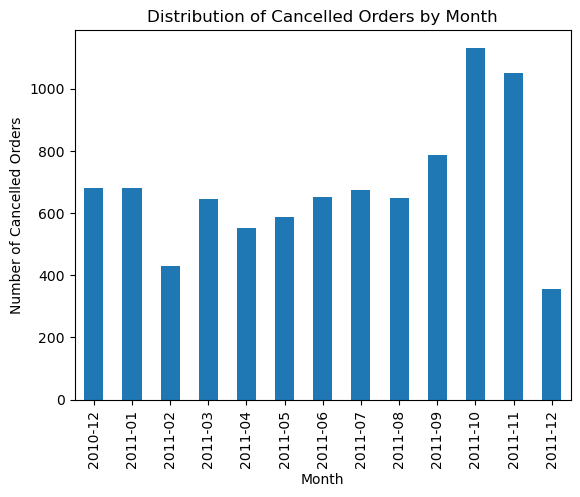

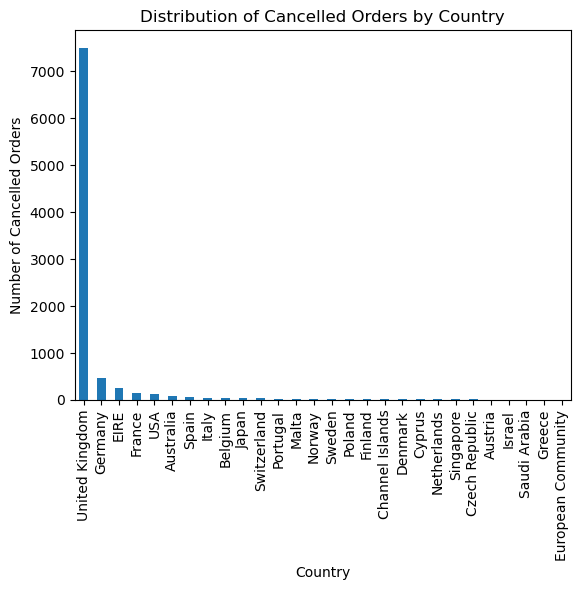

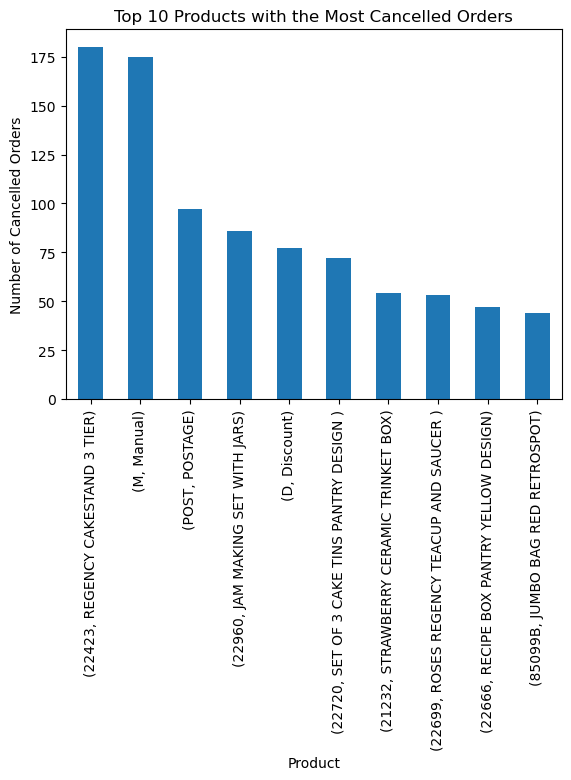

In [383]:
# 1. Исследуйте распределение отмененных заказов по времени (столбец "InvoiceDate")
# Преобразуйте столбец "InvoiceDate" в тип datetime
df_with_cancellation['InvoiceDate'] = pd.to_datetime(df_with_cancellation['InvoiceDate'])
print(df_with_cancellation['InvoiceDate'].max())
# Создайте столбец "Month" для группировки по месяцам
df_with_cancellation['Month'] = df_with_cancellation['InvoiceDate'].dt.to_period('M')

# Группируйте данные по месяцам и подсчитайте количество отмененных заказов в каждом месяце
cancelled_orders_by_month = df_with_cancellation.groupby('Month')['InvoiceNo'].count()

# Визуализируйте распределение отмененных заказов по месяцам
cancelled_orders_by_month.plot(kind='bar')
plt.xlabel('Month')
plt.ylabel('Number of Cancelled Orders')
plt.title('Distribution of Cancelled Orders by Month')
plt.show()

# 2. Исследуйте распределение отмененных заказов по странам (столбец "Country")
# Группируйте данные по странам и подсчитайте количество отмененных заказов в каждой стране
cancelled_orders_by_country = df_with_cancellation.groupby('Country')['InvoiceNo'].count()

# Визуализируйте распределение отмененных заказов по странам
cancelled_orders_by_country.sort_values(ascending=False).plot(kind='bar')
plt.xlabel('Country')
plt.ylabel('Number of Cancelled Orders')
plt.title('Distribution of Cancelled Orders by Country')
plt.show()

# 3. Исследуйте распределение отмененных заказов по товарам (столбцы "StockCode" и "Description")
# Группируйте данные по товарам и подсчитайте количество отмененных заказов для каждого товара
cancelled_orders_by_product = df_with_cancellation.groupby(['StockCode', 'Description'])['InvoiceNo'].count()

# Отсортируйте товары по количеству отмененных заказов в порядке убывания
cancelled_orders_by_product = cancelled_orders_by_product.sort_values(ascending=False)

# Визуализируйте топ-10 товаров с наибольшим количеством отмененных заказов
top_10_cancelled_products = cancelled_orders_by_product.head(10)
top_10_cancelled_products.plot(kind='bar')
plt.xlabel('Product')
plt.ylabel('Number of Cancelled Orders')
plt.title('Top 10 Products with the Most Cancelled Orders')
plt.show()

Average Quantity in Cancelled Orders: 10.1808
Average Quantity in Non-cancelled Orders: 11.9807
Average Price in Cancelled Orders: 4.7795
Average Price in Non-cancelled Orders: 2.8998


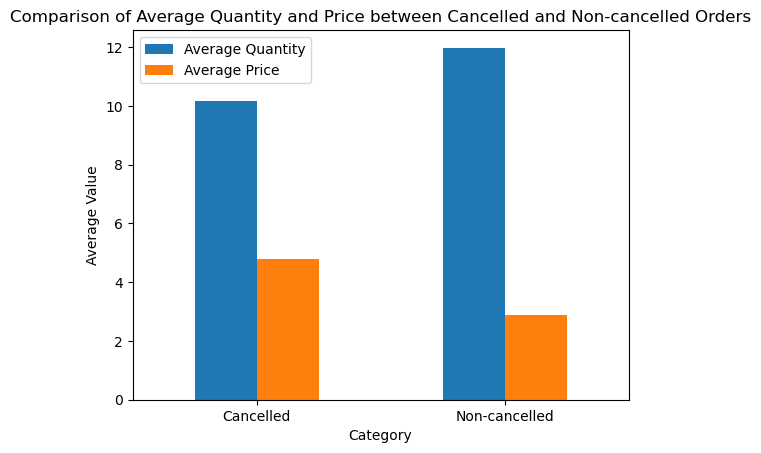

In [318]:
# 1. Сравните средние значения количества товаров в отмененных и неотмененных заказах
mean_quantity_cancelled = abs(df_with_cancellation['Quantity'].mean())
mean_quantity_non_cancelled = df_non_cancelled['Quantity'].mean()

print("Average Quantity in Cancelled Orders:", mean_quantity_cancelled.round(4))
print("Average Quantity in Non-cancelled Orders:", mean_quantity_non_cancelled.round(4))

# 2. Сравните средние значения цен товаров в отмененных и неотмененных заказах
mean_price_cancelled = df_with_cancellation['UnitPrice'].mean()
mean_price_non_cancelled = df_non_cancelled['UnitPrice'].mean()

print("Average Price in Cancelled Orders:", mean_price_cancelled.round(4))
print("Average Price in Non-cancelled Orders:", mean_price_non_cancelled.round(4))

# 3. Визуализируйте сравнение средних значений количества товаров и цен
means_data = {
    'Category': ['Cancelled', 'Non-cancelled'],
    'Average Quantity': [mean_quantity_cancelled, mean_quantity_non_cancelled],
    'Average Price': [mean_price_cancelled, mean_price_non_cancelled]
}

means_df = pd.DataFrame(means_data)

means_df.plot(x='Category', kind='bar', rot=0)
plt.ylabel('Average Value')
plt.title('Comparison of Average Quantity and Price between Cancelled and Non-cancelled Orders')
plt.show()

C:\Users\gpapu\AppData\Local\Temp\ipykernel_6072\1376611805.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\gpapu\AppData\Local\Temp\ipykernel_6072\1376611805.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\gpapu\AppData\Local\Temp\ipykernel_6072\1376611805.py:8: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



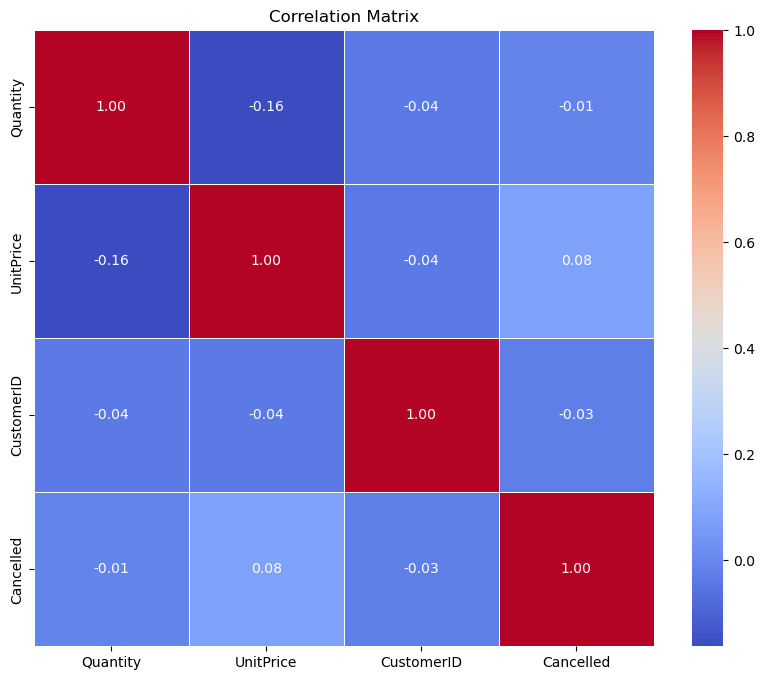

In [308]:
df_with_cancellation['Cancelled'] = 1
df_non_cancelled['Cancelled'] = 0

# Объедините два датасета в один для анализа
combined_df = pd.concat([df_with_cancellation, df_non_cancelled], ignore_index=True)

# Проведите корреляционный анализ для числовых данных в датасете
correlation_matrix = combined_df.corr()

# Визуализируйте матрицу корреляции в виде тепловой карты
plt.figure(figsize=(10, 8))
plt.title('Correlation Matrix')
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.show()

In [69]:
# working with canceled orders (contain 'C' in Invoice)
(df_online_retail['InvoiceNo'].str.startswith('C'))==True

0         False
1         False
2         False
3         False
4         False
          ...  
541904    False
541905    False
541906    False
541907    False
541908    False
Name: InvoiceNo, Length: 541909, dtype: bool

In [95]:
df_canceled_order = df_online_retail[df_online_retail.InvoiceNo.str.contains('C', na=False)]
df_canceled_order

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom


In [115]:
tt = df_canceled_order.groupby('Description').agg({'InvoiceDate': 'count'}).sort_values('InvoiceDate', ascending=False)

px.bar(tt)
tt

,InvoiceDate
Description,
Manual,244
REGENCY CAKESTAND 3 TIER,181
POSTAGE,126
JAM MAKING SET WITH JARS,87
Discount,77
...,...
MAGIC SHEEP WOOL GROWING FROM PAPER,1
MAGIC TREE -PAPER FLOWERS,1
MAGNETS PACK OF 4 HOME SWEET HOME,1


In [116]:
df_no_cancel = df_online_retail[~df_online_retail.InvoiceNo.str.contains('C', na=False)]

In [118]:
# Шаг 1: Создаем датасет с отмененными заказами (заказами, номера которых содержат "C")
cancelled_orders = df_online_retail[df_online_retail.InvoiceNo.str.contains('C', na=False)]

# Шаг 2: Из исходного датасета выбираем только заказы с типами из отмененных, но не содержащих "C"
# ~data.InvoiceNo.str.contains('C', na=False) вернет булеву серию, где True - это заказы без "C"
orders_without_cancellation = df_online_retail[~df_online_retail.InvoiceNo.str.contains('C', na=False)]

# Выводим датасет с отмененными заказами
print("Отмененные заказы:")
print(cancelled_orders)

# Выводим датасет с заказами без отмены, но не содержащими "C"
print("Заказы без отмены, но без 'C':")
print(orders_without_cancellation)

Отмененные заказы:
       InvoiceNo StockCode                       Description  Quantity  \
141      C536379         D                          Discount        -1   
154      C536383    35004C   SET OF 3 COLOURED  FLYING DUCKS        -1   
235      C536391     22556    PLASTERS IN TIN CIRCUS PARADE        -12   
236      C536391     21984  PACK OF 12 PINK PAISLEY TISSUES        -24   
237      C536391     21983  PACK OF 12 BLUE PAISLEY TISSUES        -24   
...          ...       ...                               ...       ...   
540449   C581490     23144   ZINC T-LIGHT HOLDER STARS SMALL       -11   
541541   C581499         M                            Manual        -1   
541715   C581568     21258        VICTORIAN SEWING BOX LARGE        -5   
541716   C581569     84978  HANGING HEART JAR T-LIGHT HOLDER        -1   
541717   C581569     20979     36 PENCILS TUBE RED RETROSPOT        -5   

                InvoiceDate  UnitPrice  CustomerID         Country  
141     2010-12-01 09:4

In [126]:
cancelled_items_list = cancelled_orders['Description'].unique()
items_dataset = orders_without_cancellation[orders_without_cancellation['Description'].isin(cancelled_items_list)]
items_dataset

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [135]:
qwe = cancelled_orders.groupby('Description').agg({'Quantity':'count'}).sort_values('Quantity', ascending=False).reset_index()
qwe

,Description,Quantity
0,Manual,244
1,REGENCY CAKESTAND 3 TIER,181
2,POSTAGE,126
3,JAM MAKING SET WITH JARS,87
4,Discount,77
...,...,...
1967,MAGIC SHEEP WOOL GROWING FROM PAPER,1
1968,MAGIC TREE -PAPER FLOWERS,1
1969,MAGNETS PACK OF 4 HOME SWEET HOME,1
1970,MAKE YOUR OWN FLOWERPOWER CARD KIT,1


In [134]:
rty = items_dataset.groupby('Description').agg({'Quantity':'count'}).sort_values('Quantity', ascending=False).reset_index()
rty

,Description,Quantity
0,WHITE HANGING HEART T-LIGHT HOLDER,2327
1,JUMBO BAG RED RETROSPOT,2115
2,REGENCY CAKESTAND 3 TIER,2019
3,PARTY BUNTING,1707
4,LUNCH BAG RED RETROSPOT,1594
...,...,...
1951,BLUE MONTE CARLO HANDBAG,1
1952,BLUE PADDED SOFT MOBILE,1
1953,PINK SMALL GLASS CAKE STAND,1
1954,PINK CHERRY LIGHTS,1


In [137]:
from scipy.stats import pearsonr, spearmanr

In [138]:
# Объединяем два датасета по столбцу 'Description'
merged_df = pd.merge(qwe, rty, on='Description', suffixes=('_qwe', '_rty'))

# Вычисляем коэффициент корреляции Пирсона и Спирмена
pearson_corr, _ = pearsonr(merged_df['Quantity_qwe'], merged_df['Quantity_rty'])
spearman_corr, _ = spearmanr(merged_df['Quantity_qwe'], merged_df['Quantity_rty'])

# Выводим результаты
print(f"Коэффициент корреляции Пирсона: {pearson_corr}")
print(f"Коэффициент корреляции Спирмена: {spearman_corr}")

Коэффициент корреляции Пирсона: 0.45812788031588325
Коэффициент корреляции Спирмена: 0.5304908257688495


In [93]:
df_online_retail.query('CustomerID == 14397.0 and InvoiceNo == "581490"')

InvoiceNo      0.0
StockCode      0.0
Description    0.0
Quantity       0.0
InvoiceDate    0.0
UnitPrice      0.0
CustomerID     0.0
Country        0.0
dtype: float64

In [65]:
df_online_retail.InvoiceNo.str.contains('C', na=False)

0         False
1         False
2         False
3         False
4         False
          ...  
541904    False
541905    False
541906    False
541907    False
541908    False
Name: InvoiceNo, Length: 541909, dtype: bool

In [6]:
df_online_retail['InvoiceDate'] = pd.to_datetime(df_online_retail['InvoiceDate'])


In [7]:
df_online_retail.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

In [8]:
df_online_retail

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [309]:
# Calculate the total order amount for each row (UnitPrice * Quantity)
df_online_retail['TotalPrice'] = df_online_retail['UnitPrice'] * df_online_retail['Quantity']

# Group the data by 'Country' and calculate the total order amount for each country
country_order_amount = df_online_retail.groupby('Country')['TotalPrice'] \
                                       .sum() \
                                       .reset_index()

# Calculate the percentage for each country
total_amount_sum = country_order_amount['TotalPrice'].sum()
country_order_amount['Percentage'] = (country_order_amount['TotalPrice'] / total_amount_sum) * 100

# Sort the DataFrame by 'Percentage' column in descending order
country_order_amount = country_order_amount.sort_values(by='Percentage', ascending=False) \
                                           .reset_index(drop=True)

# Threshold for "Other countries" category
threshold_percentage = 2.0

# Group small countries into "Other countries" category
other_countries_total_amount = country_order_amount[country_order_amount['Percentage'] < threshold_percentage]['TotalPrice'] \
                               .sum()
other_countries_percentage = (other_countries_total_amount / total_amount_sum) * 100

# Create a DataFrame for the "Other countries" category
other_countries_df = pd.DataFrame({'Country': ['Other countries'], 
                                   'TotalPrice': [other_countries_total_amount], 
                                   'Percentage': [other_countries_percentage]}
                                 )

# Combine the "Other countries" DataFrame with the main DataFrame, excluding small countries
filtered_country_order_amount = country_order_amount[country_order_amount['Percentage'] >= threshold_percentage]
country_order_amount = pd.concat([filtered_country_order_amount, other_countries_df]).reset_index(drop=True)

# Display 
country_order_amount

,Country,TotalPrice,Percentage
0,United Kingdom,6839452.484,81.403990
1,Netherlands,272548.520,3.243905
2,EIRE,269401.530,3.206450
3,Germany,230715.150,2.746000
4,France,200307.725,2.384087
5,Other countries,589438.510,7.015568


In [310]:
# Create a bar chart
fig_bar = px.bar(country_order_amount, x='TotalPrice', y='Country',
             text='TotalPrice', orientation='h',
             title='Total Order Amount by Country',
             labels={'TotalPrice': 'Total Order Price (£)', 'Country': 'Country'},
             color='Country',
             color_discrete_sequence=px.colors.sequential.Oranges_r  # Use a custom color palette
            )

# Update the layout to display percentage labels inside the bars
fig_bar.update_traces(width=0.9, texttemplate='%{text:.0f}£', textposition='outside')

# Update the layout to change the size of the chart
fig_bar.update_layout(width=800, height=600)  

# Adjust the scale of the X-axis 
fig_bar.update_xaxes(range=[0, country_order_amount['TotalPrice'].max()*1.3])

# Show the plot
fig_bar.show()

**ADD PIE PLOT**

In [311]:
# Create a pie chart
fig_pie = px.pie(country_order_amount, values='Percentage', names='Country',
             title='Percentage of Total Order Price by Country',
             color_discrete_sequence=px.colors.sequential.Oranges_r  # Use a custom color palette
            )
# Update the layout to change the size of the chart
fig_pie.update_layout(width=600, height=600)  

# Show the plot
fig_pie.show()

In [16]:
import pandas as pd
import numpy as np
import altair as alt
from altair_saver import save

# Создание случайных данных для примера
np.random.seed(42)
countries = ['USA', 'Canada', 'Germany', 'France', 'UK']
total_prices = np.random.randint(100, 1000, size=len(countries))
percentages = np.random.uniform(0, 100, size=len(countries))

country_order_amount = pd.DataFrame({
    'Country': countries,
    'TotalPrice': total_prices,
    'Percentage': percentages
})

# Интерактивная круговая диаграмма
pie_chart = alt.Chart(country_order_amount).mark_circle().encode(
    alt.X('Country:N'),
    alt.Y('Percentage:Q'),
    size='TotalPrice:Q',
    color='Country:N',
    tooltip=['Country', 'Percentage', 'TotalPrice']
).properties(
    width=300,
    height=300
)

# Интерактивная столбчатая диаграмма
bar_chart = alt.Chart(country_order_amount).mark_bar().encode(
    alt.X('Country:N'),
    alt.Y('TotalPrice:Q'),
    color='Country:N',
    tooltip=['Country', 'TotalPrice']
).properties(
    width=300,
    height=300
)

# Объединение двух графиков
charts = pie_chart | bar_chart

# Сохранение и отображение графиков в виде HTML
output_file = "interactive_charts.html"
save(charts, output_file)


In [54]:
?? px.update_traces()

Object ` px.update_traces()` not found.


In [12]:
df_online_retail['CustomerID'].value_counts()

17841.0    7983
14911.0    5903
14096.0    5128
12748.0    4642
14606.0    2782
           ... 
15070.0       1
15753.0       1
17065.0       1
16881.0       1
16995.0       1
Name: CustomerID, Length: 4372, dtype: int64

In [13]:
orders_per_customer = df_online_retail.groupby('CustomerID')['InvoiceNo'].nunique().reset_index()

# Rename the column to 'OrderCount' for clarity
orders_per_customer.rename(columns={'InvoiceNo': 'OrderCount'}, inplace=True)

# Sort the DataFrame by 'OrderCount'
orders_per_customer.sort_values('OrderCount', inplace=True, ascending=False)
orders_per_customer

,CustomerID,OrderCount
1895,14911.0,248
330,12748.0,224
4042,17841.0,169
1674,14606.0,128
568,13089.0,118
...,...,...
1141,13877.0,1
2997,16400.0,1
1142,13878.0,1
1149,13886.0,1


In [14]:
df_online_retail.query('')

ValueError: expr cannot be an empty string

In [ ]:
df_online_retail.query('CustomerID == 14911.0')

In [ ]:
??pd.DataFrame.sort_values

In [ ]:
df_online_retail

In [ ]:
df_online_retail.groupby('CustomerID') \
    .agg({'TotalAmount': 'sum'}).reset_index()

In [ ]:
df_online_retail.query('CustomerID == 12347.0')

In [ ]:
df_online_retail.query('TotalAmount < 0')